In [4]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', 350)
import warnings
warnings.filterwarnings("ignore")

In [5]:
path = (r'C:\Users\Katerina\Desktop\Accounts_Dataset')
# List all .txt files in the directory
file_names = [file_name for file_name in os.listdir(path) if file_name.endswith('.txt')]
# Read all files into a single DataFrame
df_accounts = pd.concat([pd.read_csv(os.path.join(path, file_name), header=None, delimiter='\t') for file_name in file_names]) 

In [6]:
df_accounts.columns = ["IDacc", "SNAPNUMacc" , "MEAS_ACCH_ORIGINATOR" , "MEAS_ACCL_STRAY_PAYMENT_AMT" , "MEAS_ACCL_APLL_IS_NEW" , 
 "MEAS_ACCL_APLL_FORBORNE" , "MEAS_ACCL_APPL_TYPE" , "MEAS_ACCL_PAID_IN_FULL_CM" , "MEAS_ACCL_APPLICATION_SUCCESSFUL" , 
 "MEAS_ACCL_UNDERWRITING_SEGMENT" , "MEAS_ACCL_DPO_OR_REPAYMENT_PLAN" , "MEAS_ACCL_PROMISE_ACCOUNTS" , 
 "MEAS_ACCL_ACTIVATION_PERIOD" , "MEAS_ACCL_PROMISE_ACCOUNT" , "MEAS_ACCL_KEPT_ACCOUNT" , "MEAS_ACCL_KEPT_PROMISE" , 
 "MEAS_ACCL_NUM_OF_PROMISES" , "MEAS_ACCL_HAS_ARRANGEMENT_FLAG" , "MEAS_ACCL_FLAG_RUNNING" , "MEAS_ACCL_APPL_DELINQ_DPD" ,
 "MEAS_ACCL_BROKEN_SETTLEMENT_INDICATOR_CP" , "MEAS_ACCL_ACTL_IS_PHONE_RPC" , "MEAS_ACCL_LMEM_DATE_ENTRY" , "MEAS_ACCL_APPL_STATUS" , 
 "MEAS_ACCL_APPLICATION_BUCKET" , "MEAS_ACCL_LAST_INBOUND_CALL" , "MEAS_ACCL_LAST_OUTBOUND_CALL" , "MEAS_ACAG_DATE_CONTACT_LAST",
 "MEAS_ACCL_LAST_CONTACT_TYPE" , "MEAS_ACCL_LAST_CONTACT_STEP_DATE" , "MEAS_ACCL_LAST_CONTACT_STEP" , "MEAS_ACCL_LAST_CONTACT_STR_DATE" , 
 "MEAS_ACCL_LAST_CONTACT_STRATEGY" , "MEAS_ACCL_LAST_KEPT_BROKEN_DATE" , "MEAS_ACCL_NBR_OF_KEPT_PROMISESS" , "MEAS_ACCL_NBR_OF_KEPT_PROMISES",
 "MEAS_ACCL_NBR_OF_PROMISES" , "MEAS_ACCL_NBR_OF_UNKEPT_PROMISES" , "MEAS_ACCL_REQUEST_STATUS" , "MEAS_ACCL_REQUEST_STATUS_DATE" ,
 "MEAS_ACCH_STATUS_DELINQ_DATE" , "MEAS_ACCH_STATUS_DELINQ" , "MEAS_ACCL_ADMIN_STATUS_EXP_DATE" , "MEAS_ACCL_PREVIOUS_RETURN_DATE" , 
 "MEAS_ACCL_DATE_CAPITALISED" , "MEAS_ACCL_DATE_WRITEOFF_TOBE" , "MEAS_ACCH_DATE_LITIGATION_LATEST" , "MEAS_ACCL_SPECIAL_TREAT_DATE" ,
 "MEAS_ACCH_DATE_DENOUNCED" , "MEAS_ACCH_DATE_DISBURSE_FIRST" , "MEAS_ACCH_STATUS" , "MEAS_ACCL_STATUS_PRIORITY" , 
 "MEAS_ACCL_STATUS_SKIP" , "MEAS_ACCL_BUCKET_MAX_NBG" , "MEAS_ACCH_CATEG_SEGMENT" , "MEAS_ACCL_COOPERATIVE" , "MEAS_ACCH_DATE_OPENED" , 
 "MEAS_ACCH_DATE_BILLING" , "MEAS_ACCL_BILLING_DAY" , "MEAS_ACCT_BRANCH" , "MEAS_ACCH_BUSUNIT" , "MEAS_ACCH_DATE_RESCHEDULING", 
 "MEAS_ACCH_CURRENCY" , "MEAS_ACCH_ACTIVE" , "MEAS_ACCH_DELDAYS" , "MEAS_ACCH_DATE_INSTALMENT_NEXT" , "MEAS_ACCH_DATE_EXP" ,
 "MEAS_ACCL_FIRST_ENTRY_DATE" , "MEAS_ACCL_SECURITIZATION_TYPE" , "MEAS_ACCH_DATE_SECURITISED" , "MEAS_ACCL_DEFAULT_REASON" ,
 "MEAS_ACCL_EBA_STATUS" , "MEAS_ACCH_QC_ISCASE", "MEAS_ACCH_QC_ISCONTRACT" , "MEAS_ACCL_LAST_BILLING_DATE_CLIENT" , 
 "MEAS_ACCH_DELINQ_DATE_EXIT" , "MEAS_ACCH_DELINQ_DATE_ENTRY" , "MEAS_ACCL_LEGAL_ACTION" ,"MEAS_ACCL_LEGAL_ACTION_STATUS",
 "MEAS_ACCH_DATE_BILLING_NEXT" , "MEAS_ACCH_PERIODICITY" , "MEAS_ACCL_RELATION_TYPE_DESC"  , "MEAS_ACCL_RELATION_TYPE" ,
 "MEAS_ACCH_COUNT_RESCHEDULINGS" , "MEAS_ACCL_SOLD_TO" , "MEAS_ACCL_CASE_SOURCE" , "MEAS_ACCH_CATEG_TYPE" , 
 "MEAS_ACCH_TYPE_FORBEARANCE" , "MEAS_ACCH_REASON_NPL" , "MEAS_ACCH_FLAG_LITIGATION" , "MEAS_ACCH_DATE_WRITEOFF" , 
 "MEAS_ACCL_CALL_BACK_COUNTER" , "MEAS_ACCL_MESSAGE_COUNTER" , "MEAS_ACCL_NOT_FOUND_COUNTER" , "MEAS_ACCL_REFUSE_TO_PAY_COUNTER" ,
 "MEAS_ACCL_SECONDARY_FLOW_FLAG" , "MEAS_ACCH_DATE_LITIGATION" , "MEAS_ACCH_STATUS_LITIGATION" ,"MEAS_ACCH_DATE_PAYMENT_LAST", 
 "MEAS_ACCL_LAST_PAYMENT_TYPE" , "MEAS_ACCH_FLAG_COSIGNER" , "MEAS_ACCH_FLAG_GUARANTOR" ,"MEAS_ACCL_NUMBER_OF_COLLATERALS" ,
 "MEAS_ACCL_PAYMENT_IN_ALLOCATION" , "MEAS_ACCH_FLAG_SECURED" , "MEAS_ACCT_CUST_CODE" , "MEAS_ACCL_DEPARTMENT_AT_ALLOCATION",
 "MEAS_ACCL_INDICATION_CONTACT_ANY_CP" , "MEAS_ACCL_INDICATION_CONTACT_ATTEMPT_CP" , "MEAS_ACCL_INDICATION_CONTACT_RIGHTPERSON_CP" ,
 "MEAS_ACCL_MAX_CONTACTTYPE" , "MEAS_ACCL_ALLOCATION_CODE" , "MEAS_ACCH_DELINQ_PACKAGE_DATE" , "MEAS_ACCL_PACKET_DEFINITION_DATE",
 "MEAS_ACCL_PACKET_EXPIRATION_DATE" , "MEAS_ACCH_DELINQ_PACKAGE_TYPE" , "MEAS_PROD_CODE" , "MEAS_ACCL_LAST_RECALL_DATE" , "MEAS_ACCL_REQUEST_CODE" , 
 "MEAS_ACCL_REQUEST_TYPE" , "MEAS_ACCL_DEBT_REDUCTION_RULE" , "MEAS_ACCH_DELINQ_STRATEGY_ENTRYDATE" , 
 "MEAS_ACCH_DELINQ_STEP_ENTRYDATE" , "MEAS_ACCL_LAST_PENDING_ARRANG" , "MEAS_ACCH_DATE_NOMINAL" , "MEAS_ACCH_SNAPNUM" ,
 "MEAS_SPRD_CODE" , "MEAS_ACCH_DELINQ_STRATEGY" , "MEAS_ACCH_DELINQ_STEP" , "MEAS_ACCH_DATE_CLOSED", "MEAS_ACCL_HAS_ARRANGEMENT_NEW" , 
 "MEAS_ACCL_HAS_ARRANGEMENT_CURRENT" , "MEAS_ACCL_DENORM_APLL_DISCOUNT_PERCENTAGE" , "MEAS_ACCL_ARRANGEMENT_DURATION_APPROVED_MAX" , 
 "MEAS_ACCL_DENORM_APLL_STARTING_DATE" , "MEAS_ACCL_ARRANGEMENT_BUCKET_MAX" , "MEAS_ACCL_CONTACT_NUM_ATTEMPTS_CP" , "MEAS_ACCL_CONTACT_NUM_RPC_CP" , 
 "MEAS_ACCL_CONTACT_RPC_TYPE_LATEST" , "MEAS_ACCH_CATEG_CLASS_ASSET" , "MEAS_ACCL_HAS_WEB_ACCOUNT" , "MEAS_ACCL_HAS_PHONE_NUMBER",
 "MEAS_ACCL_HAS_CONTACT_ATTEMPT" , "MEAS_ACCL_FIRST_CONTACT_ATTEMPT_DATE" , "MEAS_ACCL_NUM_INSTALMENTS_TOTAL", 
 "MEAS_ACCL_APLL_MATURITY_PERCENTAGE" , "MEAS_ACCL_NR_OF_PAST_UNSETTLED_INSTALLMENTS" , "MEAS_ACCL_APLL_LAST_BROKEN_DATE" , 
 "MEAS_ACCL_DATE_STATUS_REJECTED" , "MEAS_ACCL_APLL_DAYS_PENDING" , "MEAS_ACCL_APLL_DAYS_REJECTED" , "MEAS_ACCL_APLL_DAYS_CANCELLED" , 
 "MEAS_ACCL_APLL_NUM_INSTALMENTS_PAST" , "MEAS_ACCL_LAST_SUBMISSION_DATE" , "MEAS_ACCL_SUBMISSION_AFTER_CONTACT" , 
 "MEAS_ACCL_APPLICATION_PENDING" , "MEAS_ACCL_APPLICATION_ACTIVE_BUCKET_1" , "MEAS_ACCL_APPLICATION_ACTIVE_BUCKET_2" ,
 "MEAS_ACCL_APPLICATION_OPEN" , "MEAS_ACCL_APPLICATION_OPEN_PM" , "MEAS_ACCL_DPD_GROUP" , "MEAS_ACCL_BUS_SIZE" , 
 "MEAS_ACCL_PUBLIC_SECTOR" , "MEAS_ACCL_FLAG_DENOUNCED" , "MEAS_ACCL_EBA_FORBORNE" , "MEAS_ACCL_NUMBER_OF_GUARANTORS" ,
 "MEAS_ACCL_LETTER_FIRST_DATE", "MEAS_ACCL_LETTER_SECOND_DATE" , "MEAS_ACCL_HAS_FIRST_LETTER" , "MEAS_ACCL_HAS_SECOND_LETTER" , 
 "MEAS_ACCL_LETTER_RECEIVED" , "MEAS_ACCL_LETTER_RECEIVED_DATE" , "MEAS_ACCL_FIRST_CONTACT_ATTEMPT_NM" , "MEAS_ACCL_BROKEN_BUCKET_4" , 
 "MEAS_ACCL_ACTUAL_CONTACTS" , "MEAS_ACCL_ACTUAL_CONTACTS_PM" , "MEAS_ACCL_HAS_COLLATERAL" , "MEAS_ACCL_PAID_IN_FULL" , 
 "MEAS_ACCL_LAST_SETTLEMENT_BUCKET", "MEAS_ACCL_LAST_SETTLEMENT_STATUS" , "MEAS_ACCL_PAYMENT_RECONCILIATION_CODE" , 
 "MEAS_ACCL_DATE_UPDATE_LATEST" , "MEAS_ACCL_FLAG_OPEN_RECENTLY" , "MEAS_ACCL_PHONE_RPC_COUNT_EVER" , "MEAS_ACCL_PHONE_RPC_DATE_FIRST" , 
 "MEAS_ACCL_PHONE_RPC_DATE_LATEST" , "MEAS_ACCL_EED_PERCENT" , "MEAS_ACCH_DELINQ_DCA" , "MEAS_ACCL_PHONE_RPC_DCA_FIRST" , 
 "MEAS_ACCL_PHONE_RPC_DCA_LATEST" , "MEAS_ACCL_DELINQ_DCA_GROUPING" , "MEAS_ACCL_PREVIOUS_3RD_PARTY_NAME" , 
 "MEAS_ACCL_RUNNING_INSTALMENTS_AMT" , "MEAS_ACCL_PAYMENTS_ONEOFF_CP" , "MEAS_ACCL_PAYMENTS_REPAYMENT_PLAN_CP" ,"MEAS_ACCL_PAYMENTS_ONEOFF_YTD" , 
 "MEAS_ACCL_PAYMENTS_REPAYMENT_PLAN_YTD" , "MEAS_ACCL_PAYMENTS_NO_SETTLEMENT_YTD" , "MEAS_ACCL_PAYMENTS_ARRANGEMENTS" , 
 "MEAS_ACCL_AMT_PROMISE" , "MEAS_ACCL_AMT_KEPT" , "MEAS_ACCL_ARRANGEMENT_PRINCIPAL" , "MEAS_ACCL_ARRANGEMENT_BALANCE" , 
 "MEAS_ACCL_AMT_INSTAL_NOT_MATURED_CM" , "MEAS_ACCL_APPL_AMT_APPROVED" , "MEAS_ACCL_APPL_AMT_DUNNING" , 
 "MEAS_ACCL_APPL_AMT_APPROVED_NEW" , "MEAS_ACCL_APPL_AMT_FALLOFF" , "MEAS_ACCL_LMEM_PAYMENTS_CP" , "MEAS_ACCL_LMEM_PAYMENTS_CUMUL" , 
 "MEAS_ACCH_AMT_PAYMENT_CP" , "MEAS_ACCL_AMT_PAYMENTS_TOTAL" , "MEAS_ACCL_AMT_OVERPAYMENT_ADDITIONAL" , "MEAS_ACCL_AMT_PAYMENT_YTD" , 
 "MEAS_ACCH_AMT_PASTDUE" , "MEAS_ACCL_AMT_DENOUNCED" , "MEAS_ACCL_AMT_DUE_NBG" , "MEAS_ACCL_AMT_WRITEOFF_TOBE" , 
 "MEAS_ACCL_AMT_PAYMENT_REMAINING" , "MEAS_ACCH_AMT_BAL_ACCOUNTING" , "MEAS_ACCL_AMT_ORIG_EXPENSES" , 
 "MEAS_ACCL_AMT_ORIG_INTEREST_OFFBALANCE" , "MEAS_ACCL_AMT_ORIG_INTEREST_ONBALANCE" , "MEAS_ACCL_AMT_ORIG_PRINCIPAL" , 
 "MEAS_ACCL_AMT_ORIG_CLAIM_PNI" , "MEAS_ACCL_AMT_OVERPAYMENT" , "MEAS_ACCH_AMT_EXPENSES" , "MEAS_ACCL_AMT_INTEREST_OFFBALANCE" ,
 "MEAS_ACCL_AMT_INTEREST_ONBALANCE" , "MEAS_ACCH_AMT_PRINCIPAL" , "MEAS_ACCL_AMT_CLAIM_PNI" , "MEAS_ACCL_AMT_CLAIM_G3", 
 "MEAS_ACCL_DUE_PRINCIPAL" , "MEAS_ACCL_AMT_CLAIM_G4" , "MEAS_ACCL_AMT_PRINCIPAL_TOTAL" , "MEAS_ACCL_AMT_GBV" , "MEAS_ACCH_AMT_LIMIT" , 
 "MEAS_ACCL_DEFAULT_BALANCE" , "MEAS_ACCH_AMT_ARREARS" , "MEAS_ACCL_LATE_INTEREST" , "MEAS_ACCL_INTEREST" , "MEAS_ACCH_AMT_MINPAYMENT" , 
 "MEAS_ACCH_AMT_BALANCE" , "MEAS_ACCL_PURCHASE_BALANCE" , "MEAS_ACCL_COURT_CLAIMED_AMOUNT" , "MEAS_ACCH_AMT_WRITEOFF" , 
 "MEAS_ACCH_AMT_PAYMENT_LAST" , "MEAS_ACCL_COLLATERALS_VALUE" , "MEAS_ACCL_AMT_INSTALMENTS_CM" , "MEAS_ACCL_AMT_INSTALMENTS_MISSED" , 
 "MEAS_ACCL_AMT_INSTALMENTS_NM" , "MEAS_ACCL_AMT_INSTALMENTS_FUTURE" , "MEAS_ACCL_APPL_AMT_INSTALMENT_NEXT" , "MEAS_ACCL_APLL_AMT_REMAINING" ,
 "MEAS_ACCL_APLL_AMT_WRITEOFF" , "MEAS_ACCL_APLL_AMT_INSTALMENTS_PAST" , "MEAS_ACCL_COLLA_MARKET_VALUE" , "MEAS_ACCL_AMT_BAL_ACCOUNTING_RR" , 
 "MEAS_ACCL_AMT_BAL_OFFBALANCE_RR" , "MEAS_ACCL_AMT_PAYMENTS_EXPECTED_3M", "MEAS_ACCL_AMT_INSTALMENTS_PAID",
 "MEAS_ACCL_COLLATERAL_OR_RE_MARKET_VALUE" , "MEAS_ACCL_EED_GUARANTEED_AMOUNT"]

In [7]:
path = (r"C:\Users\Katerina\Desktop\Customers_Data")
 
file_names = [file_name for file_name in os.listdir(path) if file_name.endswith('.txt')]
df_customers = pd.concat([pd.read_csv(os.path.join(path, file_name), header=None, delimiter='\t') for file_name in file_names])

In [8]:
df_customers.columns = ['IDcus', 'SNAPNUMcus', 'MEAS_CUSH_CATEG_SEGMENT', 'MEAS_CUSL_HAS_CONTACT_ATTEMPT_EVER', 'MEAS_CUSL_PROFESSION_GROUPING',
'MEAS_CUSL_PHONE_RPC_COUNT', 'MEAS_CUSL_COUNT_RPC', 'MEAS_CUSL_COUNT_NO_CONTACT', 'MEAS_CUSL_REFUSE', 'MEAS_CUSL_PROMISE', 
'MEAS_CUSL_COMPLAIN', 'MEAS_CUSL_COMMUNICATION_ATTEMPT', 'MEAS_CUSL_MIN_COMMUNICATION_DATE_3M', 'MEAS_CUSL_RESPONDED', 
'MEAS_CUSL_COUNT_3RD_PARTY', 'MEAS_CUSL_POSTAL_REGION', 'MEAS_CUSL_PREFECTURE', 'MEAS_CUSL_GEOGRAPHICAL_REGION', 
'MEAS_CUSL_MAINLAND_ISLAND', 'MEAS_CUSL_MAX_PERSON_CONTACT_TYPE', 'MEAS_CUSL_DIALLER_ATTEMPTS_COUNT', 'MEAS_CUSL_HELLO_LETTER_RESULT',
'MEAS_CUSL_CITY', 'MEAS_CUSL_COUNTRY' , 'MEAS_CUSH_ADDR_PRIMARY_REGION' , 'MEAS_CUSL_ADMINISTRATION_STATUS_DATE' , 
'MEAS_CUSL_ADMINISTRATION_STATUS', 'MEAS_CUSL_HAS_ACTIVE_ARRANGEMENT' , 'MEAS_CUSL_HAS_PAYMENT', 'MEAS_CUSL_PRIORITY_CUSTOMER_STATUS_DATE', 
'MEAS_CUSH_STATUS_LITIGATION ' , 'MEAS_CUSH_COUNT_PHONES', 'MEAS_CUSL_COLLECTION_CASES_NUM' , 'MEAS_CUSL_MAX_CURRENT_BUCKET' , 
'MEAS_CUSL_MIN_CURRENT_BUCKET' , 'MEAS_CUSL_HAS_RESTRUCTURING_APPLICATION' , 'MEAS_CUSH_OWNER_HOME' , 'MEAS_CUSL_IS_CO_OWNER' , 
'MEAS_CUSL_IS_GUARANTOR' , 'MEAS_CUSL_IS_PRIMARY_OWNER' , 'MEAS_CUSL_LAST_PAYMENT_DATE' , 'MEAS_CUSL_LAST_DEFAULT_DATE' , 
'MEAS_CUSL_FIRST_DEFAULT_DATE', 'MEAS_CUSL_COLLECTION_CASES_NUM_PRIMARY_OWNER' , 'MEAS_CUSL_MAX_CURRENT_BUCKET_PRIMARY_OWNER' , 
'MEAS_CUSL_TOTAL_ACCOUNTS' , 'MEAS_CUSH_BIRTHDATE' , 'MEAS_CUSH_ID_TYPE' , 'MEAS_CUSH_FAMSTATUS' , 'MEAS_CUSH_PROFESSION', 
'MEAS_CUSL_POSITION', 'MEAS_CUSH_GENDER' , 'MEAS_CUSL_STATUS_LAW3869' , 'MEAS_CUSH_DATE_NOMINAL' , 'MEAS_CUSH_STATUS', 
'MEAS_CUSL_HAS_CONTACT_ATTEMPT' , 'MEAS_CUSL_LAST_PAYMENT_AMOUNT', 'MEAS_CUSL_DEBT_AMOUNT_PRIMARY_OWNER' , 'MEAS_CUSL_TOTAL_OUTSTANDING_AMOUNT' , 
'MEAS_CUSL_DEBT_AMOUNT' , 'MEAS_CUSL_ACCOUNTING_BALANCE' , 'MEAS_CUSL_BALANCE', 'MEAS_CUSL_BALANCE_PRIMARY_OWNER']

In [9]:
# Create a new column 'paid_in_full_next' to store the value of 'MEAS_ACCL_PAID_IN_FULL_CM' in the next snapshot
df_accounts['paid_in_full_next'] = df_accounts.groupby('SNAPNUMacc')['MEAS_ACCL_PAID_IN_FULL_CM'].shift(-1)

# Create a new column 'paid_in_full_subsequent' to store the value of 'MEAS_ACCL_PAID_IN_FULL_CM' in the subsequent snapshot
df_accounts['paid_in_full_subsequent'] = df_accounts.groupby('SNAPNUMacc')['MEAS_ACCL_PAID_IN_FULL_CM'].shift(-2)

In [10]:
# Set paid_in_full_next to 'No' when snapshot is 37
df_accounts.loc[df_accounts['SNAPNUMacc'] == 37, 'paid_in_full_next'] = 'No'

# Set paid_in_full_subsequent to 'No' when snapshot is 37 or 38
df_accounts.loc[df_accounts['SNAPNUMacc'].isin([37, 38]), 'paid_in_full_subsequent'] = 'No'

# Check if someone pays a full installment within the next 2 months for specific snapshot numbers
snapshot_filter = (df_accounts['SNAPNUMacc'] >= 37) & (df_accounts['SNAPNUMacc'] <= 46)
df_accounts['Target'] = ((df_accounts['paid_in_full_next'] == 'Yes') | (df_accounts['paid_in_full_subsequent'] == 'Yes')) 
df_accounts.loc[~snapshot_filter, 'Target'] = False

In [11]:
# Check if someone pays a full installment within the next 2 months for specific snapshot numbers
snapshot_filter = (df_accounts['SNAPNUMacc'] >= 37) & (df_accounts['SNAPNUMacc'] <= 46)
df_accounts['Target'] = ((df_accounts['paid_in_full_next'] == 'Yes') | (df_accounts['paid_in_full_subsequent'] == 'Yes')) 
df_accounts.loc[~snapshot_filter, 'Target'] = False

In [12]:
# Print the relevant columns
print(df_accounts[['SNAPNUMacc', 'MEAS_ACCL_PAID_IN_FULL_CM', 'paid_in_full_next', 'paid_in_full_subsequent', 'Target']])

        SNAPNUMacc MEAS_ACCL_PAID_IN_FULL_CM paid_in_full_next  \
0               37                        No                No   
1               37                        No                No   
2               37                        No                No   
3               37                        No                No   
4               37                        No                No   
...            ...                       ...               ...   
336774          48                        No                No   
336775          48                        No                No   
336776          48                        No                No   
336777          48                        No                No   
336778          48                        No               NaN   

       paid_in_full_subsequent  Target  
0                           No   False  
1                           No   False  
2                           No   False  
3                           No   False  
4 

In [13]:
# Convert True to 1 and False to 0 in the 'Target' column
df_accounts['Target'] = df_accounts['Target'].replace({True: 1, False: 0})

In [14]:
df_accounts['Target'].value_counts()

Target
0    4066226
1       8528
Name: count, dtype: int64

In [15]:
target_percentages = (df_accounts['Target'].value_counts() / len(df_accounts)) * 100
target_percentages

Target
0    99.790711
1     0.209289
Name: count, dtype: float64

In [16]:
df_accounts.drop(['paid_in_full_next', 'paid_in_full_subsequent'], axis = 1, inplace= True)

In [17]:

mergeAccCus = pd.merge(df_accounts, df_customers, left_on=['MEAS_ACCT_CUST_CODE', 'SNAPNUMacc'], right_on=['IDcus', 'SNAPNUMcus'])

In [18]:
# Define the conditions
condition1 = (mergeAccCus['MEAS_ACCL_APPLICATION_PENDING'].isnull()) | (mergeAccCus['MEAS_ACCL_APPLICATION_PENDING'] == 'No')
condition2 = (mergeAccCus['MEAS_ACCL_APPLICATION_PENDING'].isnull()) | (~mergeAccCus['MEAS_ACCL_APPL_STATUS'].isin(['Approved', 'Running', 'Fulfilled', 'Partially Fulfilled', 'Out of collection']))  
condition3 = (~mergeAccCus['MEAS_CUSL_MIN_COMMUNICATION_DATE_3M'].isnull()) 
 
# Combine the conditions using the '&' operator (logical AND)
combined_condition = condition1 & condition2 & condition3

# Apply the combined condition to filter the DataFrame
filtered_subset = mergeAccCus[combined_condition] 
 

In [19]:
filtered_subset['Target'].value_counts()

Target
0    2758009
1       5306
Name: count, dtype: int64

In [20]:
target_percentages = (filtered_subset['Target'].value_counts() / len(filtered_subset)) * 100
target_percentages

Target
0    99.807984
1     0.192016
Name: count, dtype: float64

In [21]:
filtered_subset.to_pickle("FinTech1.pkl")

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
pd.set_option('display.max_rows', 350)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle("FinTech1.pkl")

In [3]:
# Reset the index to consecutive values
df.reset_index(drop=True, inplace=True)

In [4]:
df[:5]

,IDacc,SNAPNUMacc,MEAS_ACCH_ORIGINATOR,MEAS_ACCL_STRAY_PAYMENT_AMT,MEAS_ACCL_APLL_IS_NEW,MEAS_ACCL_APLL_FORBORNE,MEAS_ACCL_APPL_TYPE,MEAS_ACCL_PAID_IN_FULL_CM,MEAS_ACCL_APPLICATION_SUCCESSFUL,MEAS_ACCL_UNDERWRITING_SEGMENT,...,MEAS_CUSH_DATE_NOMINAL,MEAS_CUSH_STATUS,MEAS_CUSL_HAS_CONTACT_ATTEMPT,MEAS_CUSL_LAST_PAYMENT_AMOUNT,MEAS_CUSL_DEBT_AMOUNT_PRIMARY_OWNER,MEAS_CUSL_TOTAL_OUTSTANDING_AMOUNT,MEAS_CUSL_DEBT_AMOUNT,MEAS_CUSL_ACCOUNTING_BALANCE,MEAS_CUSL_BALANCE,MEAS_CUSL_BALANCE_PRIMARY_OWNER
0,346950,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS3,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,22.4067,21151.2187,21488.0257,21293.8774,8160.4065,21232.3369,21110.6695
1,346951,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS2,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,4.3489,5348.1407,5433.3032,5384.2123,2120.9410,5368.6516,5337.8877
2,345151,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS1,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,20.3697,877.0015,890.9666,882.9166,489.6157,880.3649,875.3202
3,346953,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS4,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,203.6970,51949.3151,52776.5439,52299.6981,29560.9277,52148.5488,51849.7227
4,535607,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS4,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,203.6970,51949.3151,52776.5439,52299.6981,29560.9277,52148.5488,51849.7227


In [5]:
df.shape

(2763315, 327)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763315 entries, 0 to 2763314
Columns: 327 entries, IDacc to MEAS_CUSL_BALANCE_PRIMARY_OWNER
dtypes: float64(145), int64(42), object(140)
memory usage: 6.7+ GB


In [7]:
percent = (df.isnull().sum() / len(df.index)).sort_values(ascending=False) * 100
high_missing_values = list(percent[percent >= 95].index)
df = df.drop(high_missing_values, axis=1)

In [8]:
def calculate_duplicate_percentage(df):
    total_rows = len(df)
    duplicate_rows = len(df[df.duplicated()])
    duplicate_percentage = (duplicate_rows / total_rows) * 100
    return duplicate_percentage
 

duplicate_percentage = calculate_duplicate_percentage(df)
print(f"Duplicate percentage: {duplicate_percentage:.2f}%")

Duplicate percentage: 0.00%


In [9]:
df.shape

(2763315, 250)

Dates

In [10]:
df_dates = df.filter(regex='DATE', axis=1)
df_dates

,MEAS_ACAG_DATE_CONTACT_LAST,MEAS_ACCL_LAST_CONTACT_STEP_DATE,MEAS_ACCL_LAST_CONTACT_STR_DATE,MEAS_ACCL_LAST_KEPT_BROKEN_DATE,MEAS_ACCH_STATUS_DELINQ_DATE,MEAS_ACCL_PREVIOUS_RETURN_DATE,MEAS_ACCL_DATE_CAPITALISED,MEAS_ACCL_DATE_WRITEOFF_TOBE,MEAS_ACCH_DATE_LITIGATION_LATEST,MEAS_ACCL_SPECIAL_TREAT_DATE,...,MEAS_ACCL_PHONE_RPC_DATE_FIRST,MEAS_ACCL_PHONE_RPC_DATE_LATEST,MEAS_CUSL_MIN_COMMUNICATION_DATE_3M,MEAS_CUSL_ADMINISTRATION_STATUS_DATE,MEAS_CUSL_PRIORITY_CUSTOMER_STATUS_DATE,MEAS_CUSL_LAST_PAYMENT_DATE,MEAS_CUSL_LAST_DEFAULT_DATE,MEAS_CUSL_FIRST_DEFAULT_DATE,MEAS_CUSH_BIRTHDATE,MEAS_CUSH_DATE_NOMINAL
0,2018-11-22,2019-02-01,2019-01-15,NaN,2018-07-01,2018-09-29,1900-01-01,1900-01-01,2010-03-16,2018-10-02,...,NaN,NaN,2018-11-13,2018-07-01 00:00:00.000,2018-10-30,2008-06-12,2008-09-09,2008-09-09,1981-06-15,2019-01-01
1,2019-01-28,2019-02-01,2019-01-28,2010-11-01,2018-07-01,2018-12-20,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,NaN,NaN,2018-11-01,2018-07-01 00:00:00.000,NaN,2010-10-05,2011-01-02,2011-01-02,1976-01-15,2019-01-01
2,2019-01-21,2019-02-01,2019-01-21,2011-06-01,2018-12-10,2018-11-14,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,NaN,NaN,2018-11-01,2018-12-10 00:00:00.000,NaN,2014-09-01,2014-09-20,2014-09-20,1937-10-12,2019-01-01
3,2018-08-07,2019-02-01,2019-01-15,2014-11-06,2018-07-01,2018-09-29,1900-01-01,1900-01-01,1900-01-01,2018-10-02,...,NaN,NaN,2018-11-02,2018-07-01 00:00:00.000,NaN,2014-11-06,2014-09-14,2014-08-16,1944-03-04,2019-01-01
4,2018-08-07,2019-02-01,2019-01-15,2014-11-06,2018-07-01,2018-09-29,1900-01-01,1900-01-01,1900-01-01,2018-10-02,...,NaN,NaN,2018-11-02,2018-07-01 00:00:00.000,NaN,2014-11-06,2014-09-14,2014-08-16,1944-03-04,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763310,2019-12-23,2019-12-21,2019-12-21,2012-01-16,2018-11-20,2019-12-20,1900-01-01,1900-01-01,1900-01-01,2018-11-20,...,NaN,NaN,2019-11-08,2018-11-20 00:00:00.000,NaN,2014-09-16,2019-02-08,2019-02-08,2000-05-30,2019-12-01
2763311,2019-12-27,2020-01-01,2019-12-27,NaN,2018-11-20,1900-01-01,1900-01-01,1900-01-01,1900-01-01,2018-11-20,...,NaN,NaN,2019-11-06,2018-11-20 00:00:00.000,2019-12-28,2013-11-12,2019-02-08,2019-02-08,2005-12-15,2019-12-01
2763312,2019-11-26,2020-01-01,2019-11-26,NaN,2018-11-20,1900-01-01,1900-01-01,1900-01-01,1900-01-01,2018-11-20,...,NaN,NaN,2019-11-26,2018-11-20 00:00:00.000,NaN,2012-01-24,2019-02-08,2019-02-08,2006-07-10,2019-12-01
2763313,2019-12-18,2018-11-20,2018-11-20,2012-09-06,2019-12-14,1900-01-01,1900-01-01,1900-01-01,1900-01-01,2018-11-20,...,2019-12-13,2019-12-13,2019-12-13,2018-11-20 00:00:00.000,NaN,2015-02-13,2014-07-27,2014-07-27,1996-10-29,2019-12-01


In [11]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763315 entries, 0 to 2763314
Data columns (total 44 columns):
 #   Column                                   Dtype 
---  ------                                   ----- 
 0   MEAS_ACAG_DATE_CONTACT_LAST              object
 1   MEAS_ACCL_LAST_CONTACT_STEP_DATE         object
 2   MEAS_ACCL_LAST_CONTACT_STR_DATE          object
 3   MEAS_ACCL_LAST_KEPT_BROKEN_DATE          object
 4   MEAS_ACCH_STATUS_DELINQ_DATE             object
 5   MEAS_ACCL_PREVIOUS_RETURN_DATE           object
 6   MEAS_ACCL_DATE_CAPITALISED               object
 7   MEAS_ACCL_DATE_WRITEOFF_TOBE             object
 8   MEAS_ACCH_DATE_LITIGATION_LATEST         object
 9   MEAS_ACCL_SPECIAL_TREAT_DATE             object
 10  MEAS_ACCH_DATE_DENOUNCED                 object
 11  MEAS_ACCH_DATE_DISBURSE_FIRST            object
 12  MEAS_ACCH_DATE_OPENED                    object
 13  MEAS_ACCH_DATE_BILLING                   object
 14  MEAS_ACCH_DATE_RESCHEDULING       

In [12]:
# Convert the date columns to datetime format
df_dates = df_dates.apply(pd.to_datetime, errors='coerce')
df[df_dates.columns] = df_dates 

In [13]:
df_dates[:7]

,MEAS_ACAG_DATE_CONTACT_LAST,MEAS_ACCL_LAST_CONTACT_STEP_DATE,MEAS_ACCL_LAST_CONTACT_STR_DATE,MEAS_ACCL_LAST_KEPT_BROKEN_DATE,MEAS_ACCH_STATUS_DELINQ_DATE,MEAS_ACCL_PREVIOUS_RETURN_DATE,MEAS_ACCL_DATE_CAPITALISED,MEAS_ACCL_DATE_WRITEOFF_TOBE,MEAS_ACCH_DATE_LITIGATION_LATEST,MEAS_ACCL_SPECIAL_TREAT_DATE,...,MEAS_ACCL_PHONE_RPC_DATE_FIRST,MEAS_ACCL_PHONE_RPC_DATE_LATEST,MEAS_CUSL_MIN_COMMUNICATION_DATE_3M,MEAS_CUSL_ADMINISTRATION_STATUS_DATE,MEAS_CUSL_PRIORITY_CUSTOMER_STATUS_DATE,MEAS_CUSL_LAST_PAYMENT_DATE,MEAS_CUSL_LAST_DEFAULT_DATE,MEAS_CUSL_FIRST_DEFAULT_DATE,MEAS_CUSH_BIRTHDATE,MEAS_CUSH_DATE_NOMINAL
0,2018-11-22,2019-02-01,2019-01-15,NaT,2018-07-01,2018-09-29,1900-01-01,1900-01-01,2010-03-16,2018-10-02,...,NaT,NaT,2018-11-13,2018-07-01,2018-10-30,2008-06-12,2008-09-09,2008-09-09,1981-06-15,2019-01-01
1,2019-01-28,2019-02-01,2019-01-28,2010-11-01,2018-07-01,2018-12-20,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,NaT,NaT,2018-11-01,2018-07-01,NaT,2010-10-05,2011-01-02,2011-01-02,1976-01-15,2019-01-01
2,2019-01-21,2019-02-01,2019-01-21,2011-06-01,2018-12-10,2018-11-14,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,NaT,NaT,2018-11-01,2018-12-10,NaT,2014-09-01,2014-09-20,2014-09-20,1937-10-12,2019-01-01
3,2018-08-07,2019-02-01,2019-01-15,2014-11-06,2018-07-01,2018-09-29,1900-01-01,1900-01-01,1900-01-01,2018-10-02,...,NaT,NaT,2018-11-02,2018-07-01,NaT,2014-11-06,2014-09-14,2014-08-16,1944-03-04,2019-01-01
4,2018-08-07,2019-02-01,2019-01-15,2014-11-06,2018-07-01,2018-09-29,1900-01-01,1900-01-01,1900-01-01,2018-10-02,...,NaT,NaT,2018-11-02,2018-07-01,NaT,2014-11-06,2014-09-14,2014-08-16,1944-03-04,2019-01-01
5,2019-01-25,2019-02-01,2019-01-25,NaT,2018-07-01,2018-07-02,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,NaT,NaT,2018-11-02,2018-07-01,NaT,2010-01-04,2010-02-15,2010-02-15,1962-03-16,2019-01-01
6,2019-01-29,2019-02-01,2019-01-29,2010-07-01,2018-07-01,2018-07-02,1900-01-01,1900-01-01,2014-01-30,2018-07-01,...,NaT,NaT,2018-11-14,2018-07-01,2018-10-30,2010-12-02,2012-02-25,2010-06-20,1952-08-16,2019-01-01


Categorical

In [14]:
categ = df.select_dtypes(include=['object']).columns
for col in categ:
    df[col].fillna('NV', inplace=True)


In [15]:
 
df['MEAS_ACCL_LAST_CONTACT_TYPE'].fillna('No Contact',inplace = True)

In [16]:
df['MEAS_ACCL_NBR_OF_KEPT_PROMISES'].fillna('undefined',inplace = True)

In [17]:
df['MEAS_ACCL_STATUS_SKIP'].fillna('not mentioned',inplace = True)

In [18]:
df['MEAS_ACCH_PERIODICITY'].fillna('RANDOM INTERVAL',inplace = True)

In [19]:
df['MEAS_ACCL_MAX_CONTACTTYPE'].value_counts()

MEAS_ACCL_MAX_CONTACTTYPE
No Contact              1813149
NV                       640304
RIGHT PARTY CONTACT      218154
Wrong Person Contact      67677
3rd Person Contact        24031
Name: count, dtype: int64

In [20]:
df['MEAS_ACCL_CONTACT_RPC_TYPE_LATEST'].unique()

array(['NV', 'Communication', 'Back Office',
       'ΣΥΖΗΤΗΣΗ ΑΙΤΗΣΕΩΝ ΔΙΚΑΣΤΙΚΟΥ ΣΥΜΒΙΒΑΣΜΟΥ', '3rd Party', 'Review',
       'ΕΑΠ', 'Refuse', 'Settlement', 'Requests', 'ΠΛΕΙΣΤΗΡΙΑΣΜΟΣ',
       'Settlement_Back Office Activities',
       'ΑΙΤΗΣΗ ΔΙΚΑΣΤΙΚΟΥ ΣΥΜΒΙΒΑΣΜΟΥ', 'Closure',
       'ΠΛΕΙΣΤΗΡΙΑΣΜΟΣ/ ΑΝΑΓΚΑΣΤΙΚΗ ΕΚΤΕΛΕΣΗ', 'Promise', 'Ν3869',
       'ΕΞΩΔΙΚΗ ΔΗΛΩΣΗ/ ΚΑΤΑΓΓΕΛΙΑ', 'ΑΓΩΓΗ', 'Δ/Π', 'OCW', 'Letter',
       'ΠΤΩΧΕΥΤΙΚΗ ΔΙΑΔΙΚΑΣΙΑ', 'Settlement L3869',
       'ΚΑΤΑΣΧΕΣΗ ΕΙΣ ΧΕΙΡΑΣ ΤΡΙΤΟΥ'], dtype=object)

In [21]:
df['MEAS_ACCL_CONTACT_RPC_TYPE_LATEST'].fillna('Undefined',inplace = True)

In [22]:
for col in categ:
    print(df[col].value_counts())
    print('-'*20)

MEAS_ACCL_APLL_IS_NEW
Yes    2743856
No       19459
Name: count, dtype: int64
--------------------
MEAS_ACCL_APPL_TYPE
Yes                                            2743792
Settlement                                        9876
NBG Counter offer                                 2268
Out of Mandate                                    1790
Λογαριασμός εξόδων                                1560
Διακανονισμός Αποπληρωμής Συνολικής Οφειλής       1204
Χρονικές Συμβιβαστικές Ρυθμίσεις                   953
70%-30% with Counter Offer                         654
No                                                 341
Διακανονισμός με Επαναδιαπραγμάτευση               211
O_Λογ εξόδων                                       127
Had settlement                                     109
O_Settlement                                       101
O_Out of Mandate                                    93
70%-30% without Counter Offer                       57
EARTH_Settlement_Small Tickets                      36
Ε

In [23]:
df['MEAS_ACCH_DELINQ_STEP'].value_counts()

MEAS_ACCH_DELINQ_STEP
NV                                      1865244
NOP Assigned Sioufas_Collection          138410
NOP Assigned Mellon_Collection           101704
NOP Assigned FC_Collection                97676
Call Rest Segments                        86269
NOP SubProduct Έξοδα                      54408
NOP LC                                    44586
Call Willing to Settle                    28415
Call Rest SGM €10K-€20K                   26779
Call Rest SGM >€50K                       24056
Call Willing to Pay                       23282
Call Rest SGM €30K-€50K                   21334
Call Rest SGM €20K-€30K                   20160
NOP Andrikopoulos_Auto                    19078
Call Not Fulfilled Settle status          17994
Call Rest SGM €5K-€10K                    17885
Call Corp./Collaterals/Large Tickets      16500
Call Positive RE                          15583
NOP Charaktiniotis_LC                     14267
Call Rest SGM €3K-€5K                      9204
NOP Tsafaras_LC   

In [24]:
df.head()

,IDacc,SNAPNUMacc,MEAS_ACCH_ORIGINATOR,MEAS_ACCL_STRAY_PAYMENT_AMT,MEAS_ACCL_APLL_IS_NEW,MEAS_ACCL_APLL_FORBORNE,MEAS_ACCL_APPL_TYPE,MEAS_ACCL_PAID_IN_FULL_CM,MEAS_ACCL_APPLICATION_SUCCESSFUL,MEAS_ACCL_UNDERWRITING_SEGMENT,...,MEAS_CUSH_DATE_NOMINAL,MEAS_CUSH_STATUS,MEAS_CUSL_HAS_CONTACT_ATTEMPT,MEAS_CUSL_LAST_PAYMENT_AMOUNT,MEAS_CUSL_DEBT_AMOUNT_PRIMARY_OWNER,MEAS_CUSL_TOTAL_OUTSTANDING_AMOUNT,MEAS_CUSL_DEBT_AMOUNT,MEAS_CUSL_ACCOUNTING_BALANCE,MEAS_CUSL_BALANCE,MEAS_CUSL_BALANCE_PRIMARY_OWNER
0,346950,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS3,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,22.4067,21151.2187,21488.0257,21293.8774,8160.4065,21232.3369,21110.6695
1,346951,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS2,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,4.3489,5348.1407,5433.3032,5384.2123,2120.9410,5368.6516,5337.8877
2,345151,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS1,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,20.3697,877.0015,890.9666,882.9166,489.6157,880.3649,875.3202
3,346953,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS4,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,203.6970,51949.3151,52776.5439,52299.6981,29560.9277,52148.5488,51849.7227
4,535607,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS4,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,203.6970,51949.3151,52776.5439,52299.6981,29560.9277,52148.5488,51849.7227


Numerical 

In [25]:
numer = df.select_dtypes(include=[np.number])
numer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763315 entries, 0 to 2763314
Columns: 128 entries, IDacc to MEAS_CUSL_BALANCE_PRIMARY_OWNER
dtypes: float64(86), int64(42)
memory usage: 2.6 GB


In [26]:
numer = numer.round(2)
df.update(numer)
numer.describe()

,IDacc,SNAPNUMacc,MEAS_ACCH_ORIGINATOR,MEAS_ACCL_STRAY_PAYMENT_AMT,MEAS_ACCL_APLL_FORBORNE,MEAS_ACCL_PROMISE_ACCOUNTS,MEAS_ACCL_PROMISE_ACCOUNT,MEAS_ACCL_KEPT_ACCOUNT,MEAS_ACCL_KEPT_PROMISE,MEAS_ACCL_NUM_OF_PROMISES,...,MEAS_CUSL_IS_PRIMARY_OWNER,MEAS_CUSL_COLLECTION_CASES_NUM_PRIMARY_OWNER,MEAS_CUSL_TOTAL_ACCOUNTS,MEAS_CUSL_LAST_PAYMENT_AMOUNT,MEAS_CUSL_DEBT_AMOUNT_PRIMARY_OWNER,MEAS_CUSL_TOTAL_OUTSTANDING_AMOUNT,MEAS_CUSL_DEBT_AMOUNT,MEAS_CUSL_ACCOUNTING_BALANCE,MEAS_CUSL_BALANCE,MEAS_CUSL_BALANCE_PRIMARY_OWNER
count,2.763315e+06,2.763315e+06,439223.0,683761.000000,439223.000000,2.203730e+06,2.763315e+06,2.203730e+06,2.203730e+06,2.203730e+06,...,2763315.0,2.763315e+06,2.763315e+06,2.763315e+06,2.763315e+06,2.763315e+06,2.763315e+06,2.763315e+06,2.763315e+06,2.763315e+06
mean,5.184304e+05,4.257567e+01,11.0,254.488529,0.000143,1.403076e-03,1.118946e-03,5.354558e-04,5.735730e-04,1.741593e-03,...,1.0,2.509717e+00,2.509717e+00,2.547333e+02,4.022725e+04,4.048045e+04,4.023995e+04,1.308179e+04,4.036725e+04,4.014660e+04
std,1.016012e+05,3.391529e+00,0.0,539.718102,0.011976,3.743137e-02,3.343193e-02,2.313373e-02,2.557375e-02,5.076553e-02,...,0.0,1.651276e+00,1.651276e+00,2.954456e+03,5.781059e+04,5.824963e+04,5.787585e+04,1.831153e+04,5.806099e+04,5.774338e+04
min,3.449840e+05,3.700000e+01,11.0,-2819.180000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.0,1.000000e+00,1.000000e+00,-1.343194e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.317890e+05,4.000000e+01,11.0,139.780000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.0,1.000000e+00,1.000000e+00,4.010000e+00,7.843570e+03,7.884905e+03,7.840520e+03,2.254930e+03,7.863635e+03,7.821985e+03
50%,5.172910e+05,4.300000e+01,11.0,148.180000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.0,2.000000e+00,2.000000e+00,8.400000e+01,2.219740e+04,2.231704e+04,2.218592e+04,7.384960e+03,2.226161e+04,2.214145e+04
75%,6.043370e+05,4.500000e+01,11.0,365.610000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.0,3.000000e+00,3.000000e+00,1.984600e+02,5.020317e+04,5.047926e+04,5.020060e+04,1.669698e+04,5.033885e+04,5.007889e+04
max,1.122560e+06,4.800000e+01,11.0,332593.160000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,...,1.0,1.800000e+01,1.800000e+01,8.030262e+05,1.749833e+06,1.756304e+06,1.756076e+06,1.007263e+06,1.757116e+06,1.735906e+06


IDacc
Skew : 0.21


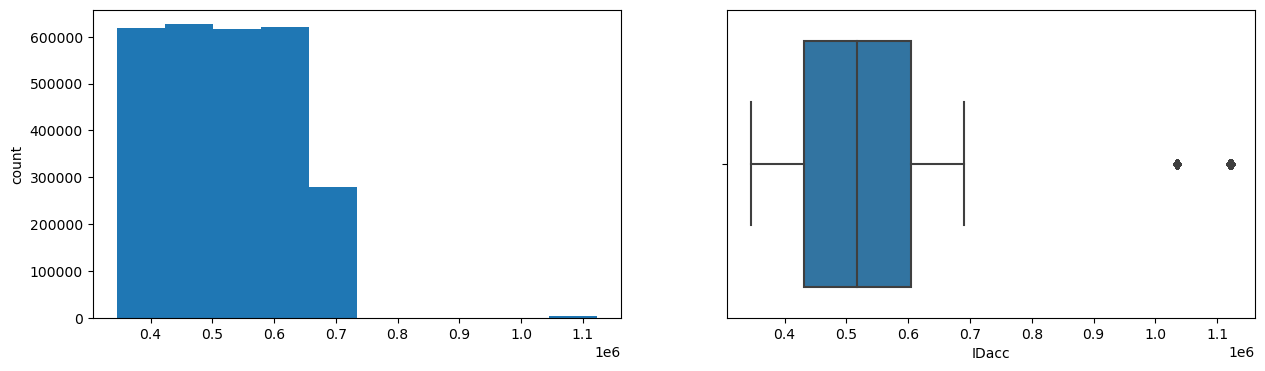

SNAPNUMacc
Skew : -0.06


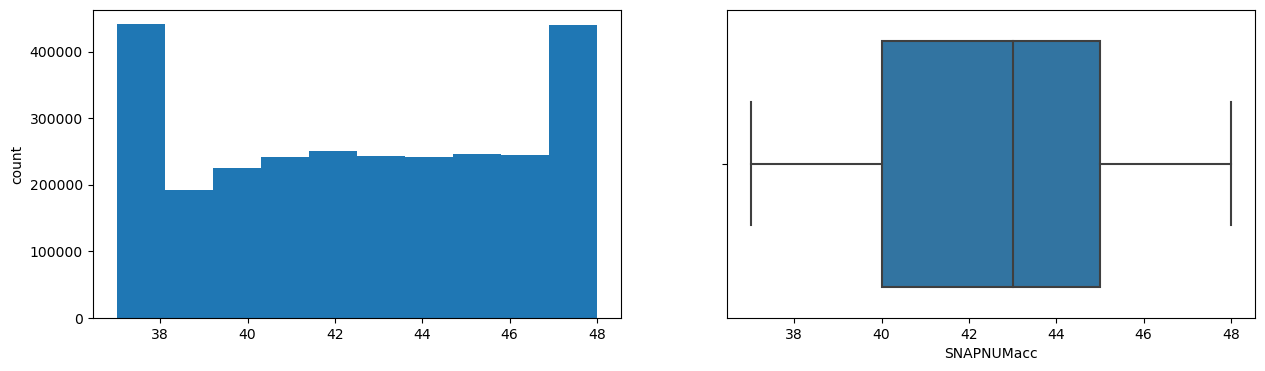

MEAS_ACCH_ORIGINATOR
Skew : 0


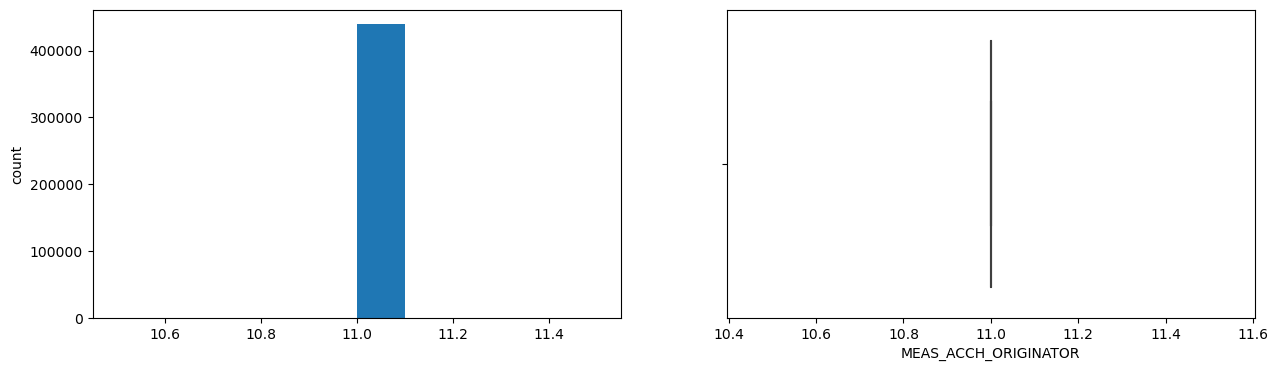

MEAS_ACCL_STRAY_PAYMENT_AMT
Skew : 379.3


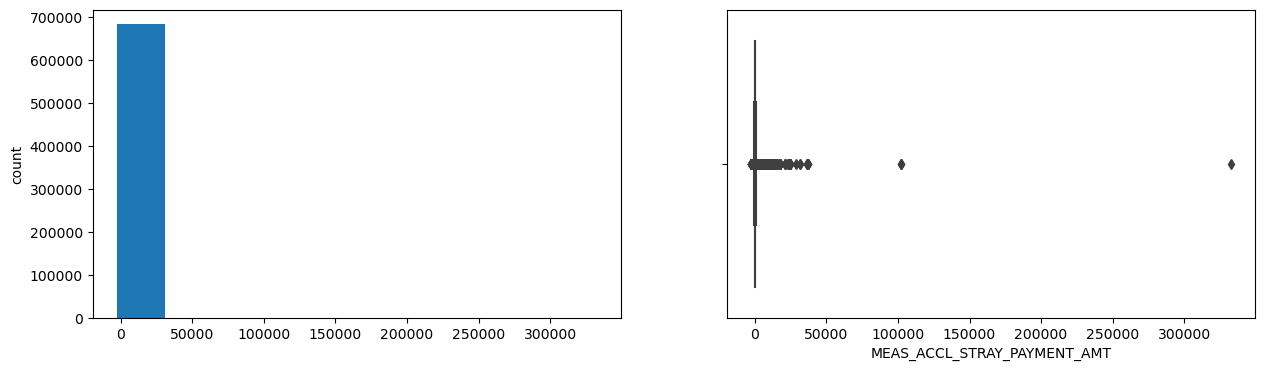

MEAS_ACCL_APLL_FORBORNE
Skew : 83.48


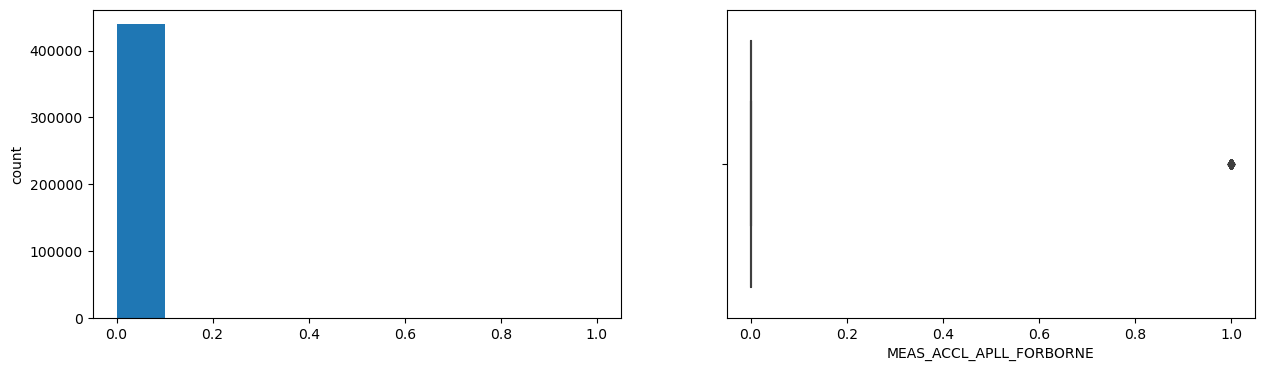

MEAS_ACCL_PROMISE_ACCOUNTS
Skew : 26.64


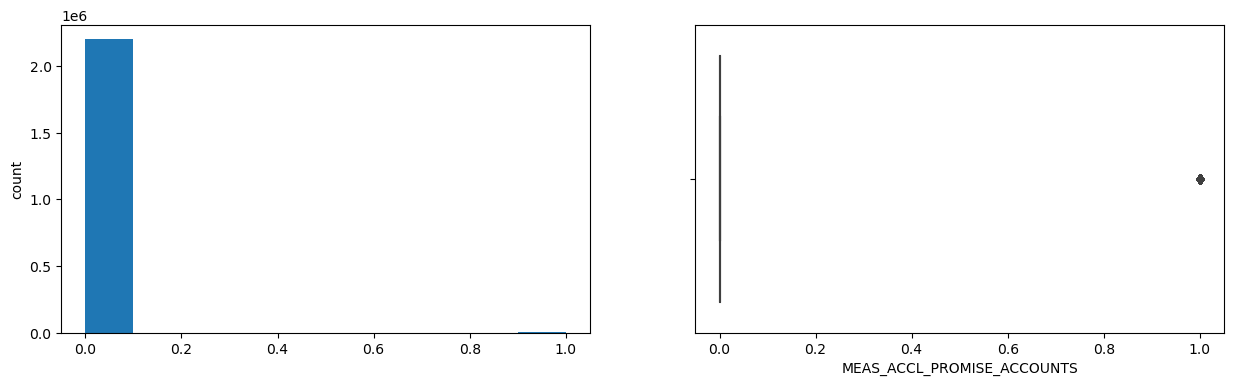

MEAS_ACCL_PROMISE_ACCOUNT
Skew : 29.84


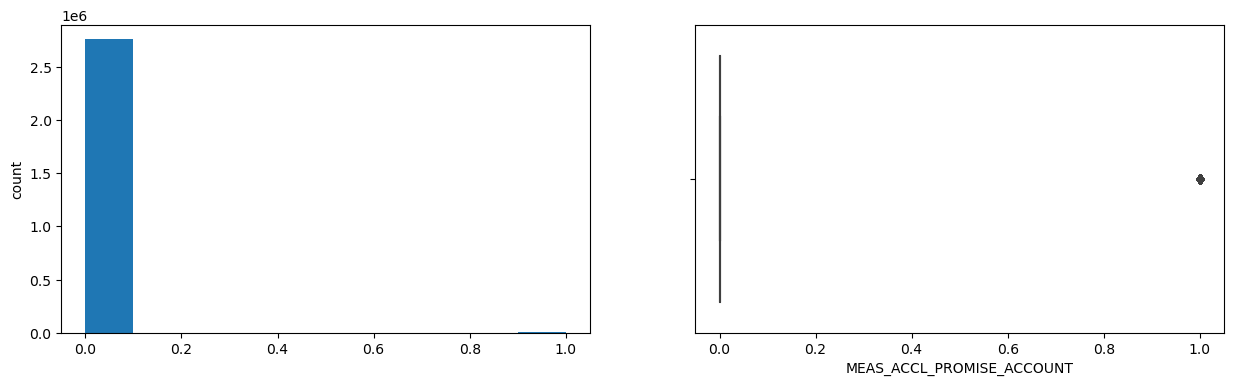

MEAS_ACCL_KEPT_ACCOUNT
Skew : 43.18


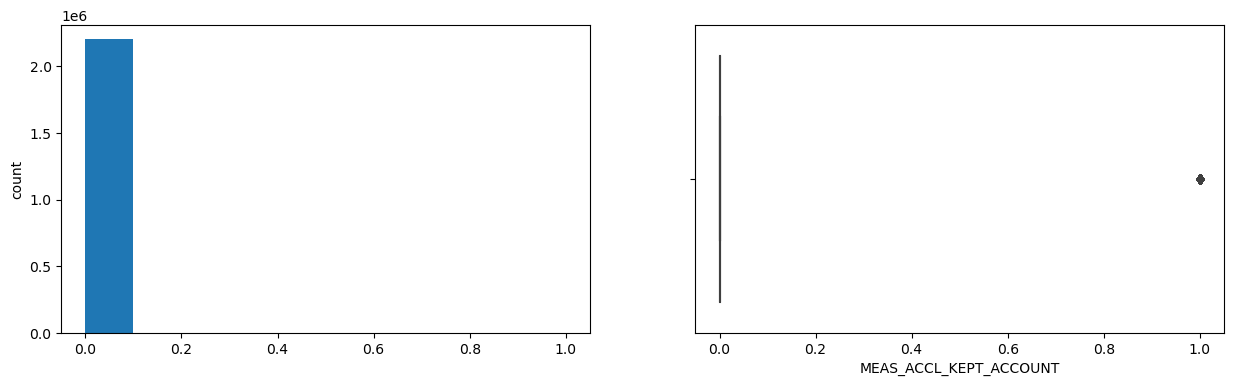

MEAS_ACCL_KEPT_PROMISE
Skew : 49.53


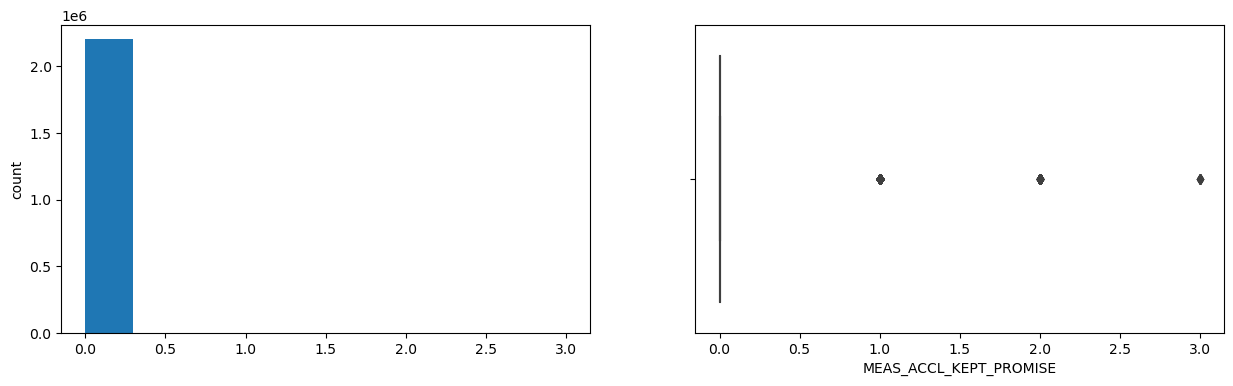

MEAS_ACCL_NUM_OF_PROMISES
Skew : 36.95


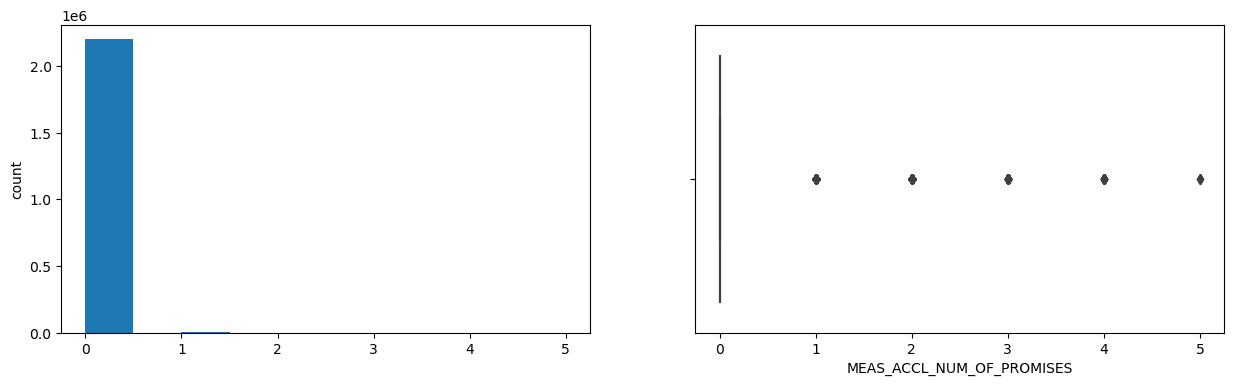

MEAS_ACCL_HAS_ARRANGEMENT_FLAG
Skew : 71.12


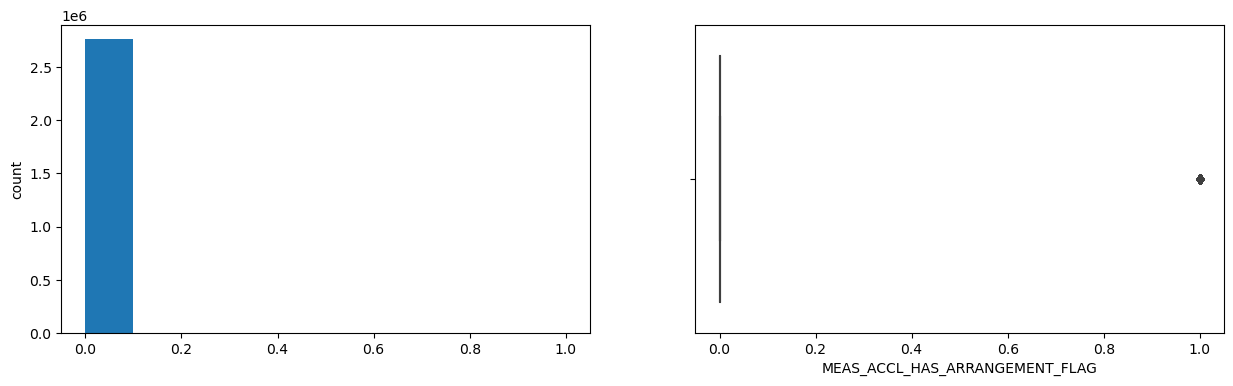

MEAS_ACCL_BROKEN_SETTLEMENT_INDICATOR_CP
Skew : -479.87


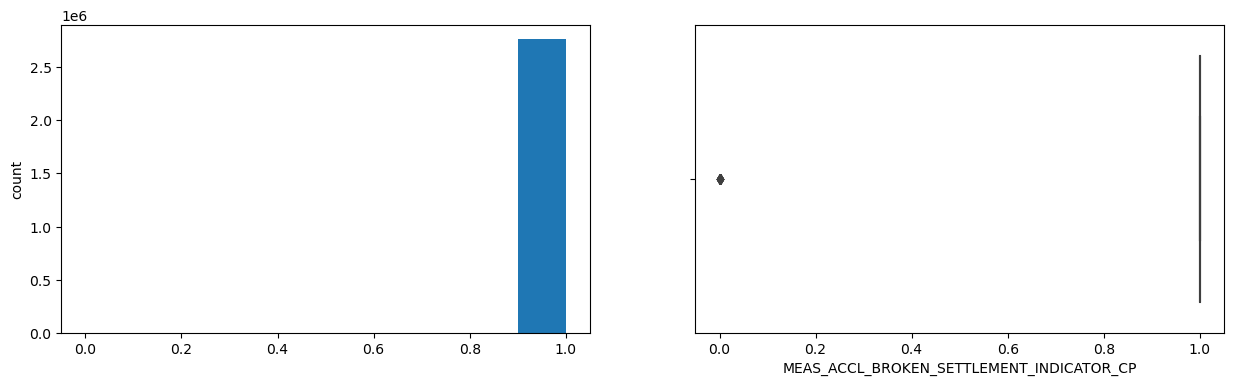

MEAS_ACCL_NBR_OF_PROMISES
Skew : 28.07


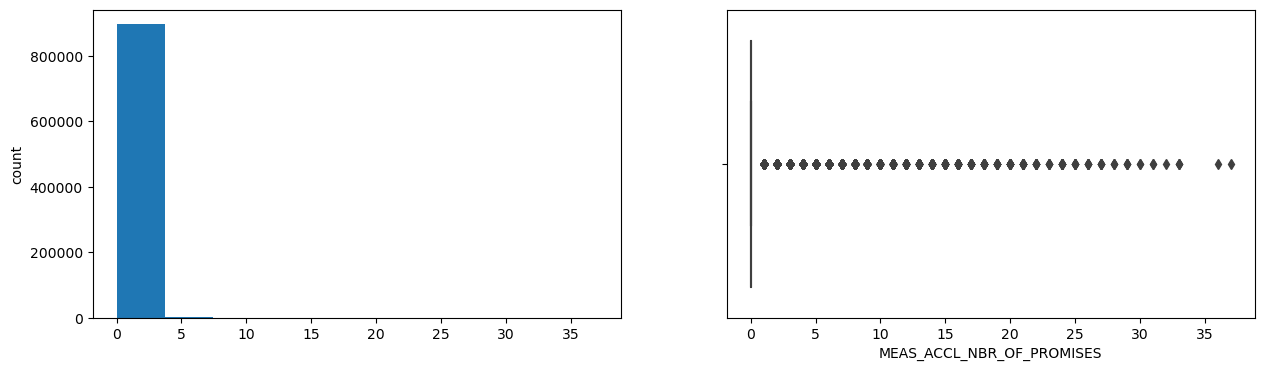

MEAS_ACCL_NBR_OF_UNKEPT_PROMISES
Skew : 29.54


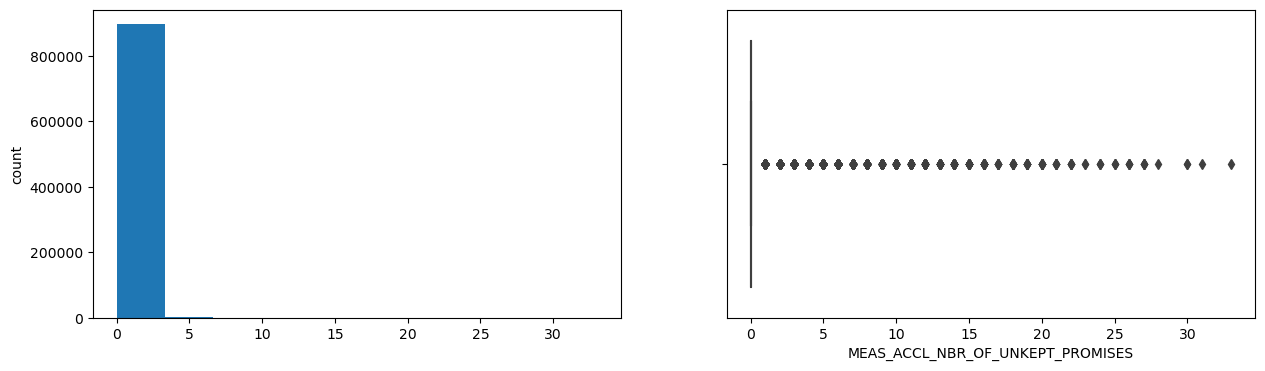

MEAS_ACCL_STATUS_PRIORITY
Skew : -5.31


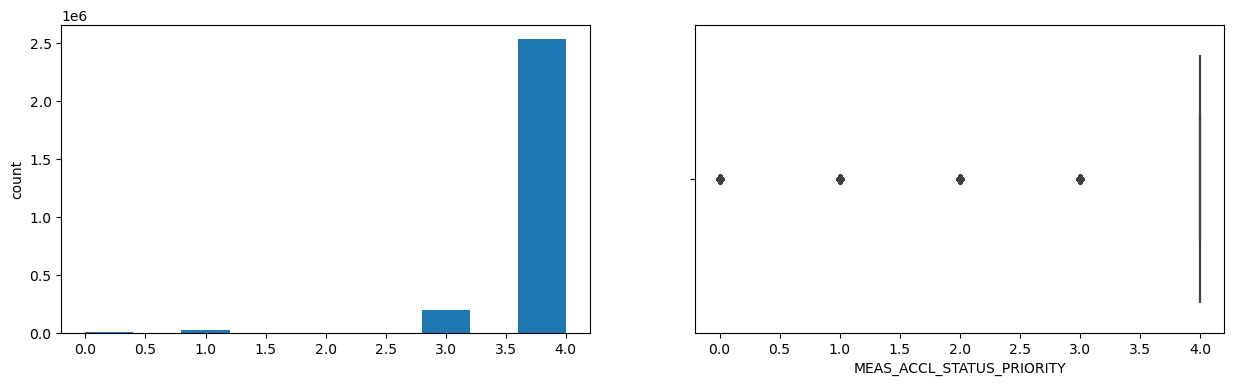

MEAS_ACCL_BUCKET_MAX_NBG
Skew : 0.45


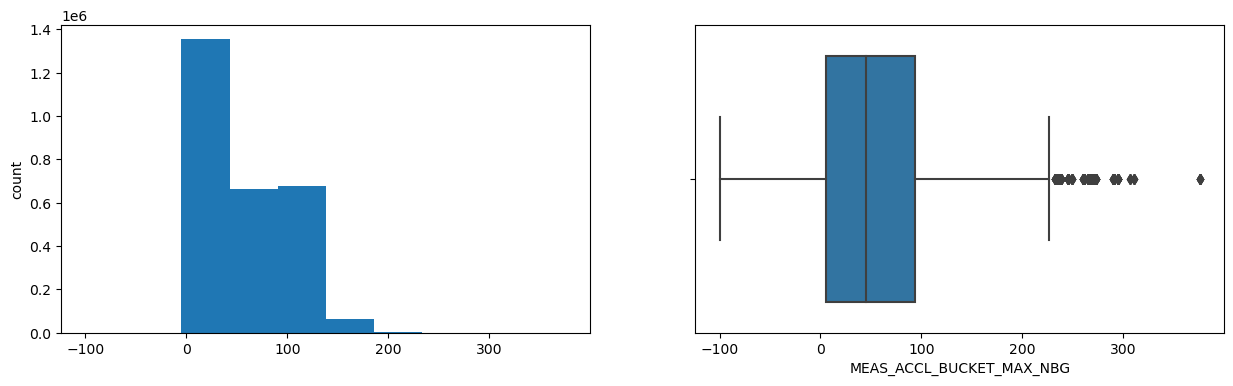

MEAS_ACCL_BILLING_DAY
Skew : 0.63


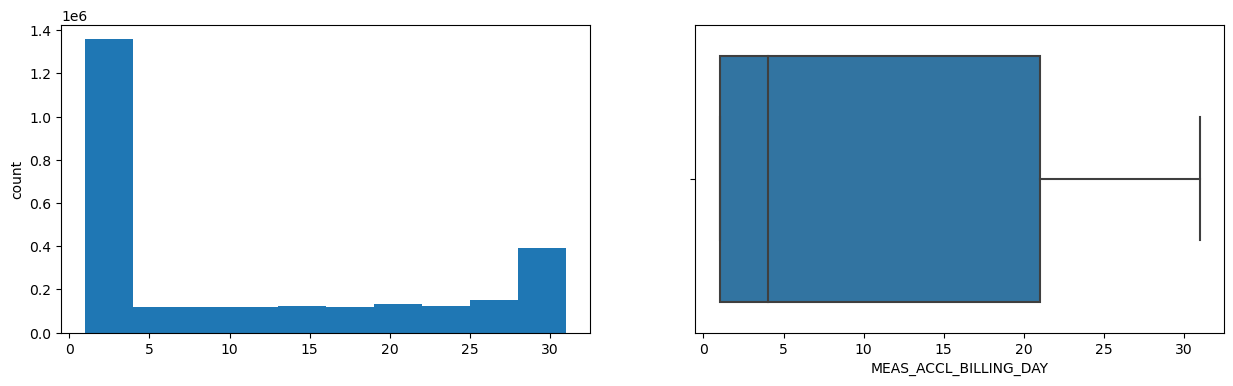

MEAS_ACCT_BRANCH
Skew : 0.47


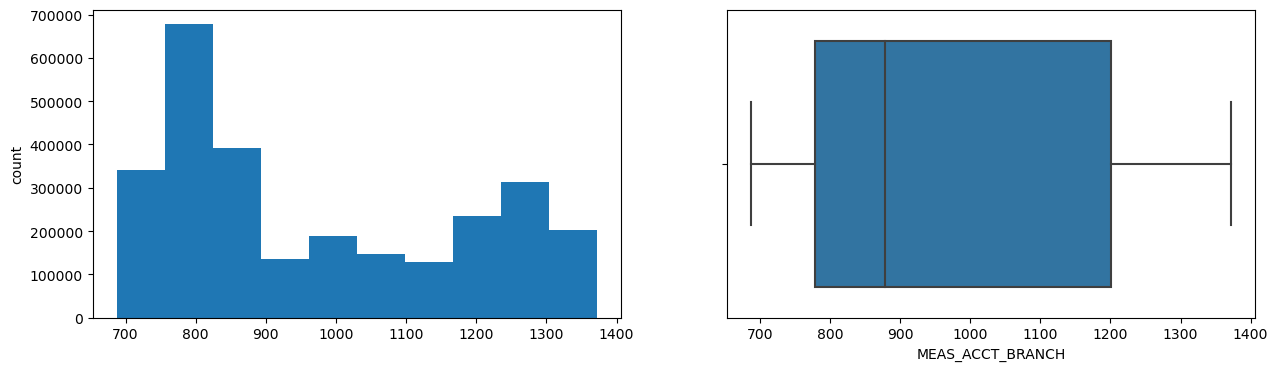

MEAS_ACCH_ACTIVE
Skew : 0


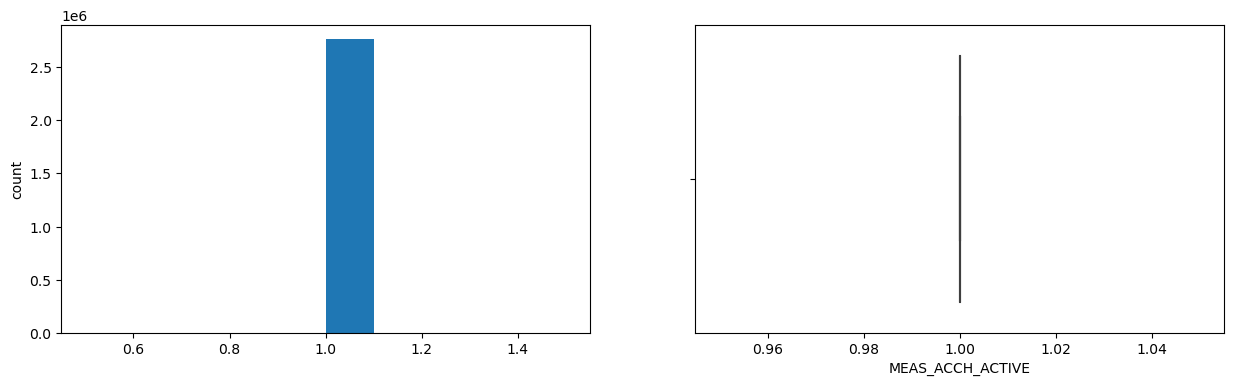

MEAS_ACCH_DELDAYS
Skew : 0.49


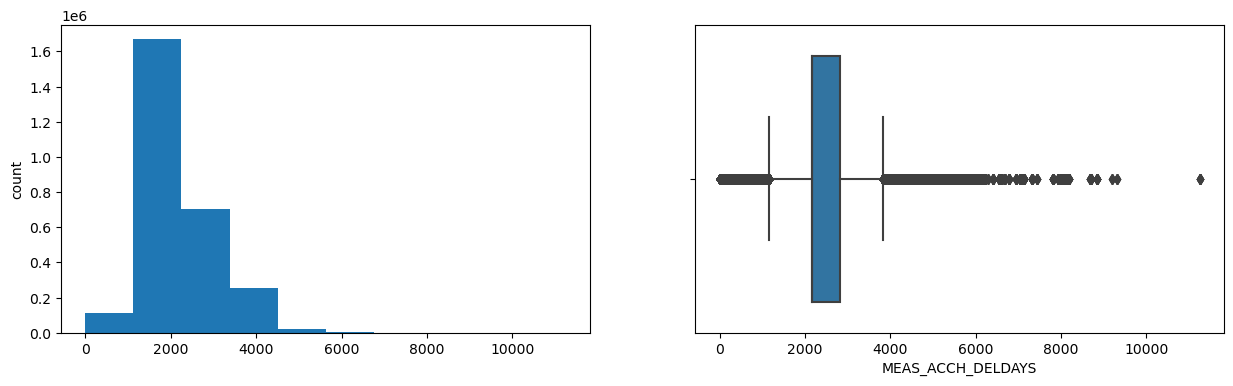

MEAS_ACCH_QC_ISCASE
Skew : 0


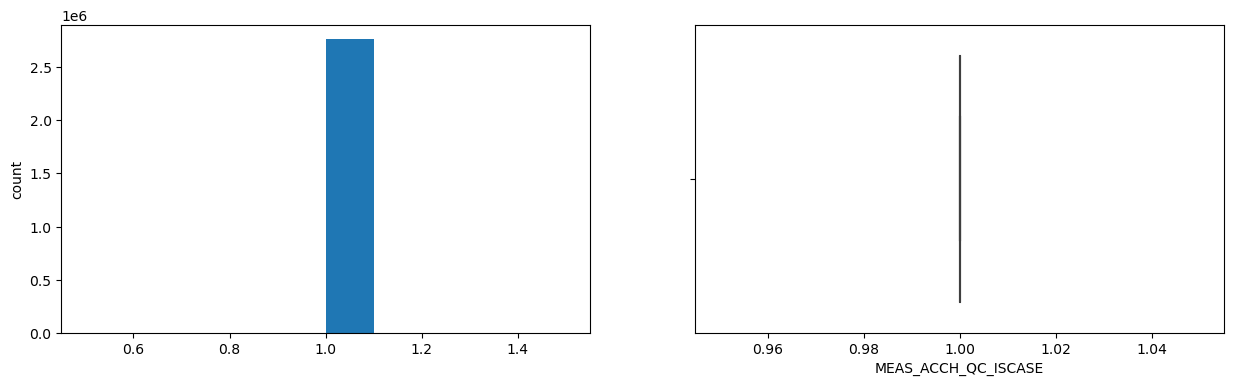

MEAS_ACCH_QC_ISCONTRACT
Skew : 0


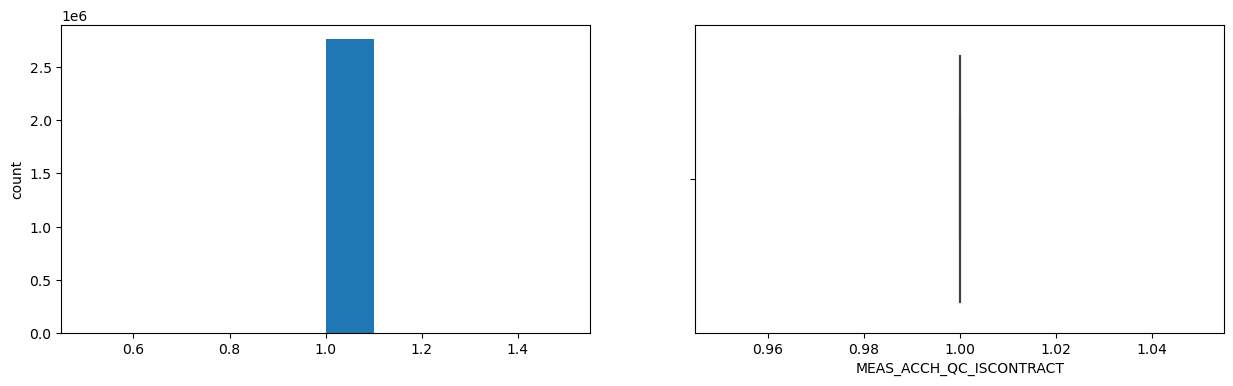

MEAS_ACCH_COUNT_RESCHEDULINGS
Skew : 12.62


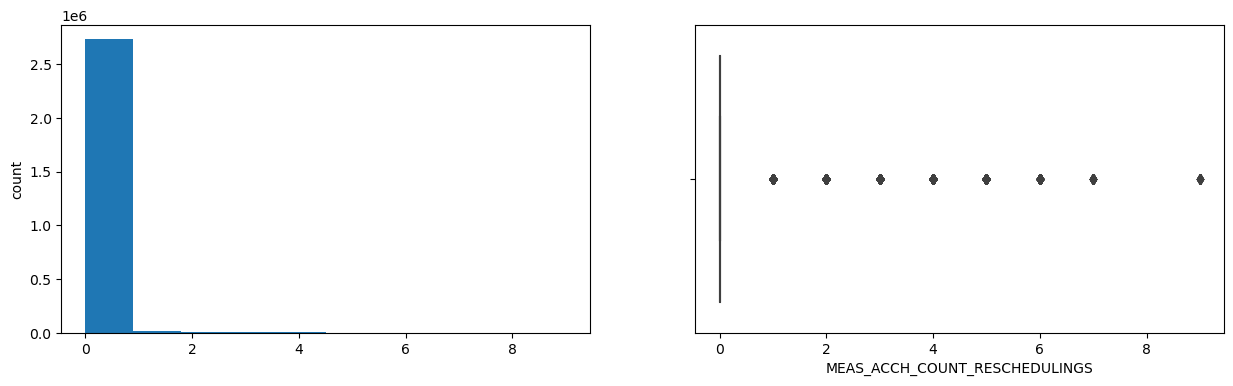

MEAS_ACCH_FLAG_LITIGATION
Skew : 0


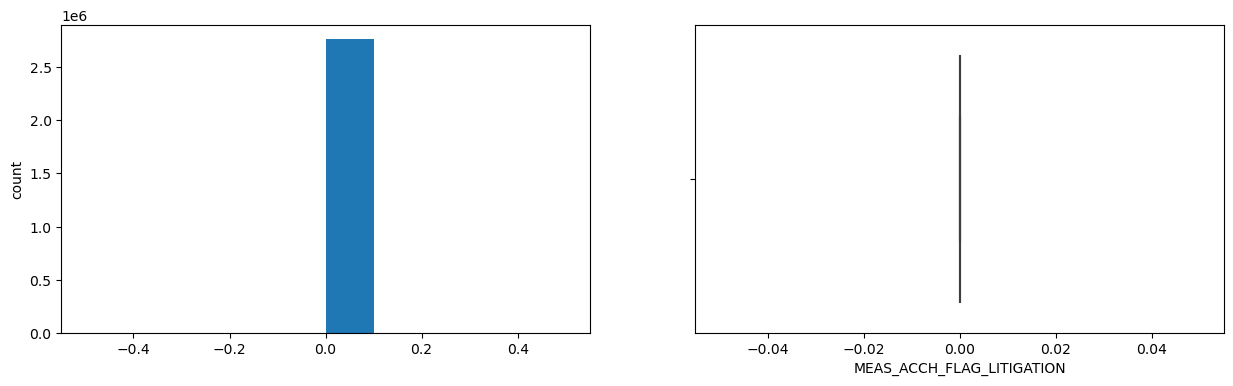

MEAS_ACCL_SECONDARY_FLOW_FLAG
Skew : 3.42


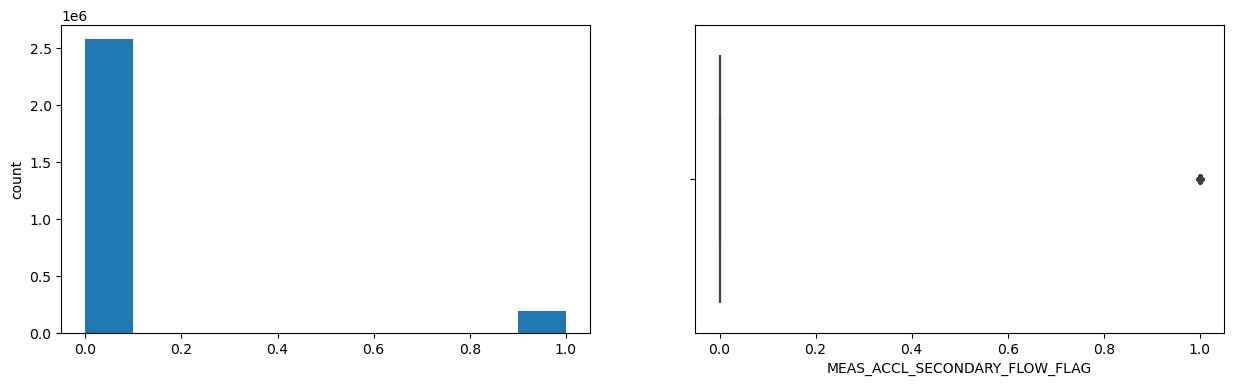

MEAS_ACCH_FLAG_COSIGNER
Skew : 7.51


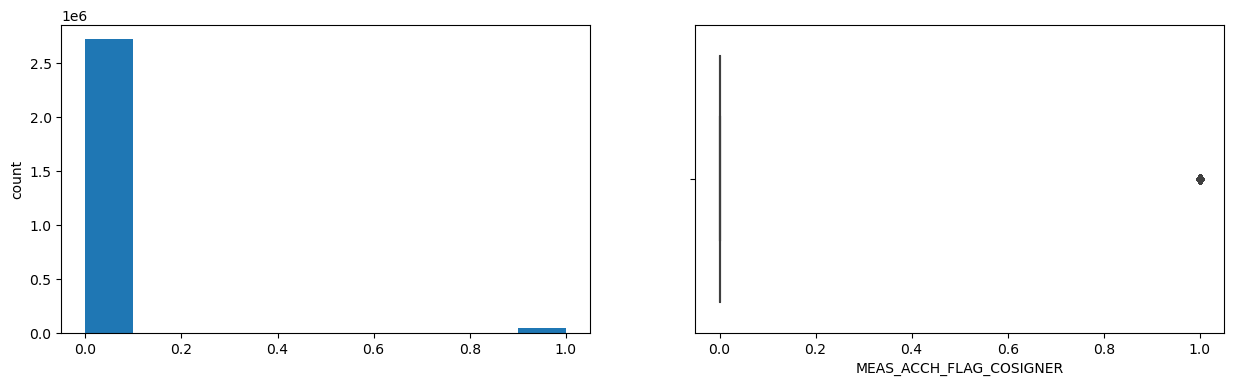

MEAS_ACCH_FLAG_GUARANTOR
Skew : 3.54


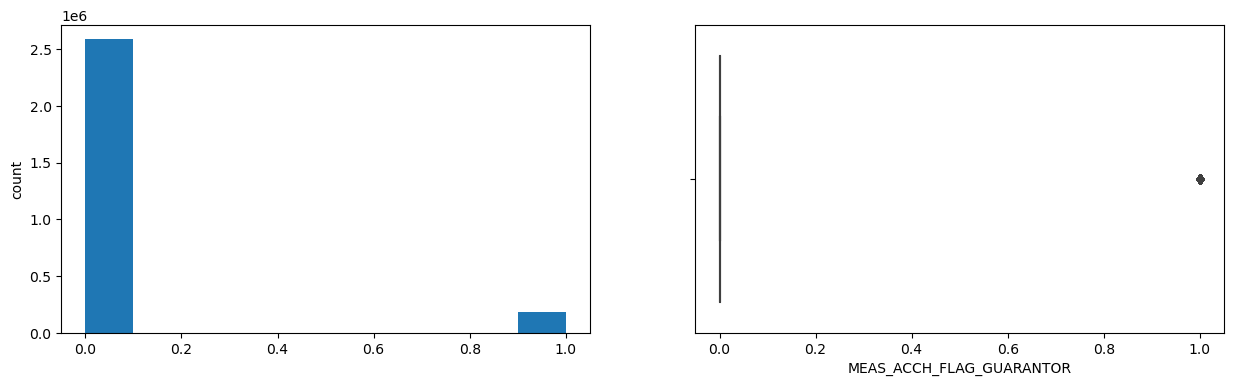

MEAS_ACCL_NUMBER_OF_COLLATERALS
Skew : 11.42


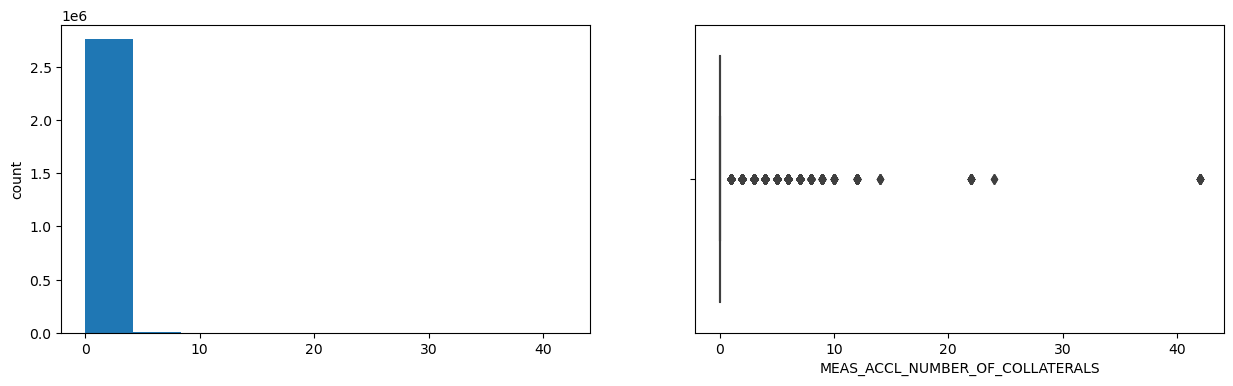

MEAS_ACCL_PAYMENT_IN_ALLOCATION
Skew : 8.24


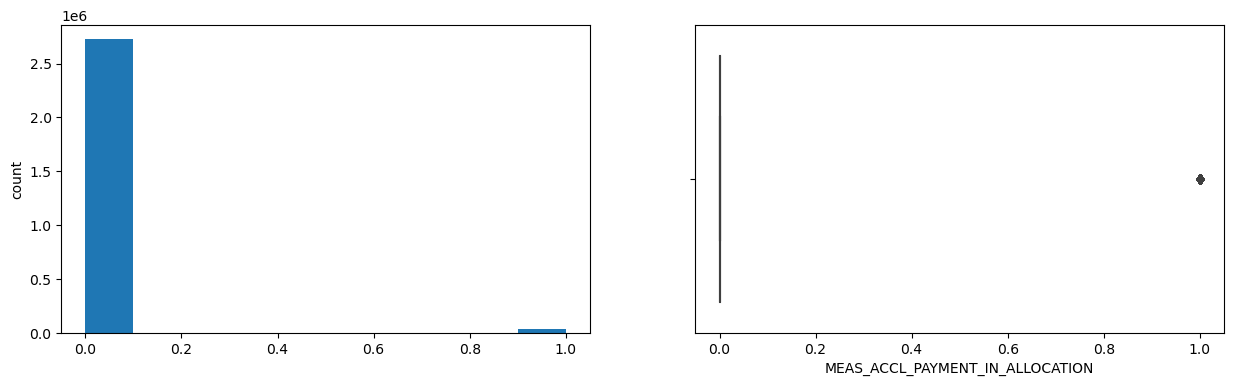

MEAS_ACCH_FLAG_SECURED
Skew : 8.86


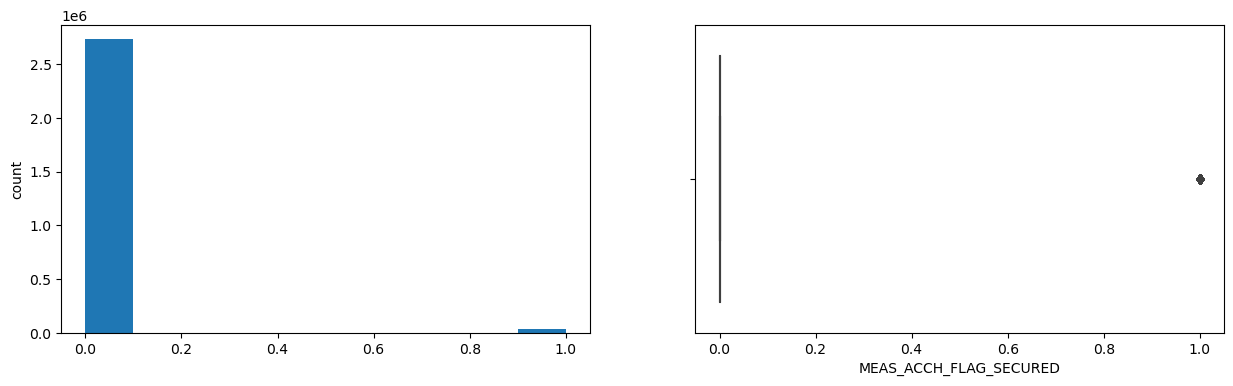

MEAS_ACCT_CUST_CODE
Skew : -0.05


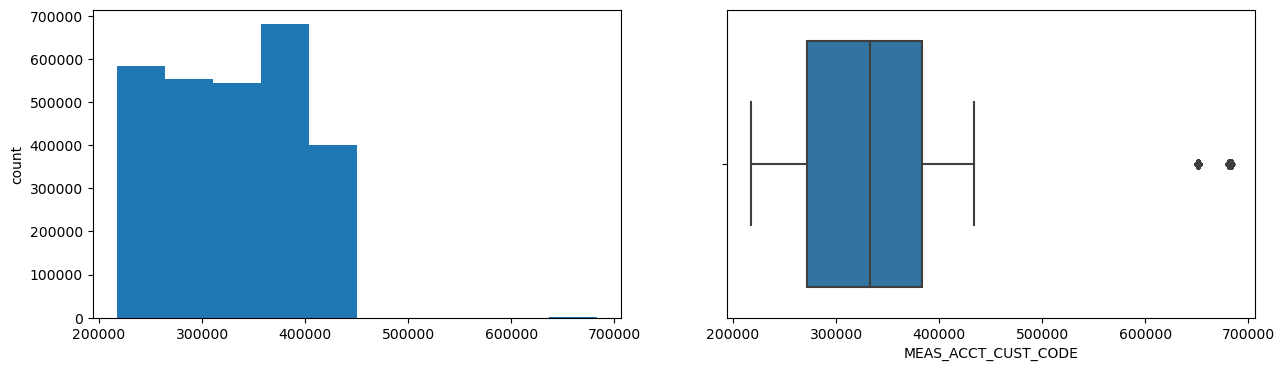

MEAS_ACCL_INDICATION_CONTACT_ANY_CP
Skew : 2.06


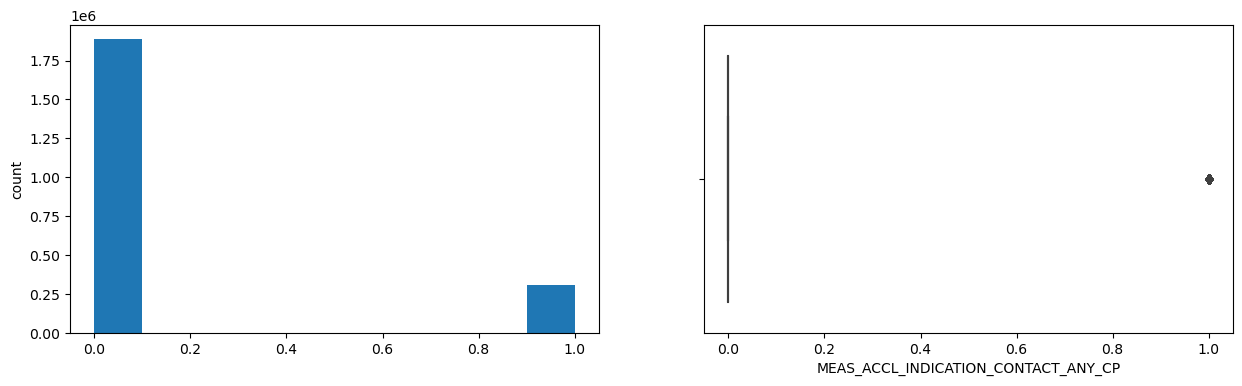

MEAS_ACCL_INDICATION_CONTACT_ATTEMPT_CP
Skew : -5.21


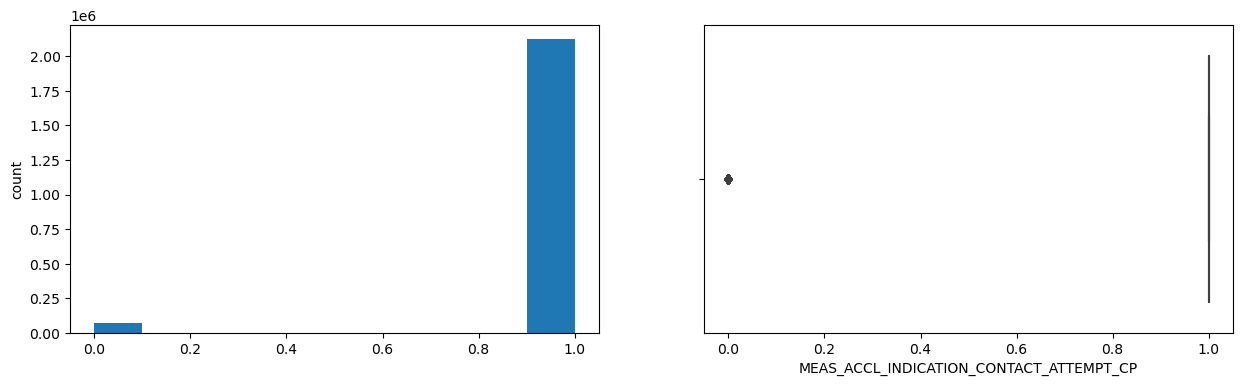

MEAS_ACCL_INDICATION_CONTACT_RIGHTPERSON_CP
Skew : 2.68


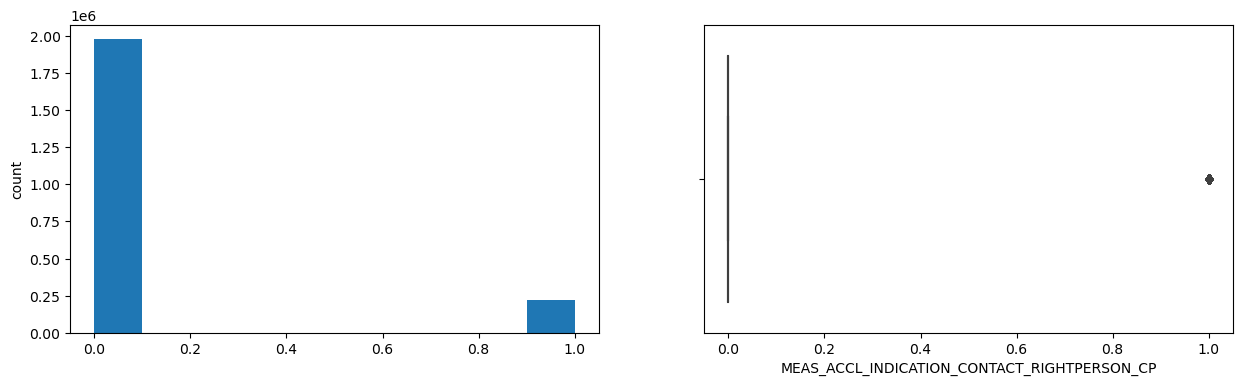

MEAS_ACCL_ALLOCATION_CODE
Skew : -2.14


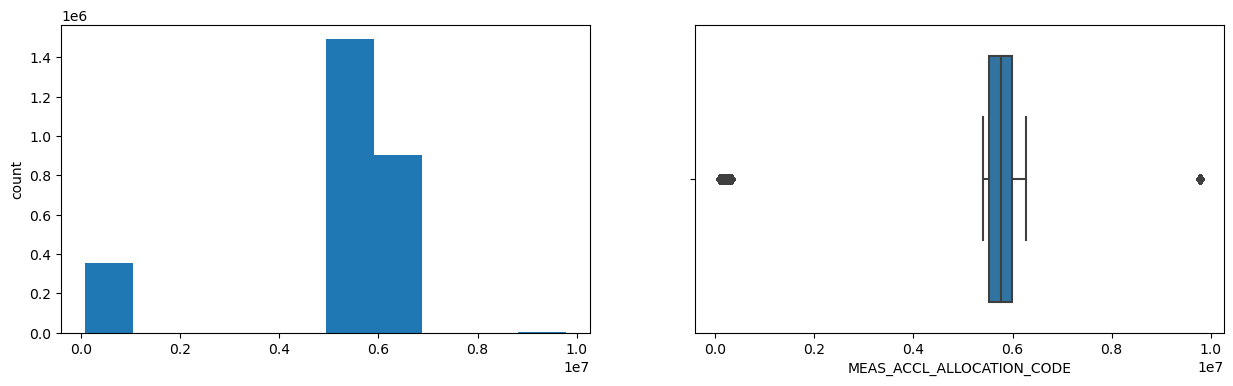

MEAS_PROD_CODE
Skew : -0.44


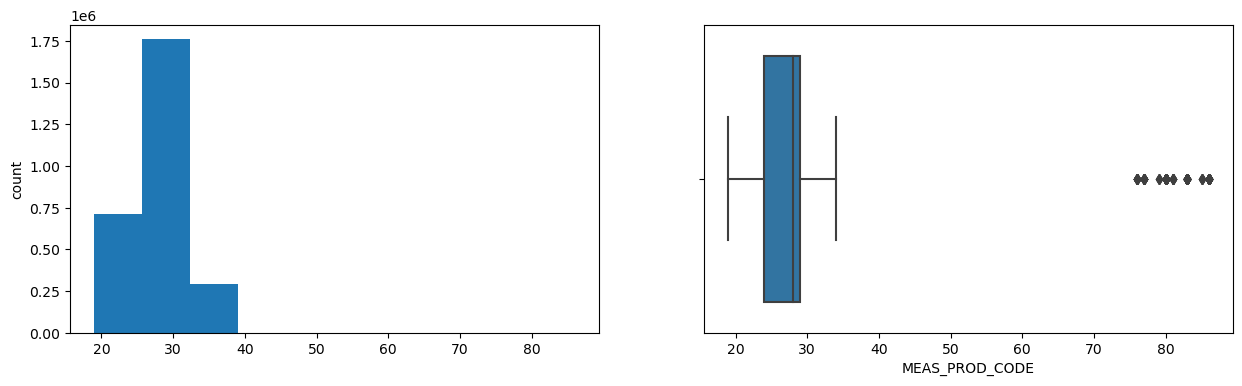

MEAS_ACCH_SNAPNUM
Skew : -0.06


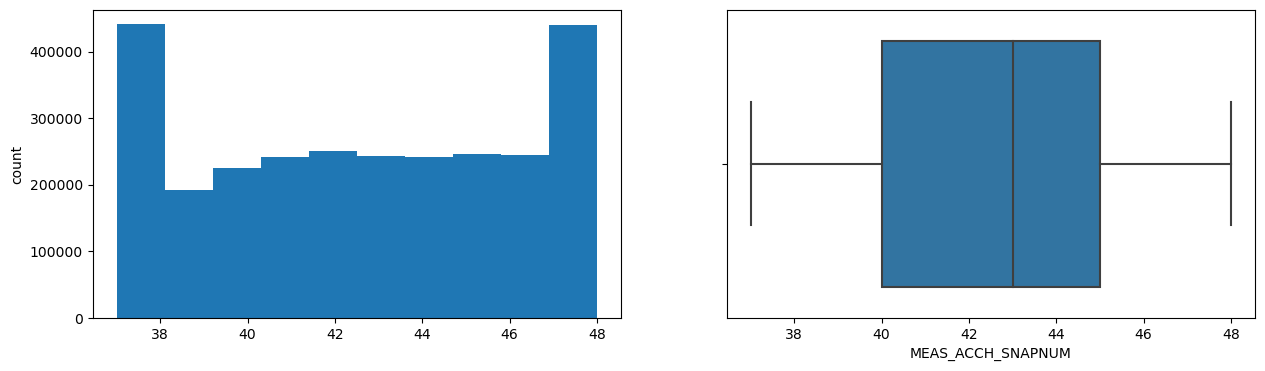

MEAS_SPRD_CODE
Skew : 1.31


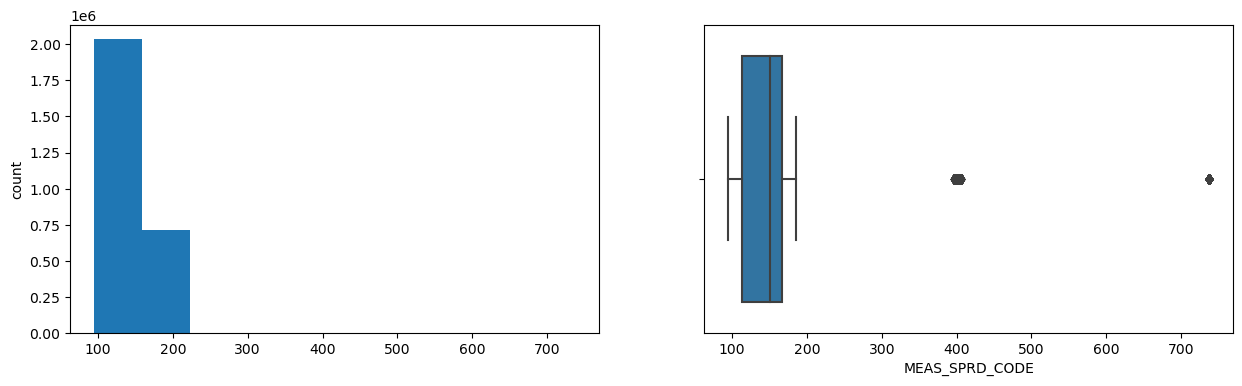

MEAS_ACCL_CONTACT_NUM_ATTEMPTS_CP
Skew : 8.78


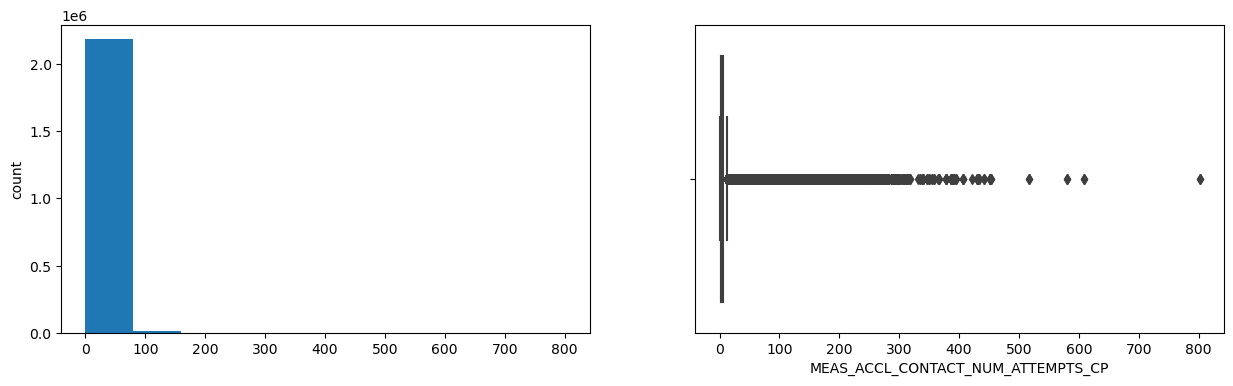

MEAS_ACCL_CONTACT_NUM_RPC_CP
Skew : 8.94


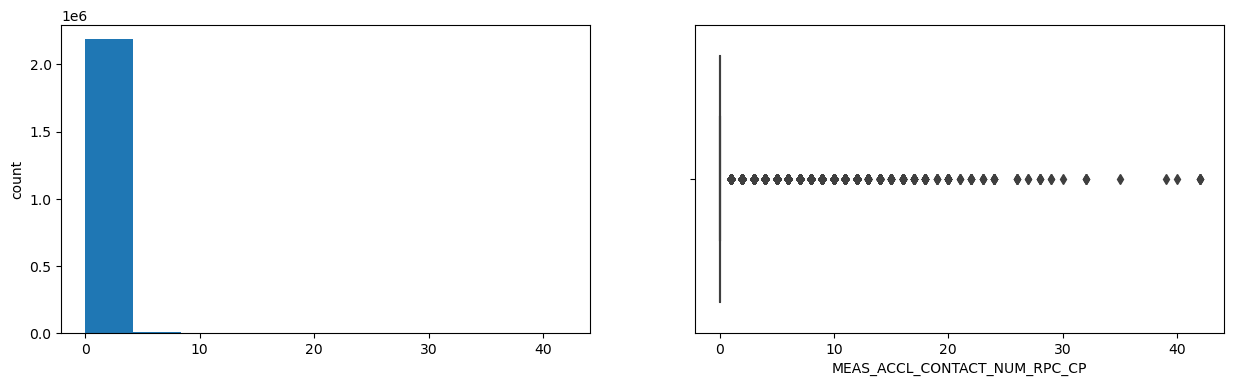

MEAS_ACCL_EBA_FORBORNE
Skew : 11.9


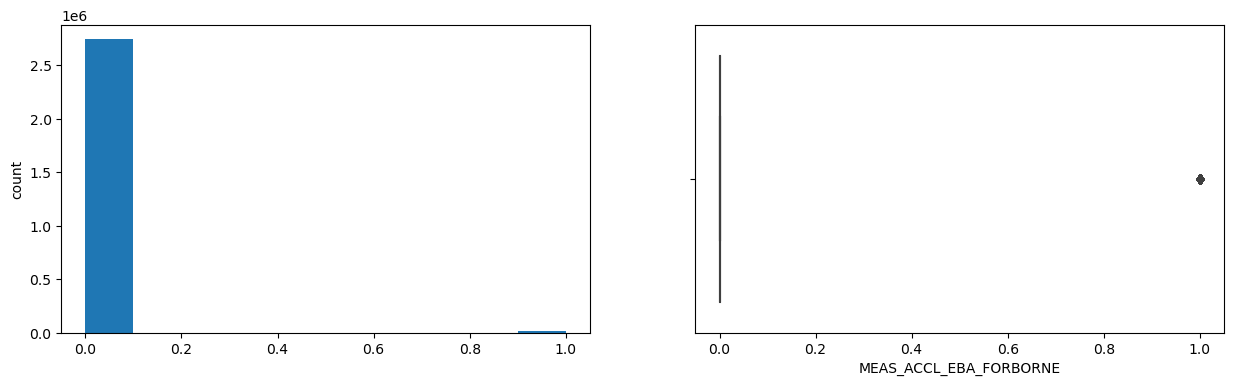

MEAS_ACCL_NUMBER_OF_GUARANTORS
Skew : 5.65


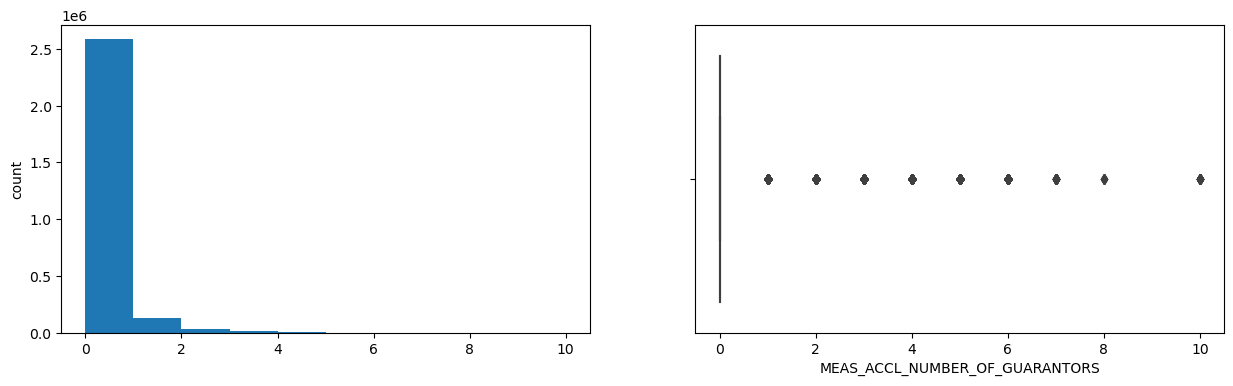

MEAS_ACCL_ACTUAL_CONTACTS
Skew : 7.37


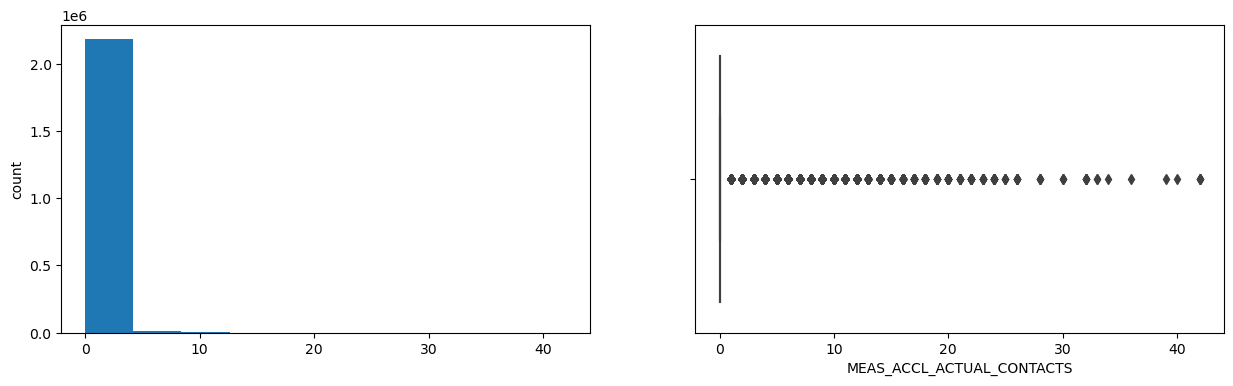

MEAS_ACCL_ACTUAL_CONTACTS_PM
Skew : 7.43


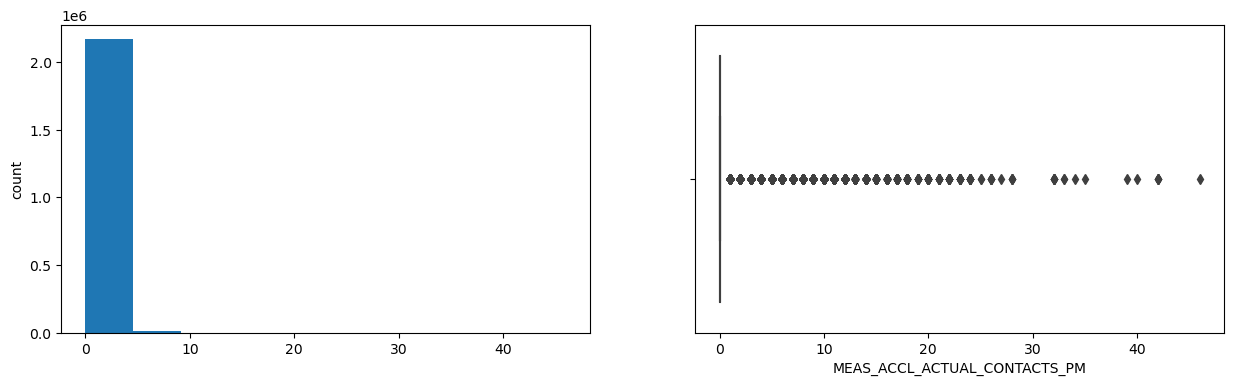

MEAS_ACCL_PAYMENT_RECONCILIATION_CODE
Skew : 0.47


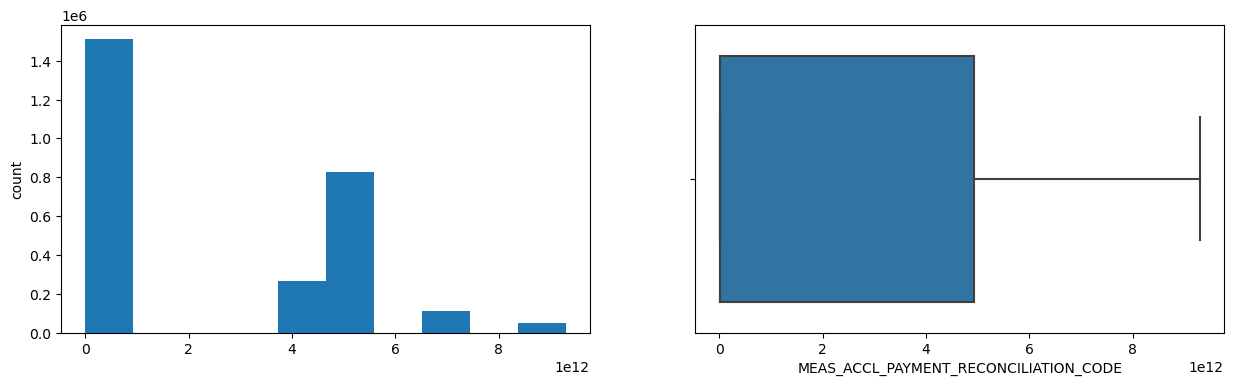

MEAS_ACCL_FLAG_OPEN_RECENTLY
Skew : 0


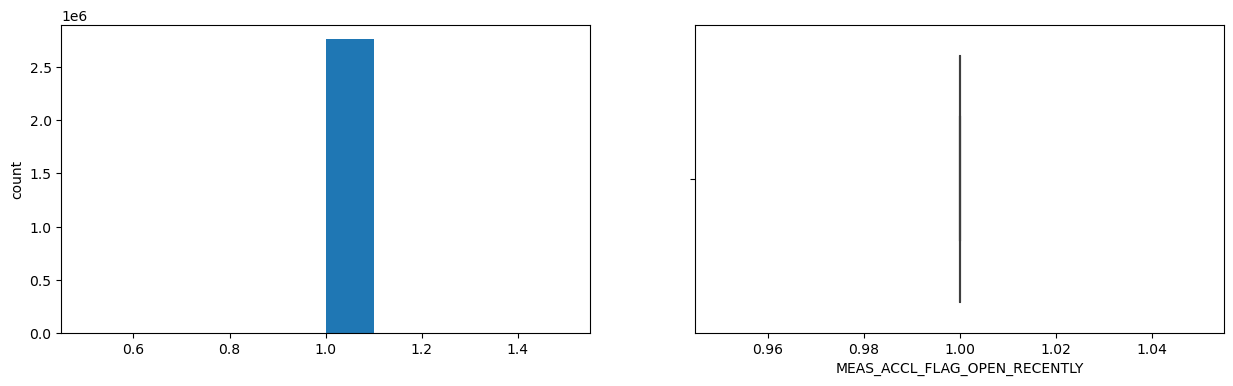

MEAS_ACCL_PHONE_RPC_COUNT_EVER
Skew : 6.75


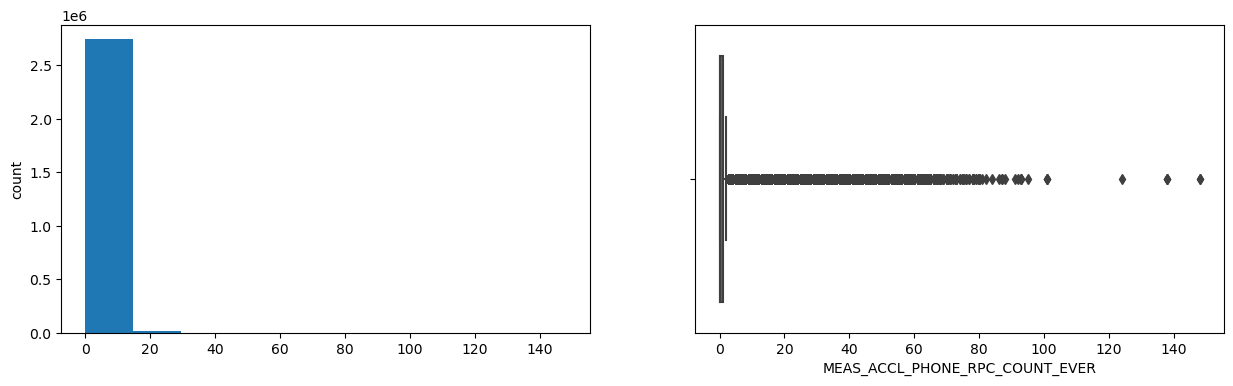

MEAS_ACCL_EED_PERCENT
Skew : 0


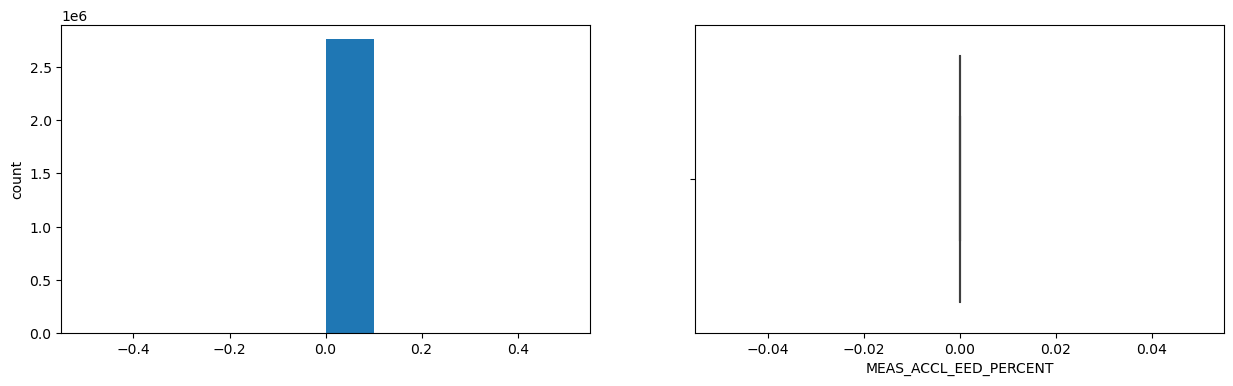

MEAS_ACCL_PAYMENTS_REPAYMENT_PLAN_CP
Skew : 914.64


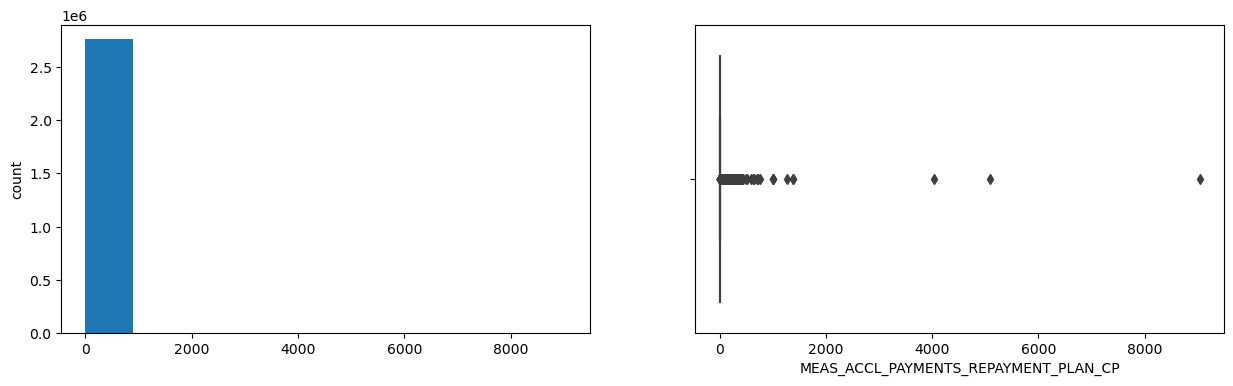

MEAS_ACCL_PAYMENTS_ONEOFF_YTD
Skew : 1023.82


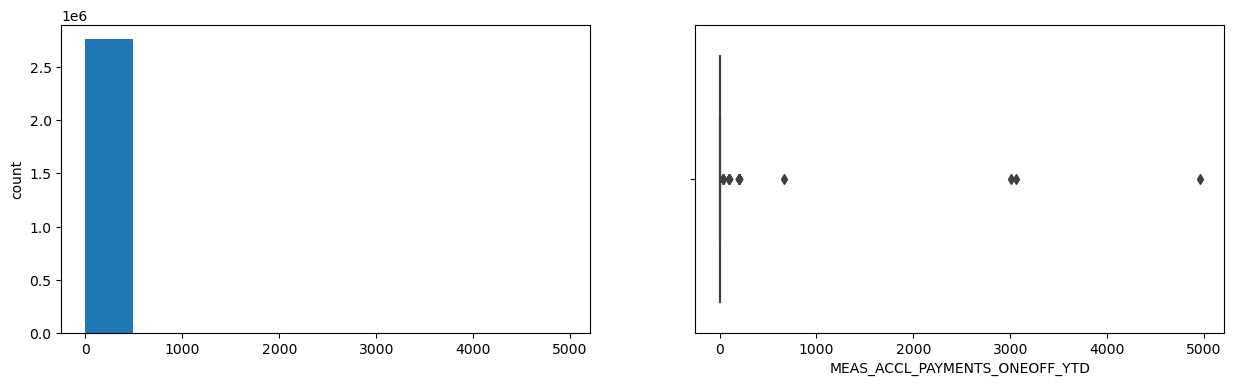

MEAS_ACCL_PAYMENTS_REPAYMENT_PLAN_YTD
Skew : 219.73


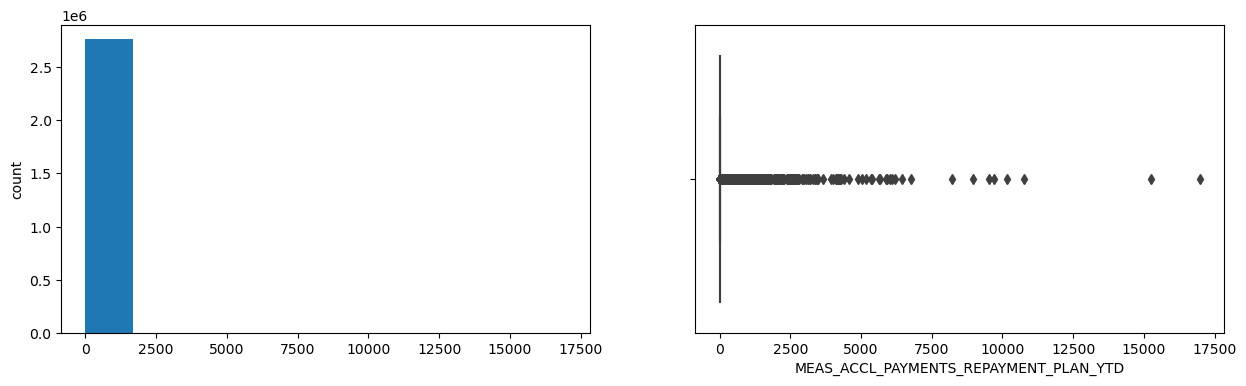

MEAS_ACCL_PAYMENTS_NO_SETTLEMENT_YTD
Skew : 139.61


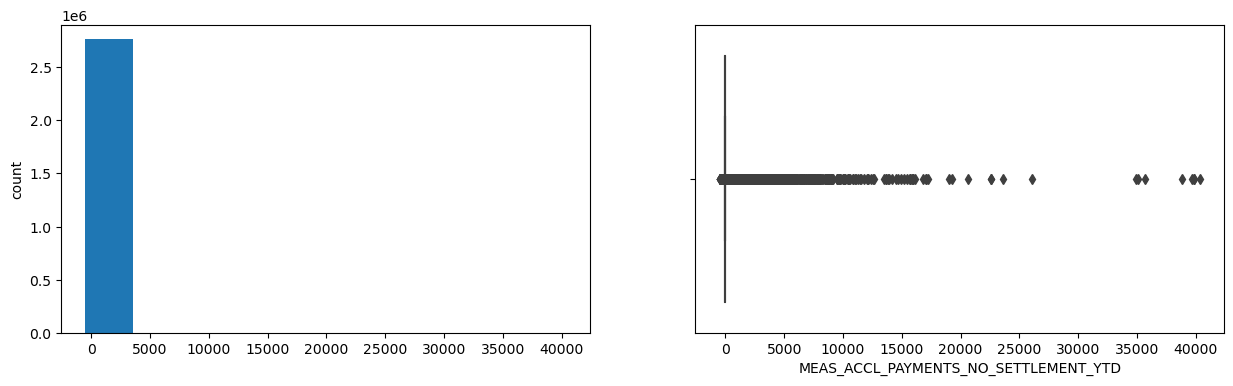

MEAS_ACCL_AMT_PROMISE
Skew : 194.25


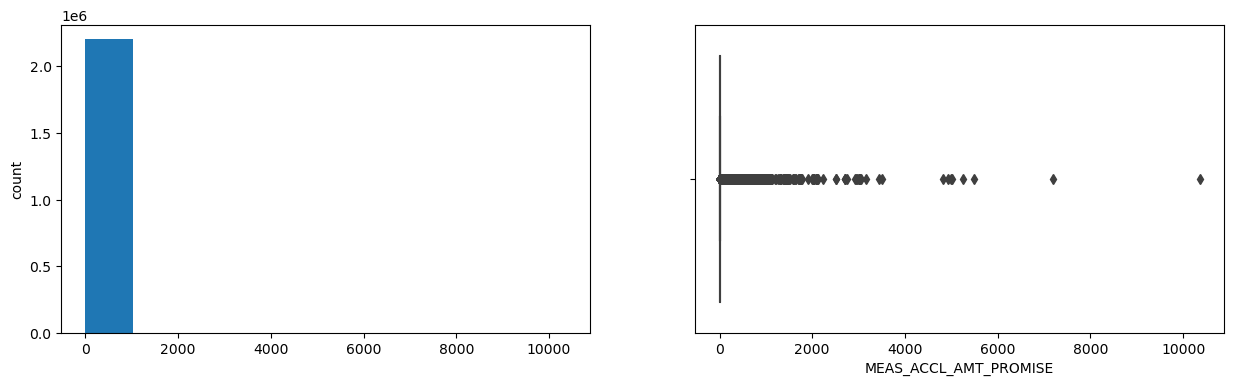

MEAS_ACCL_AMT_KEPT
Skew : 359.3


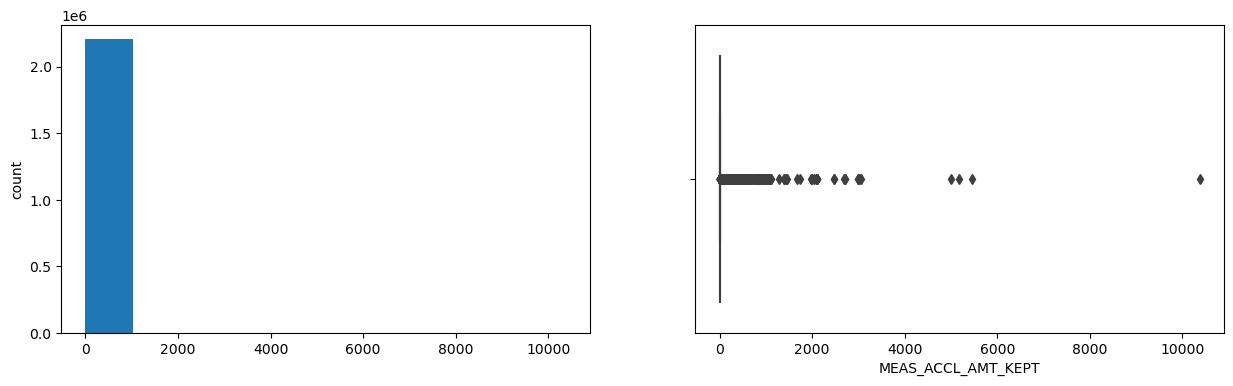

MEAS_ACCL_ARRANGEMENT_PRINCIPAL
Skew : 184.39


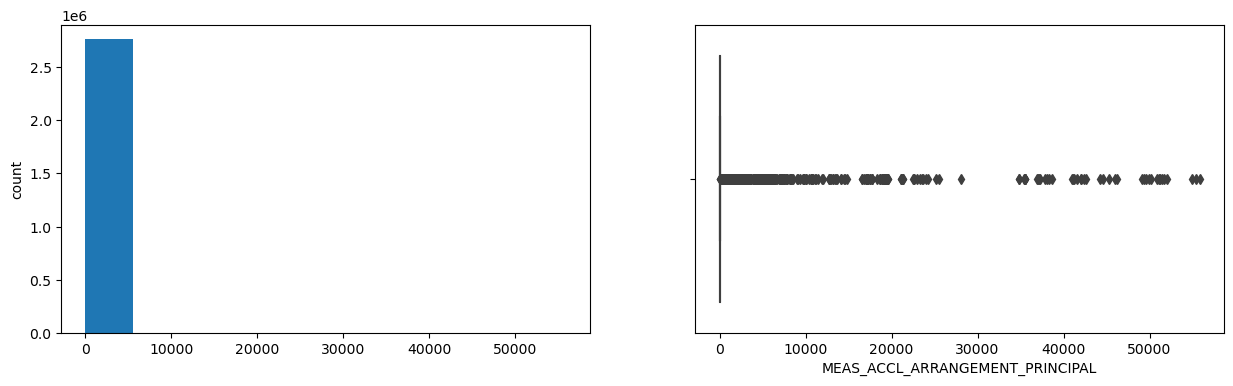

MEAS_ACCL_ARRANGEMENT_BALANCE
Skew : 174.53


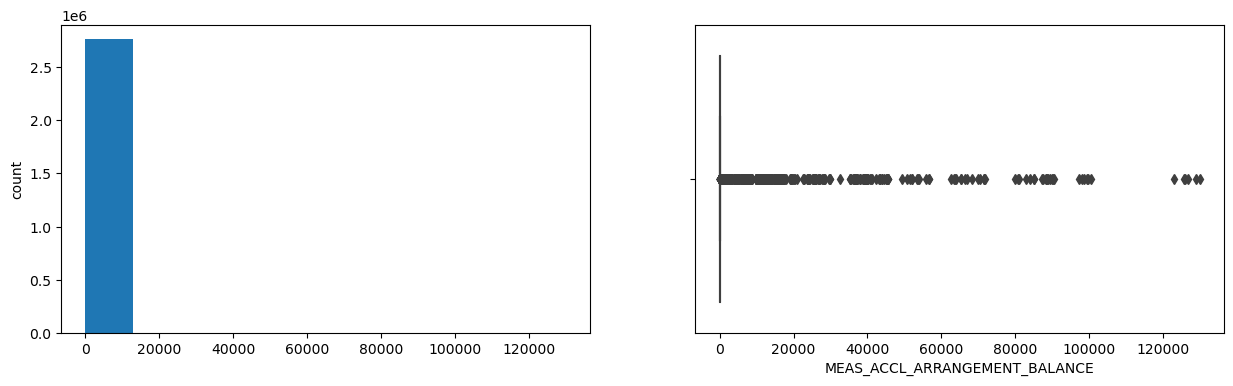

MEAS_ACCL_AMT_INSTAL_NOT_MATURED_CM
Skew : -407.06


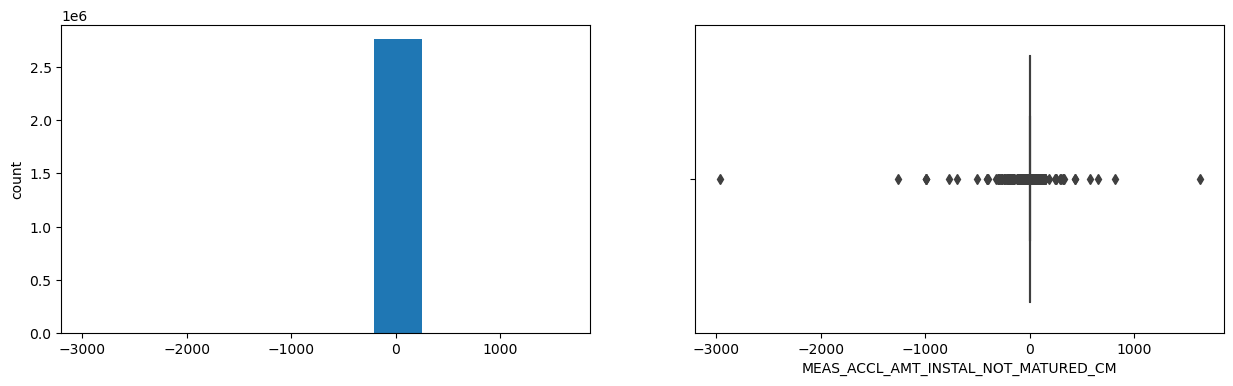

MEAS_ACCL_APPL_AMT_APPROVED
Skew : 110.81


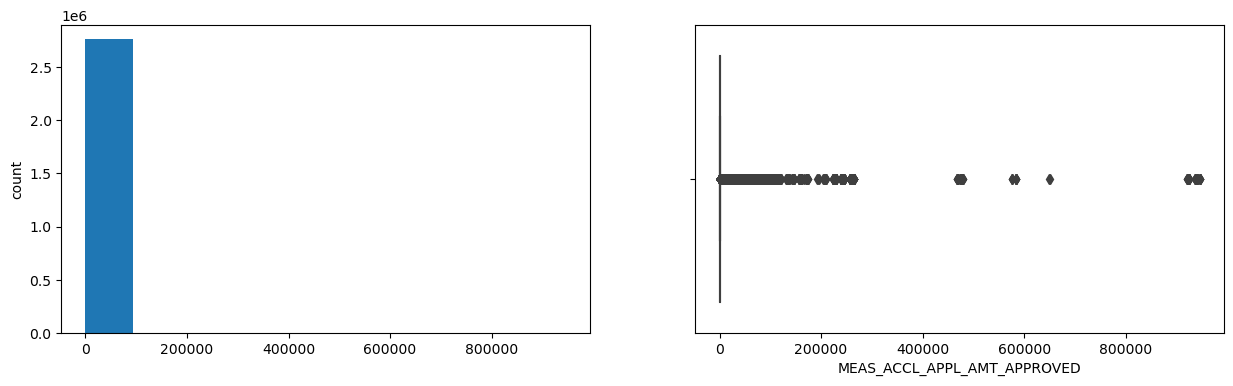

MEAS_ACCL_APPL_AMT_DUNNING
Skew : 0


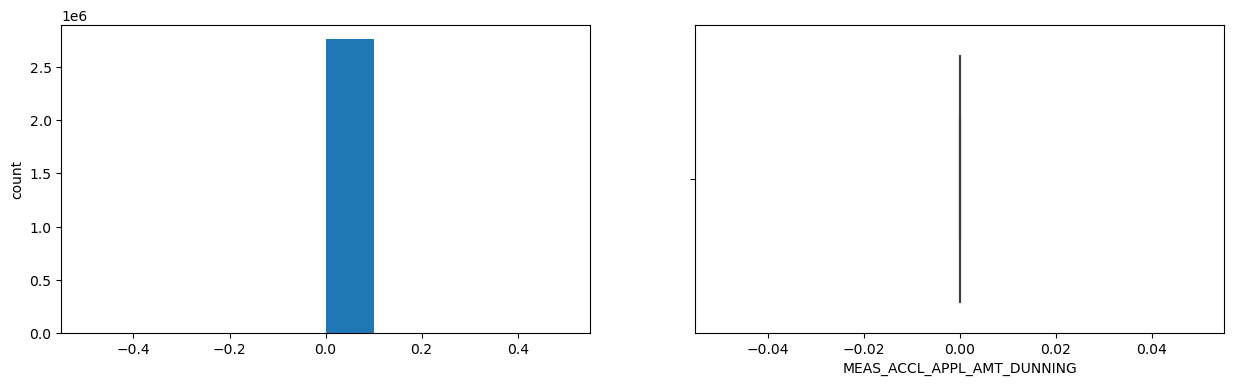

MEAS_ACCL_APPL_AMT_APPROVED_NEW
Skew : 0


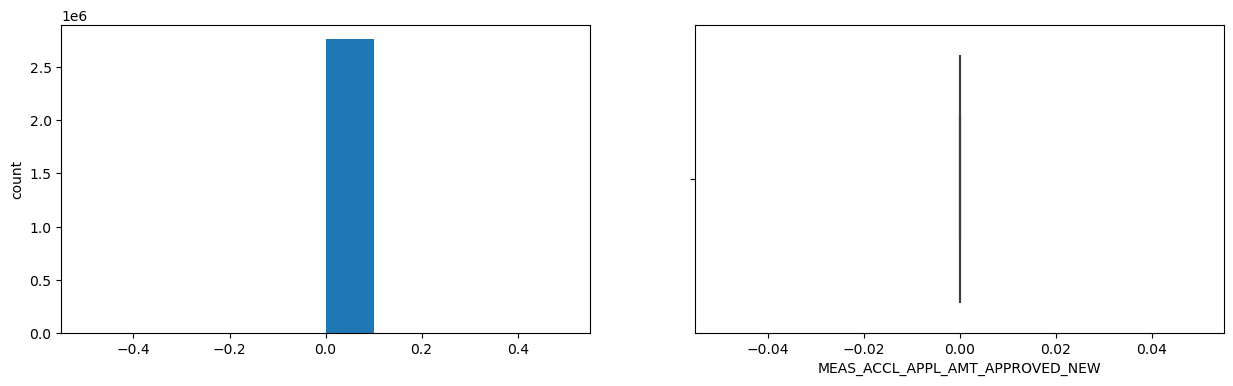

MEAS_ACCL_APPL_AMT_FALLOFF
Skew : 114.15


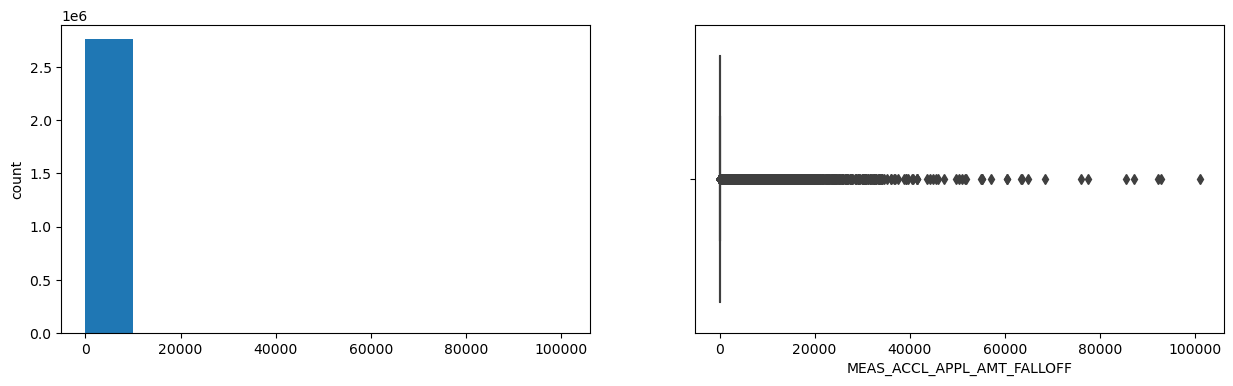

MEAS_ACCL_LMEM_PAYMENTS_CP
Skew : 0


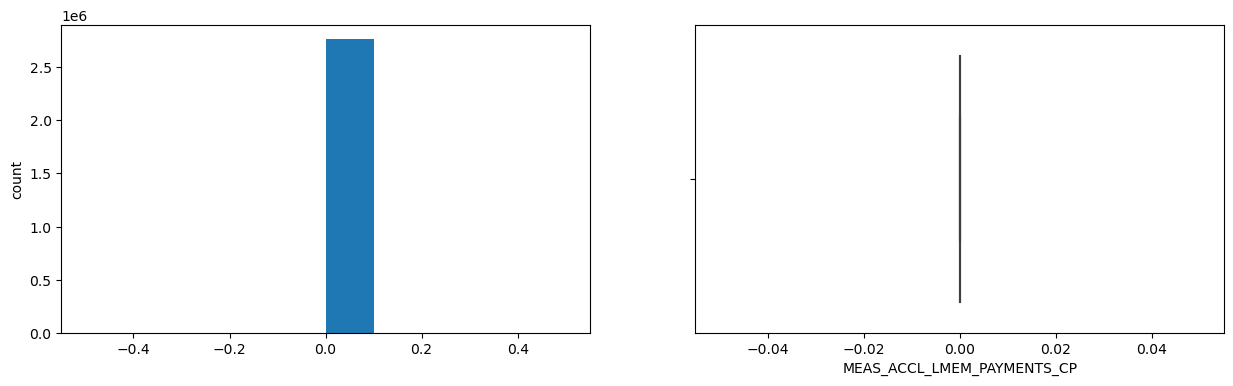

MEAS_ACCL_LMEM_PAYMENTS_CUMUL
Skew : 0


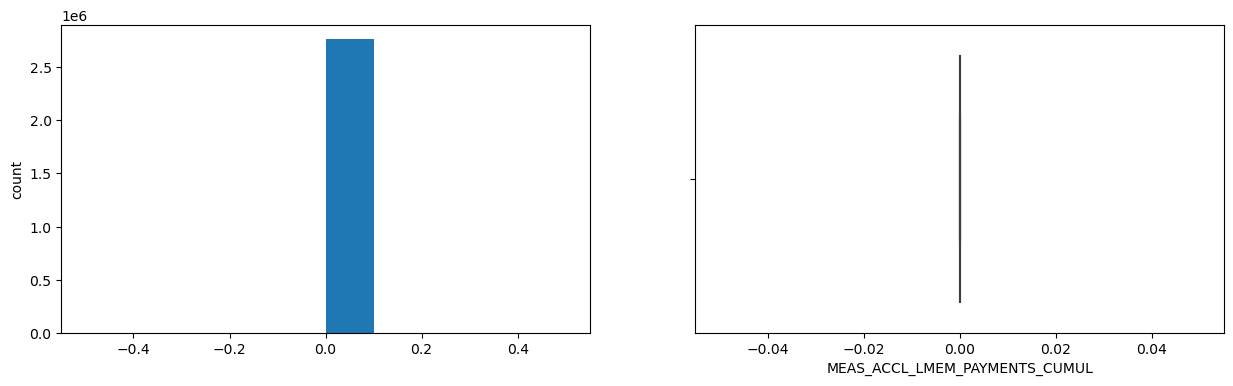

MEAS_ACCL_AMT_PAYMENTS_TOTAL
Skew : 108.99


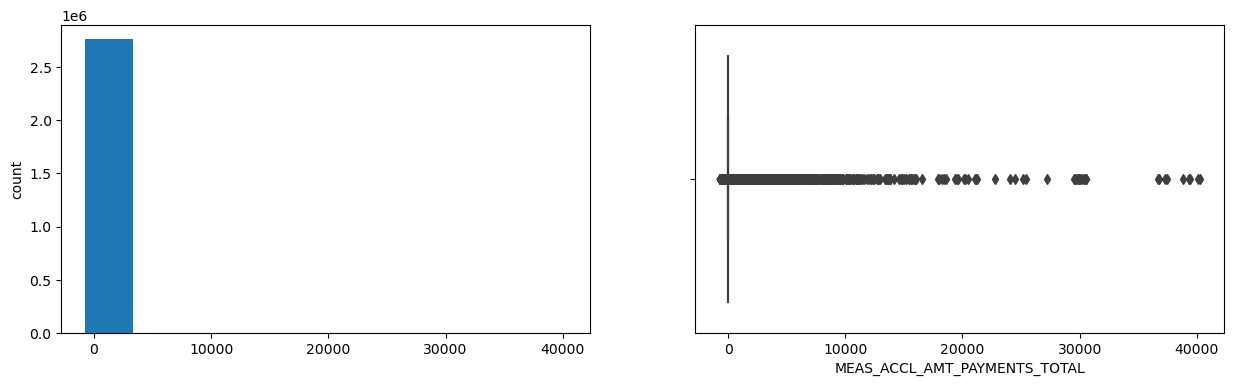

MEAS_ACCL_AMT_OVERPAYMENT_ADDITIONAL
Skew : 0


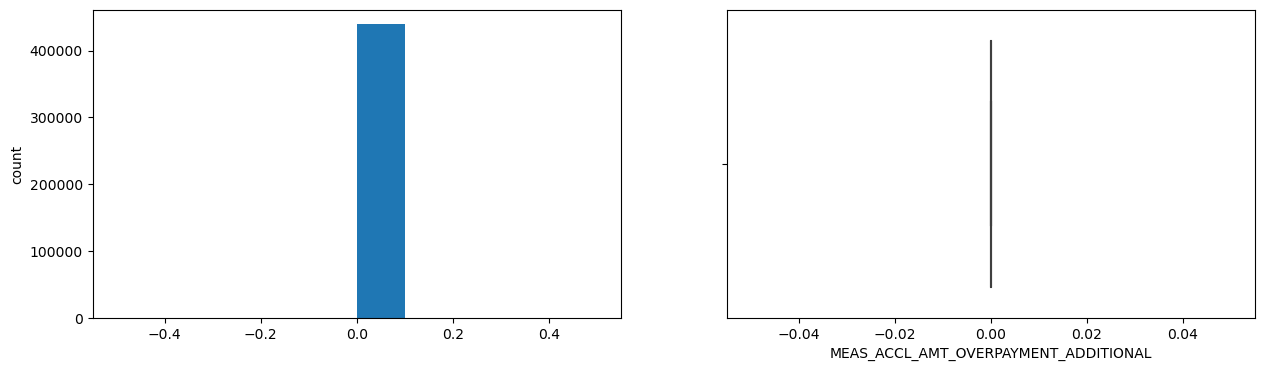

MEAS_ACCL_AMT_PAYMENT_YTD
Skew : 128.27


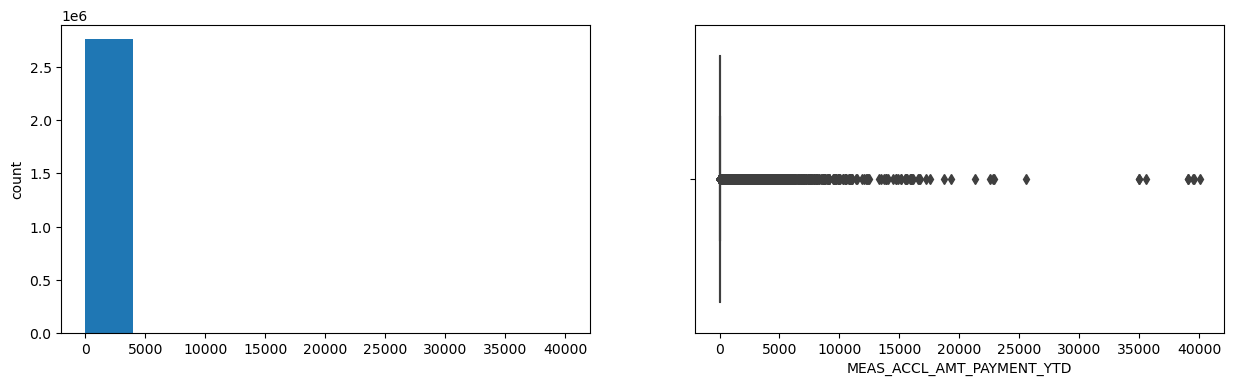

MEAS_ACCH_AMT_PASTDUE
Skew : 8.29


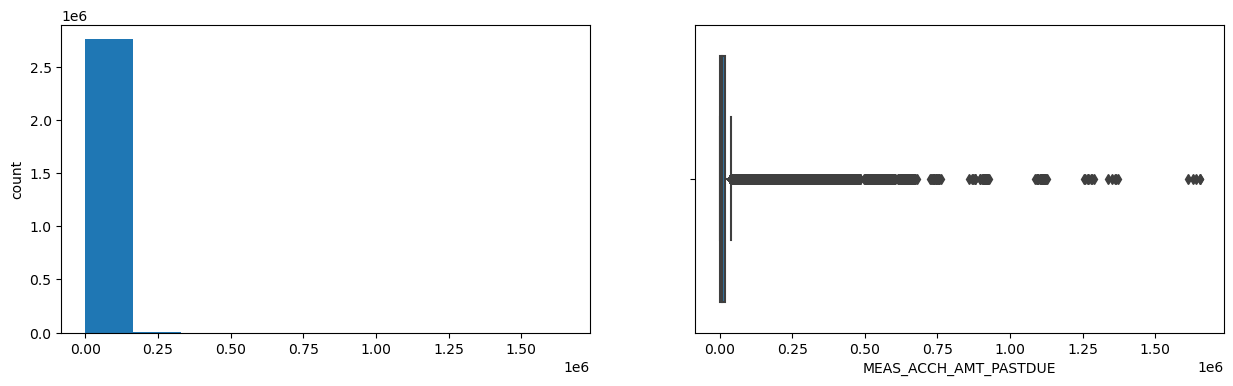

MEAS_ACCL_AMT_DENOUNCED
Skew : 21.93


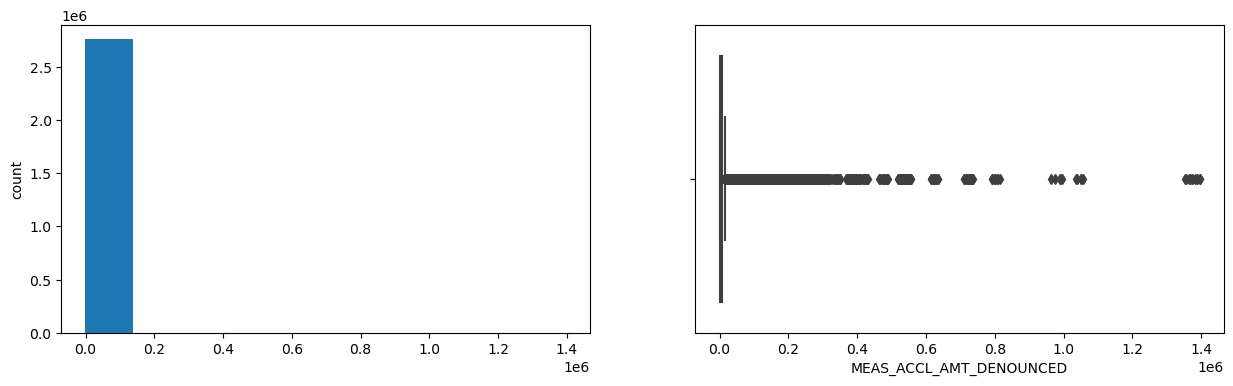

MEAS_ACCL_AMT_DUE_NBG
Skew : 8.29


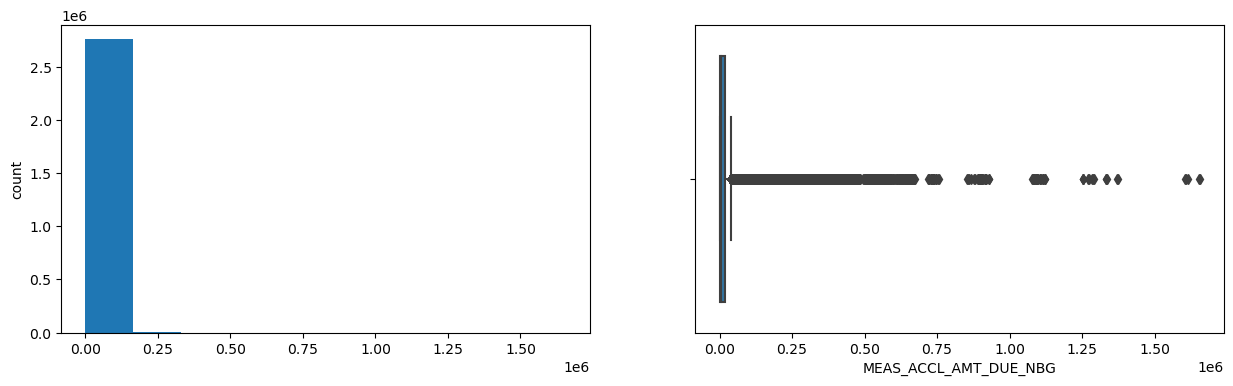

MEAS_ACCL_AMT_PAYMENT_REMAINING
Skew : 128.79


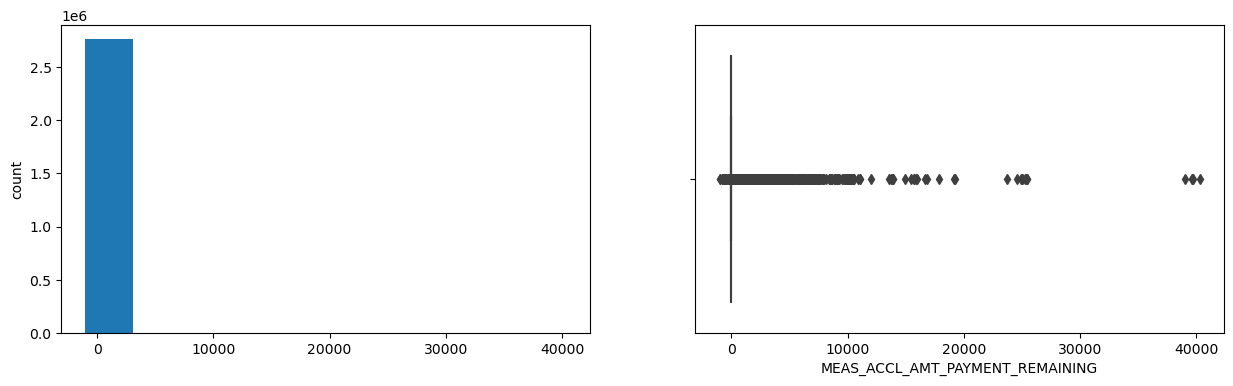

MEAS_ACCH_AMT_BAL_ACCOUNTING
Skew : 11.73


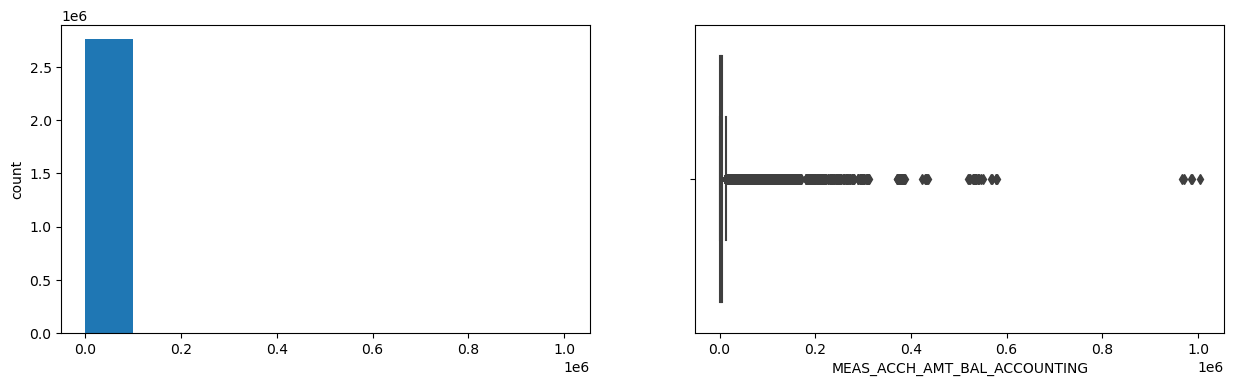

MEAS_ACCL_AMT_ORIG_EXPENSES
Skew : 15.17


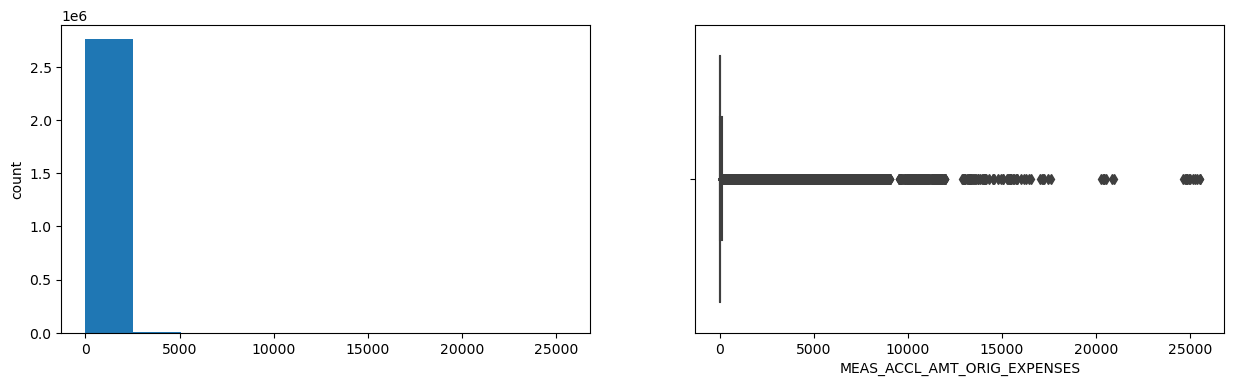

MEAS_ACCL_AMT_ORIG_INTEREST_OFFBALANCE
Skew : 9.13


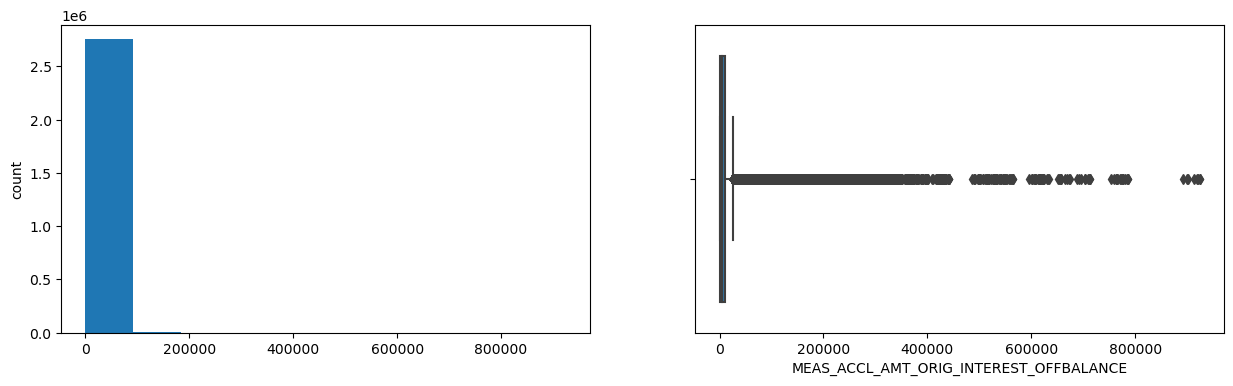

MEAS_ACCL_AMT_ORIG_INTEREST_ONBALANCE
Skew : 27.62


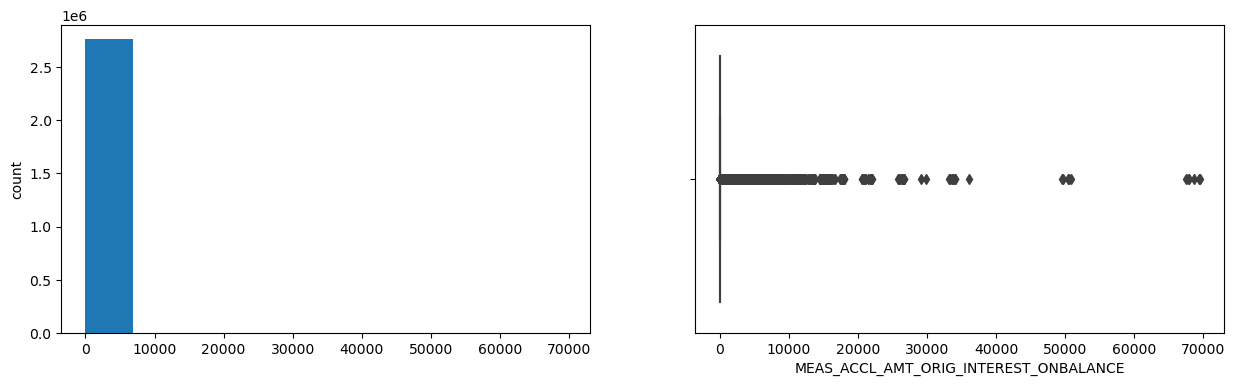

MEAS_ACCL_AMT_ORIG_PRINCIPAL
Skew : 12.28


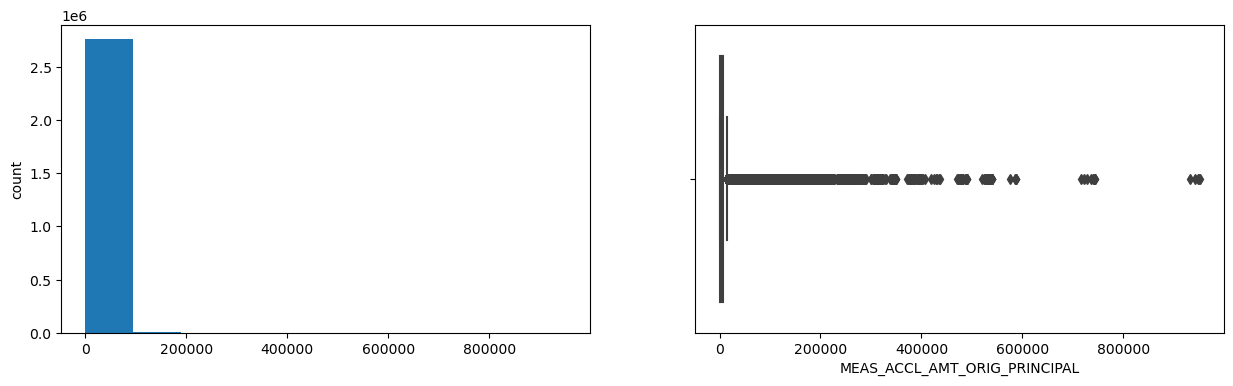

MEAS_ACCL_AMT_ORIG_CLAIM_PNI
Skew : 34.34


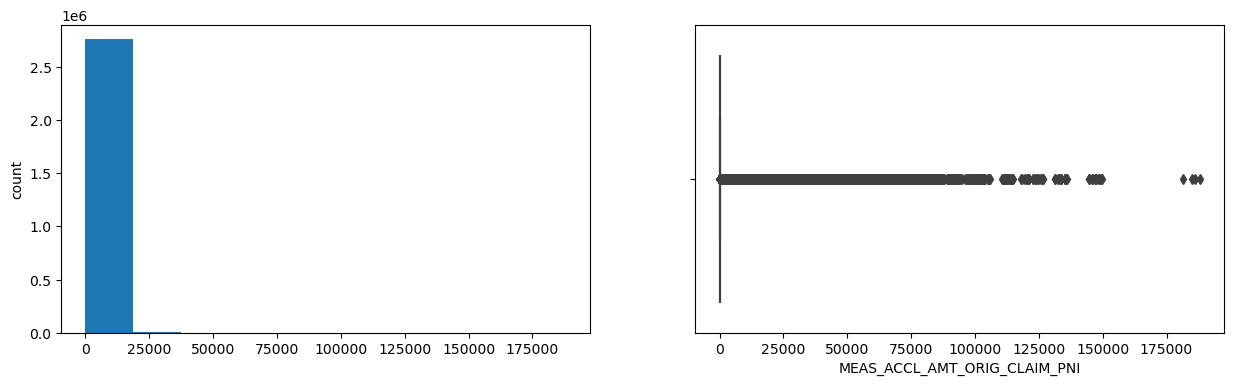

MEAS_ACCL_AMT_OVERPAYMENT
Skew : -646.21


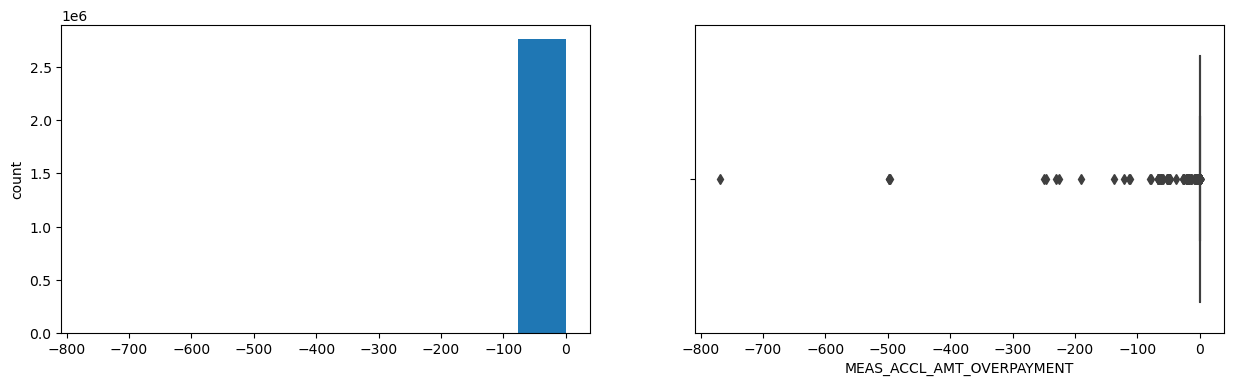

MEAS_ACCH_AMT_EXPENSES
Skew : 15.16


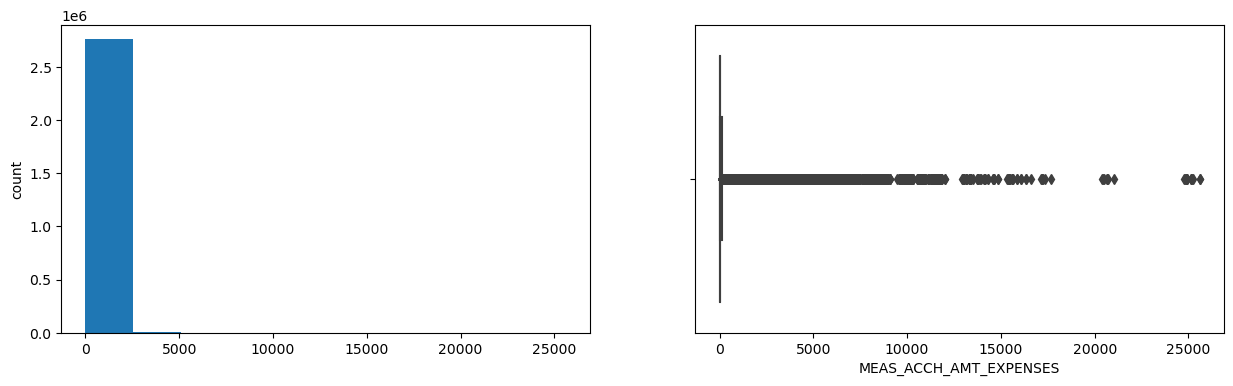

MEAS_ACCL_AMT_INTEREST_OFFBALANCE
Skew : 9.02


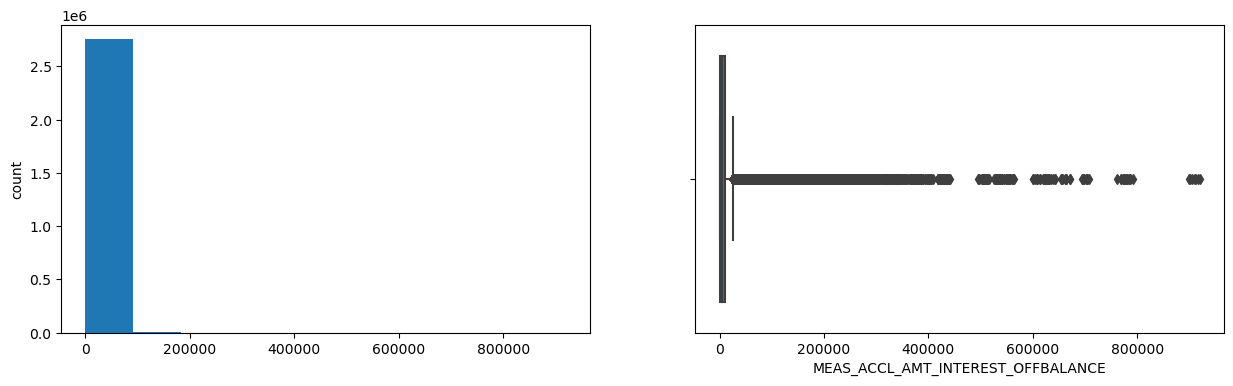

MEAS_ACCL_AMT_INTEREST_ONBALANCE
Skew : 27.94


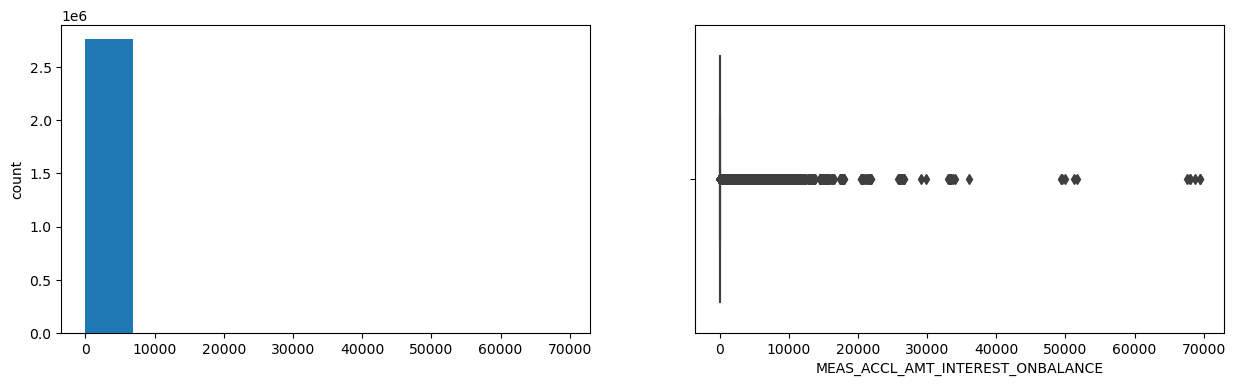

MEAS_ACCH_AMT_PRINCIPAL
Skew : 12.23


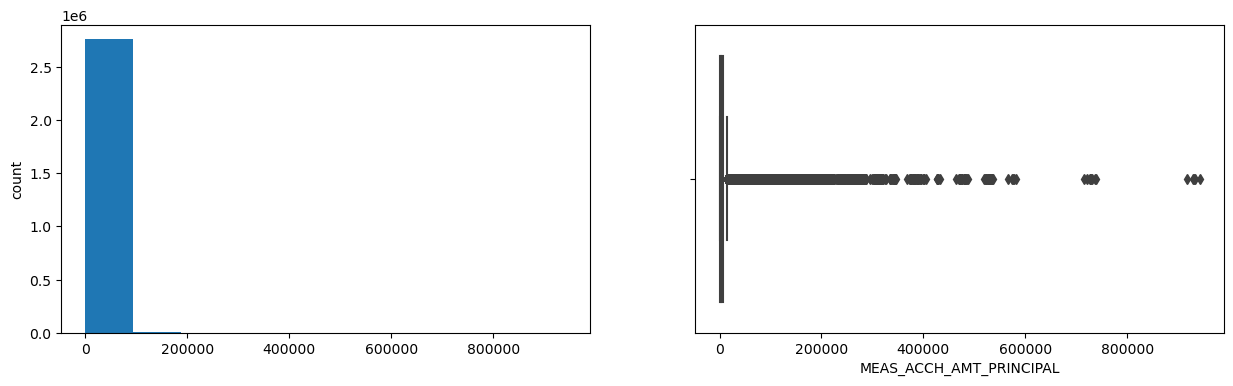

MEAS_ACCL_AMT_CLAIM_PNI
Skew : 36.24


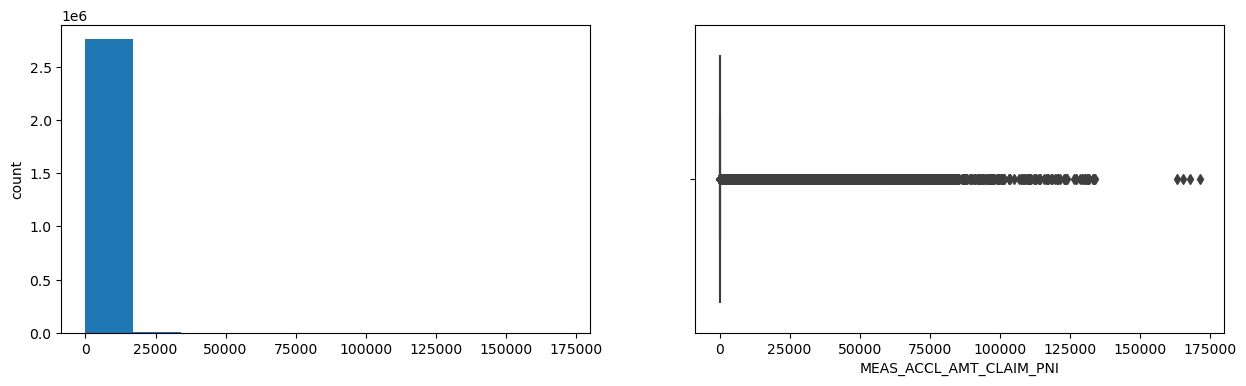

MEAS_ACCL_AMT_CLAIM_G3
Skew : 0


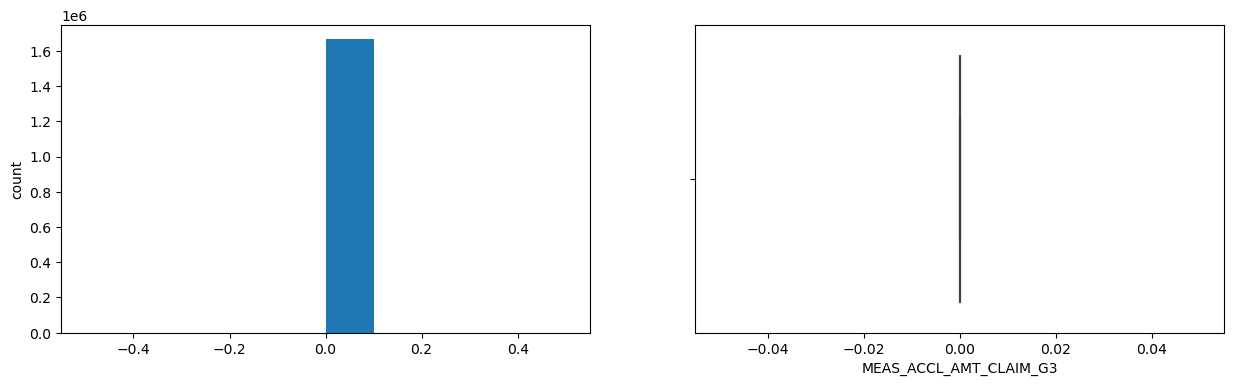

MEAS_ACCL_DUE_PRINCIPAL
Skew : 11.97


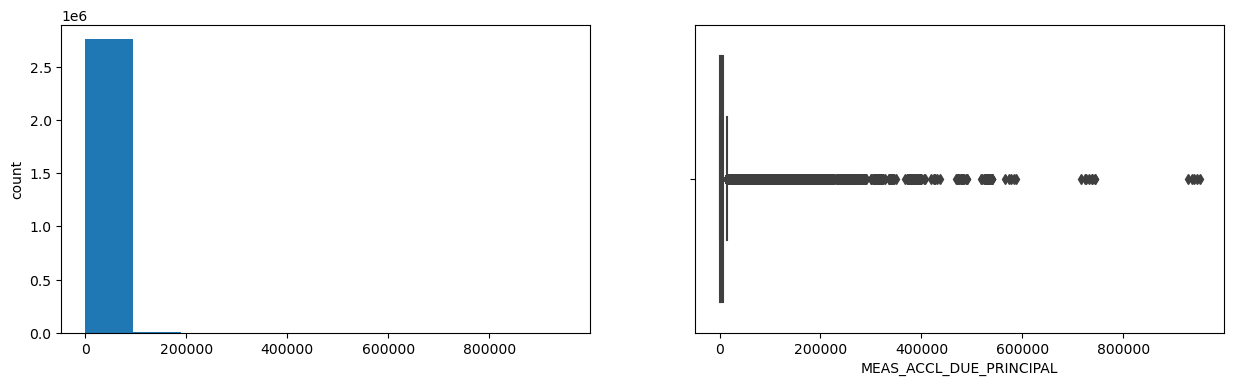

MEAS_ACCL_AMT_CLAIM_G4
Skew : 0


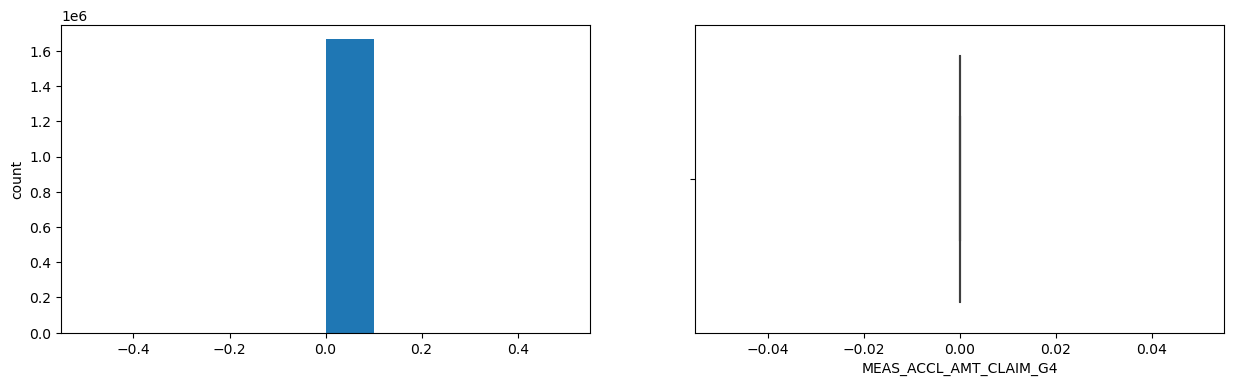

MEAS_ACCL_AMT_PRINCIPAL_TOTAL
Skew : 11.95


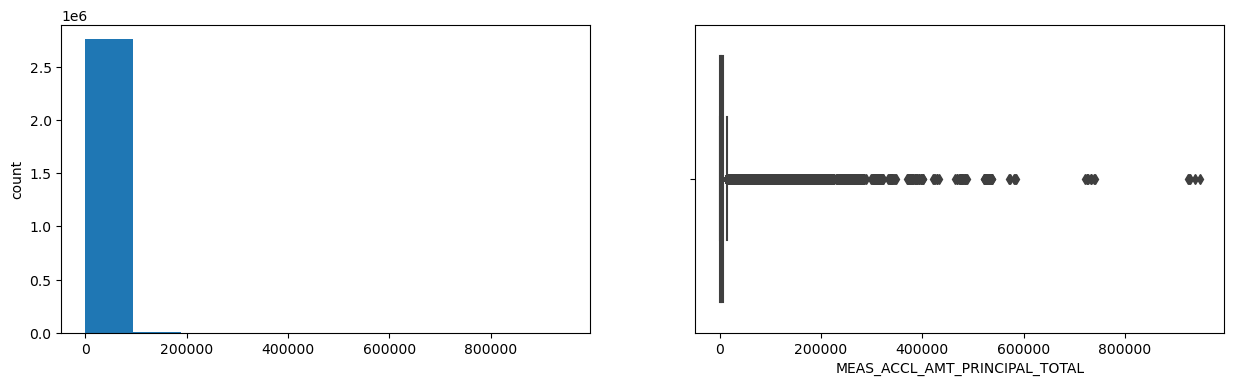

MEAS_ACCL_AMT_GBV
Skew : 11.95


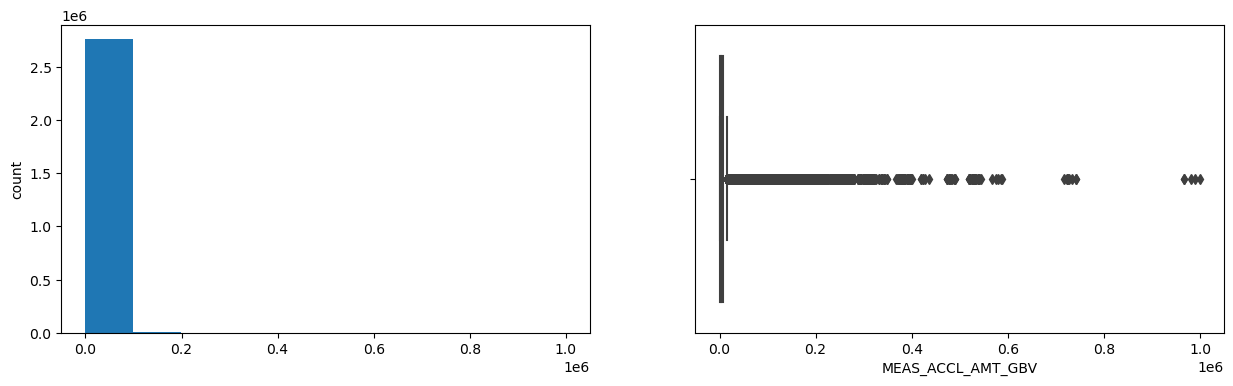

MEAS_ACCH_AMT_LIMIT
Skew : 17.39


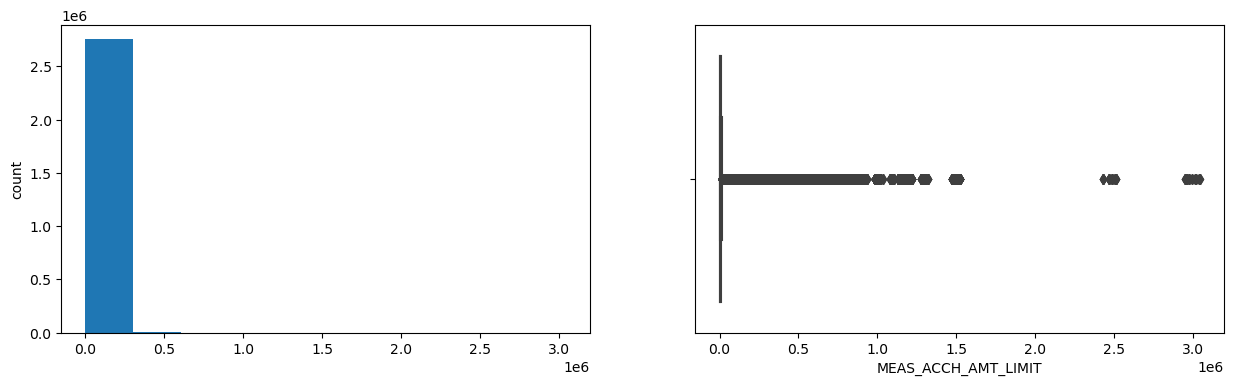

MEAS_ACCL_DEFAULT_BALANCE
Skew : 21.52


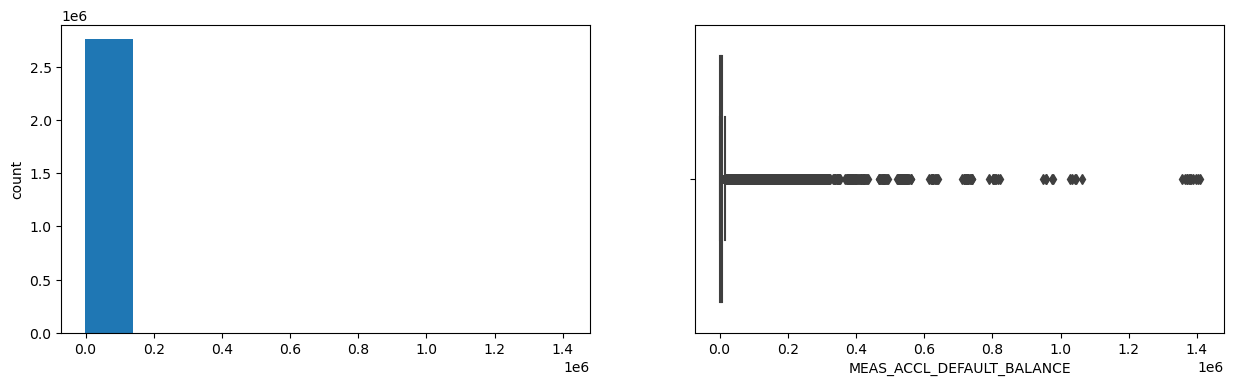

MEAS_ACCH_AMT_ARREARS
Skew : 8.26


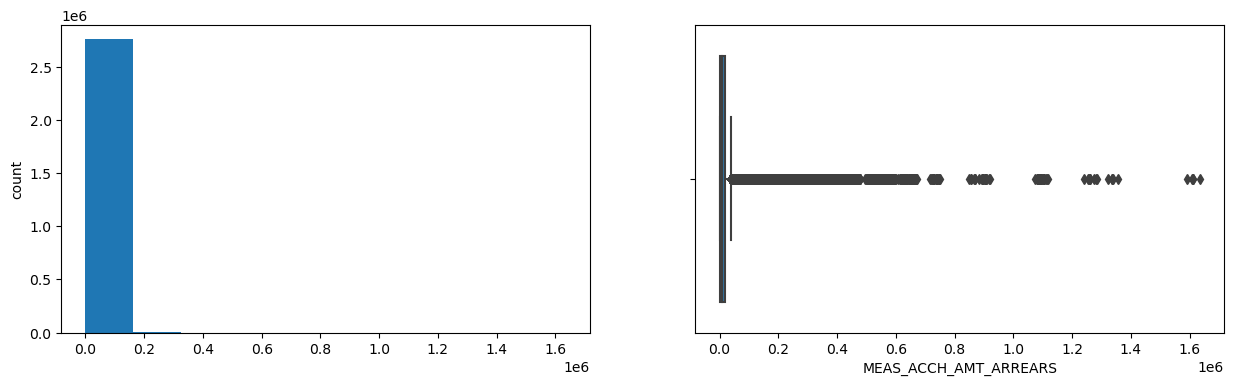

MEAS_ACCL_LATE_INTEREST
Skew : 15.17


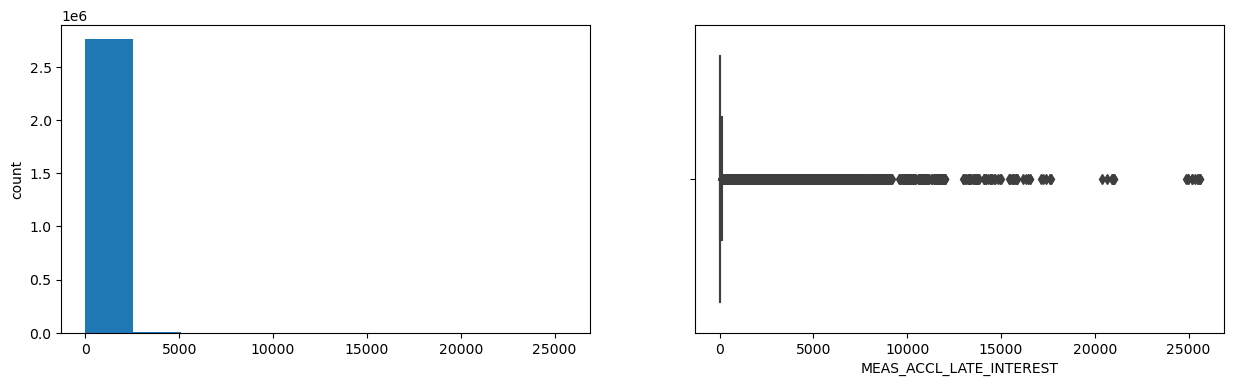

MEAS_ACCL_INTEREST
Skew : 28.06


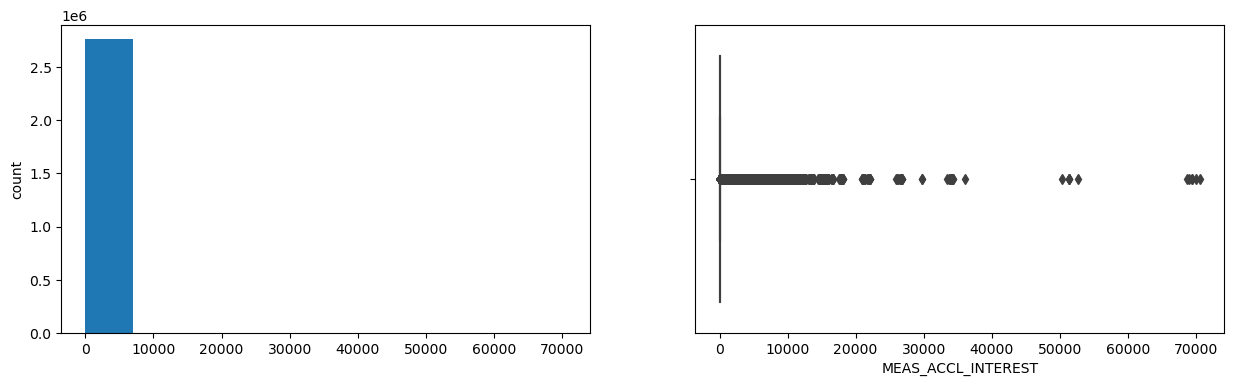

MEAS_ACCH_AMT_MINPAYMENT
Skew : 116.58


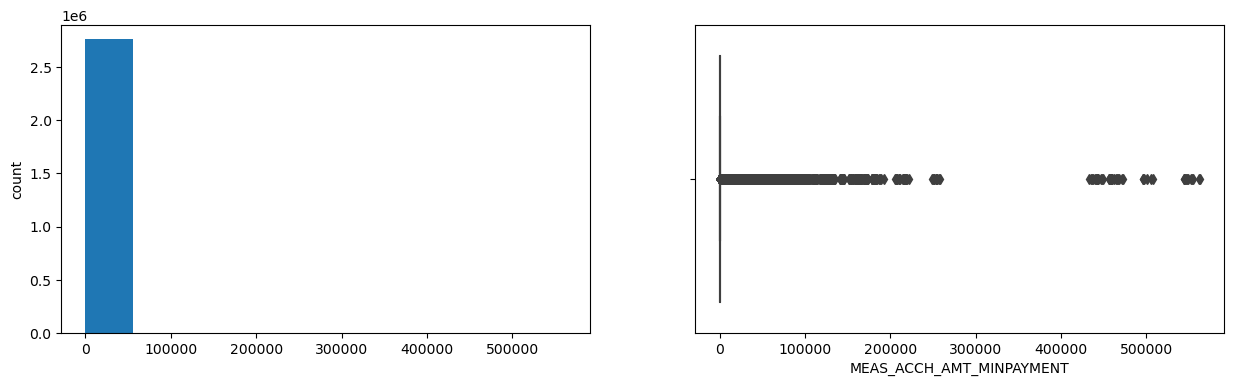

MEAS_ACCH_AMT_BALANCE
Skew : 8.25


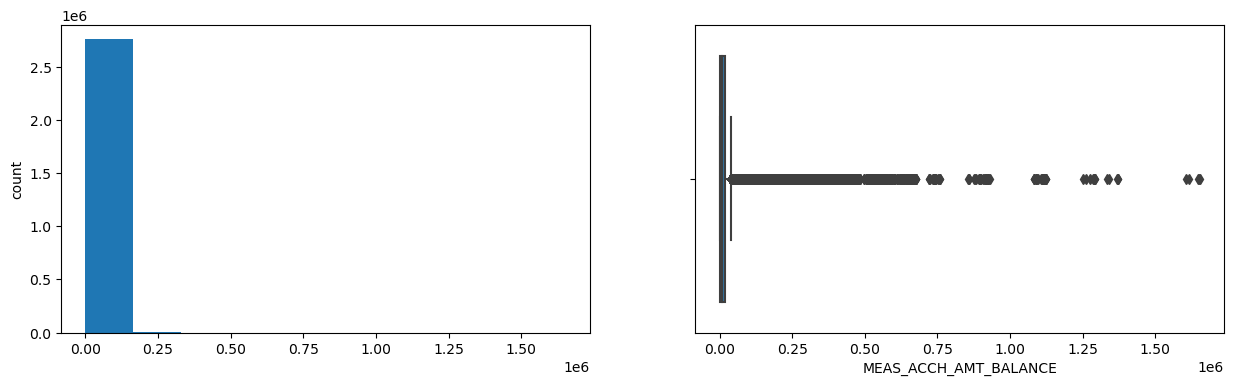

MEAS_ACCL_PURCHASE_BALANCE
Skew : 8.27


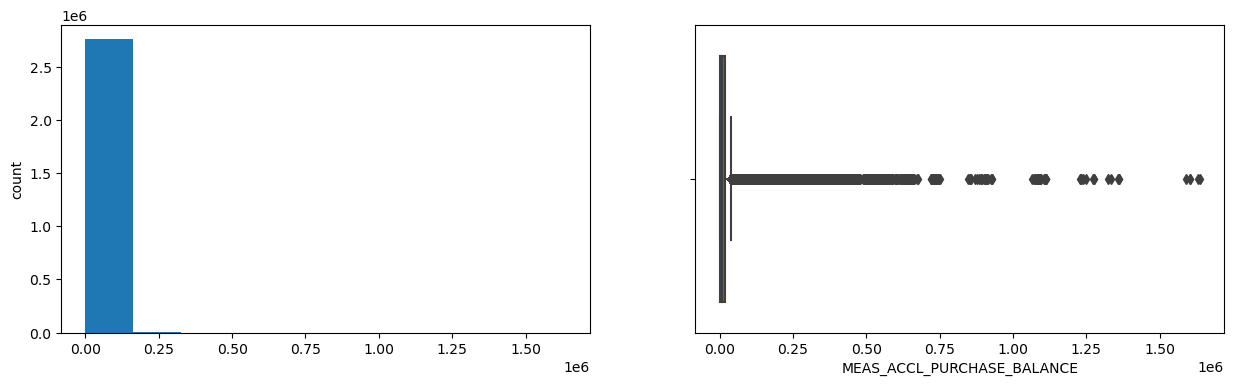

MEAS_ACCH_AMT_WRITEOFF
Skew : 8.76


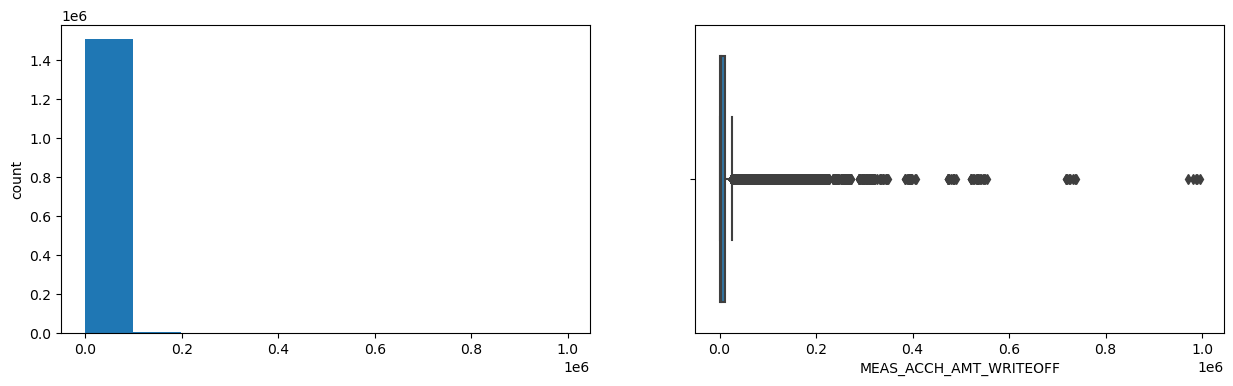

MEAS_ACCH_AMT_PAYMENT_LAST
Skew : 172.53


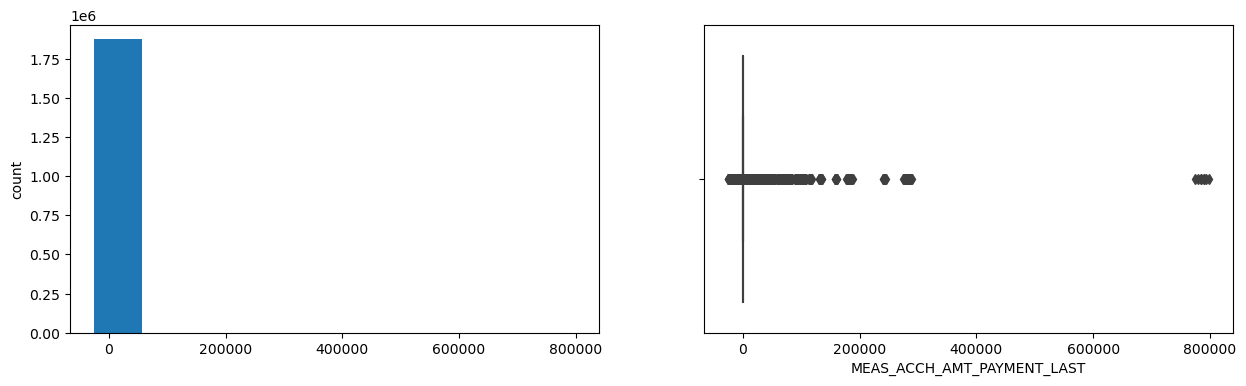

MEAS_ACCL_COLLATERALS_VALUE
Skew : 13.96


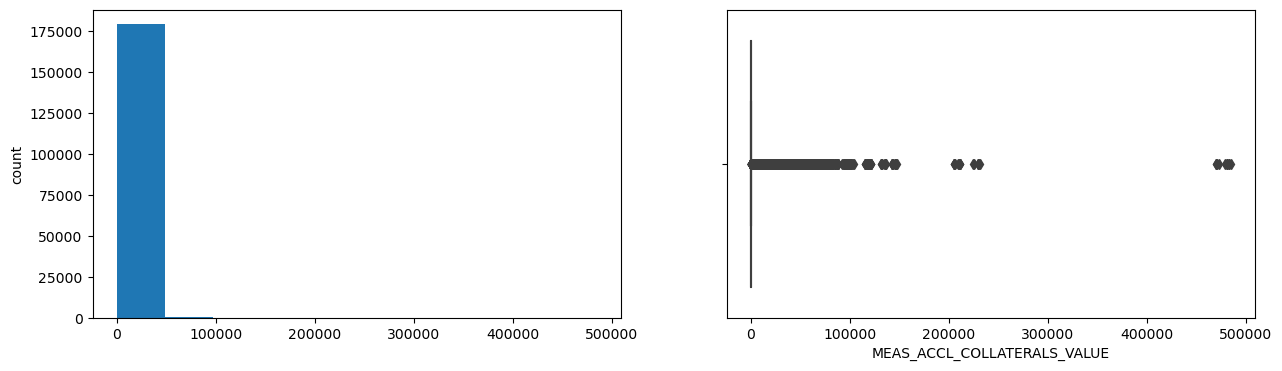

MEAS_ACCL_COLLA_MARKET_VALUE
Skew : 32.37


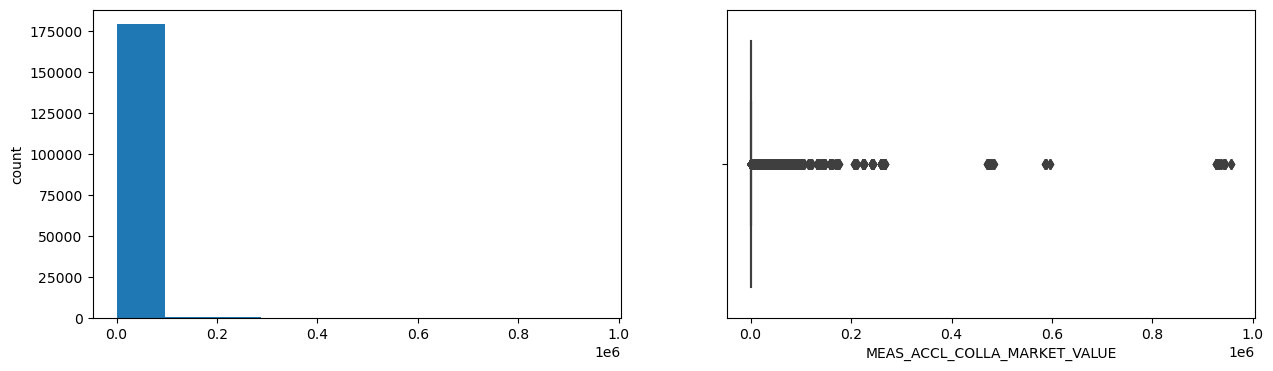

MEAS_ACCL_AMT_BAL_ACCOUNTING_RR
Skew : 11.91


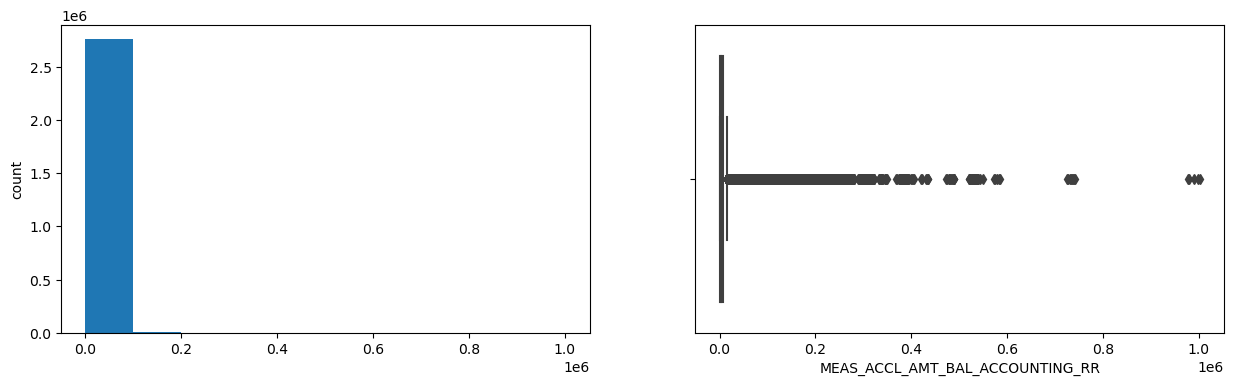

MEAS_ACCL_COLLATERAL_OR_RE_MARKET_VALUE
Skew : 6.07


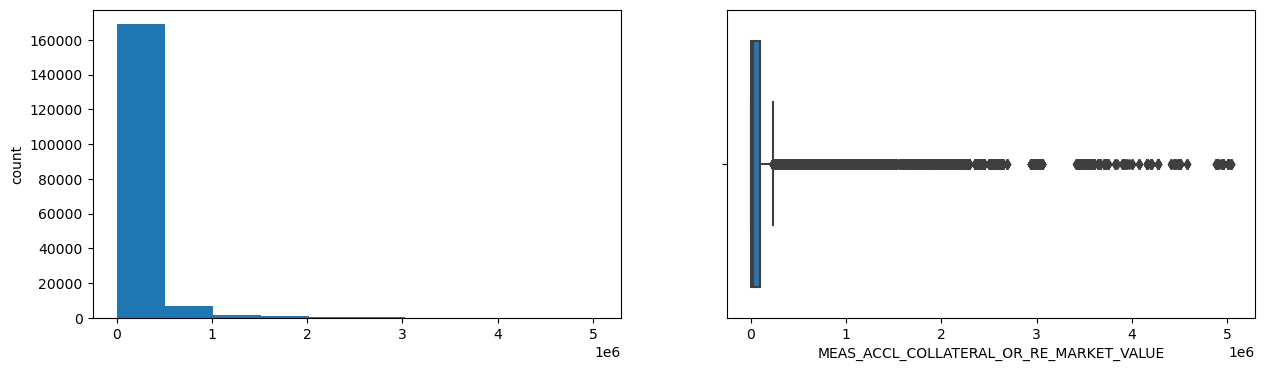

MEAS_ACCL_EED_GUARANTEED_AMOUNT
Skew : 0


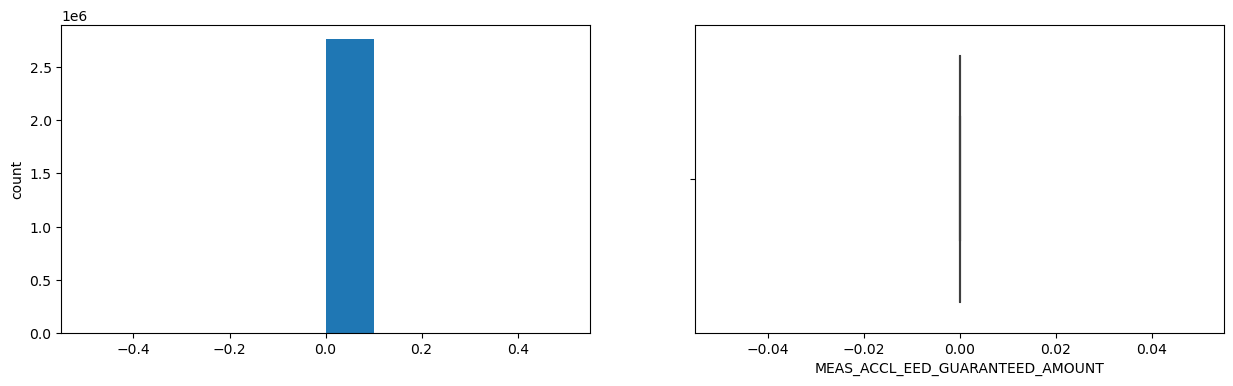

Target
Skew : 22.76


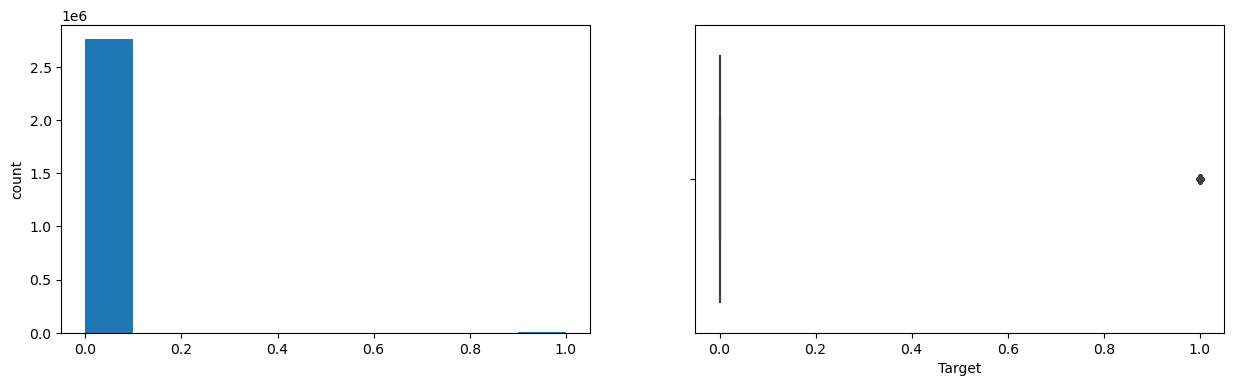

IDcus
Skew : -0.05


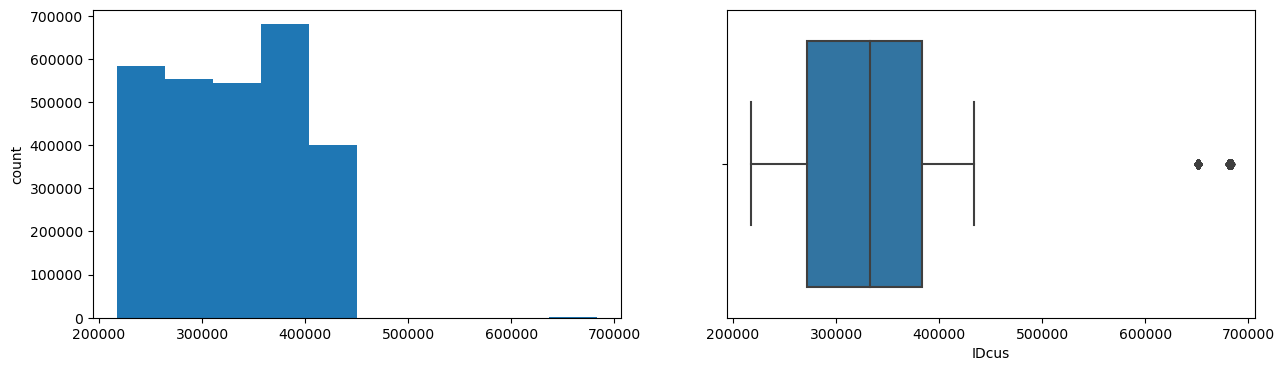

SNAPNUMcus
Skew : -0.06


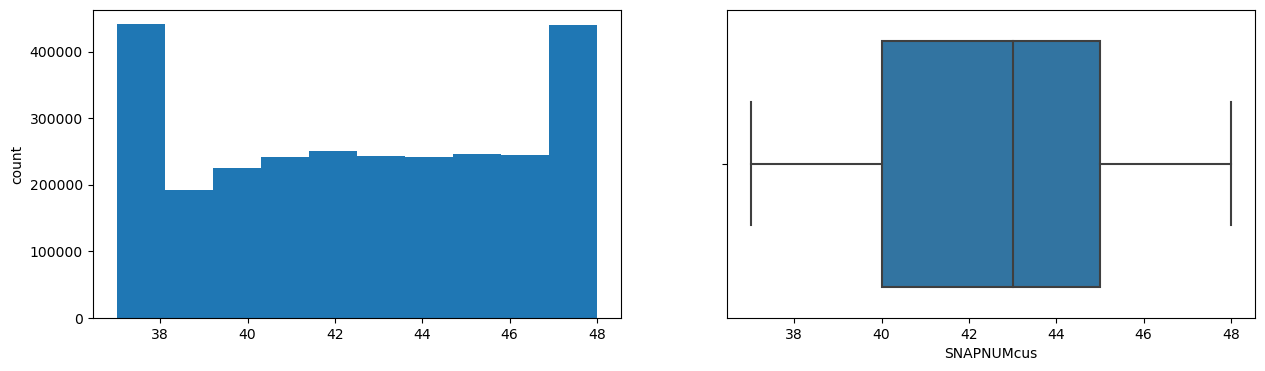

MEAS_CUSL_PHONE_RPC_COUNT
Skew : 13.6


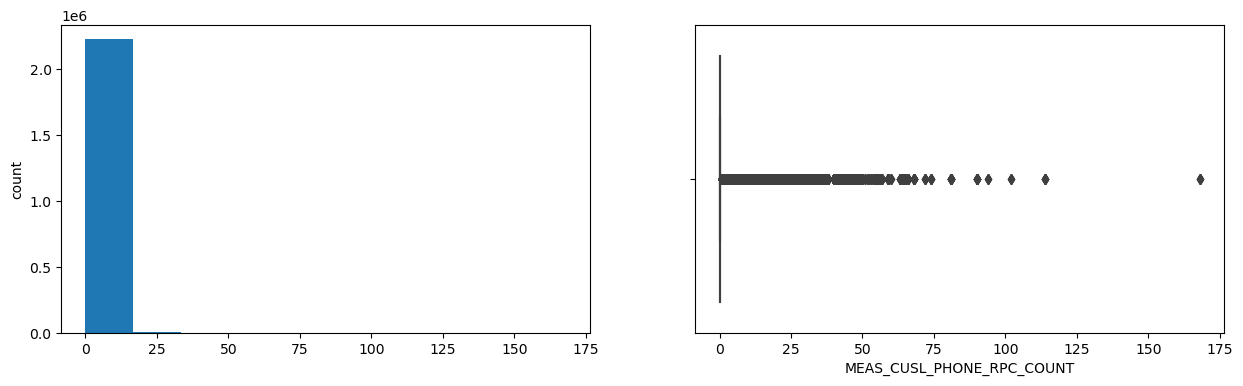

MEAS_CUSL_COUNT_RPC
Skew : 0


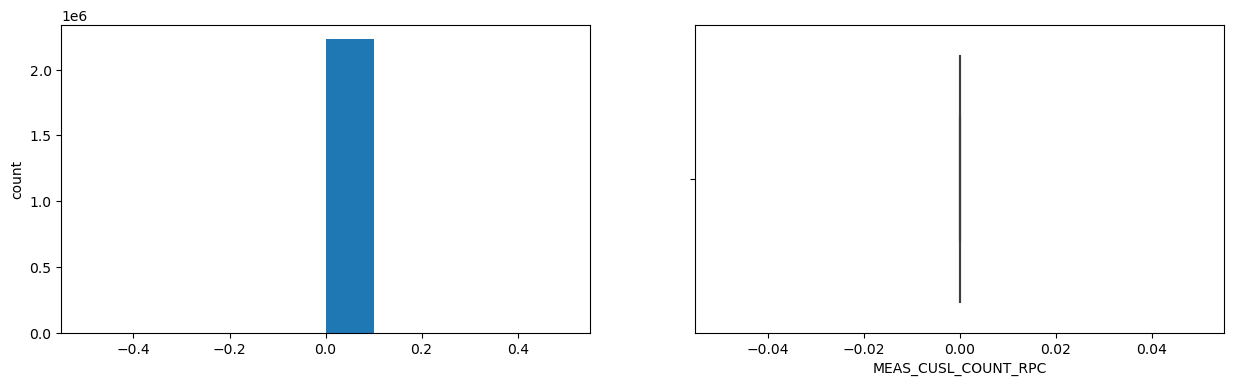

MEAS_CUSL_COUNT_NO_CONTACT
Skew : 11.17


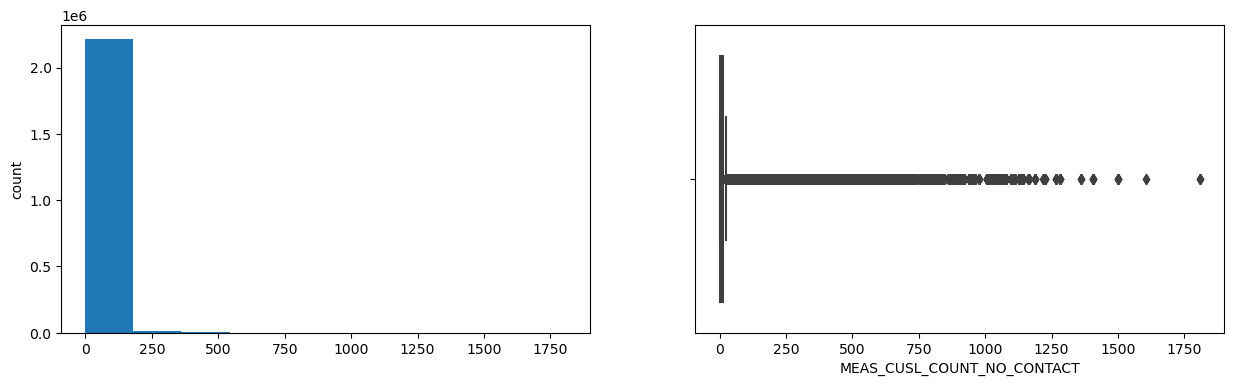

MEAS_CUSL_COUNT_3RD_PARTY
Skew : 30.23


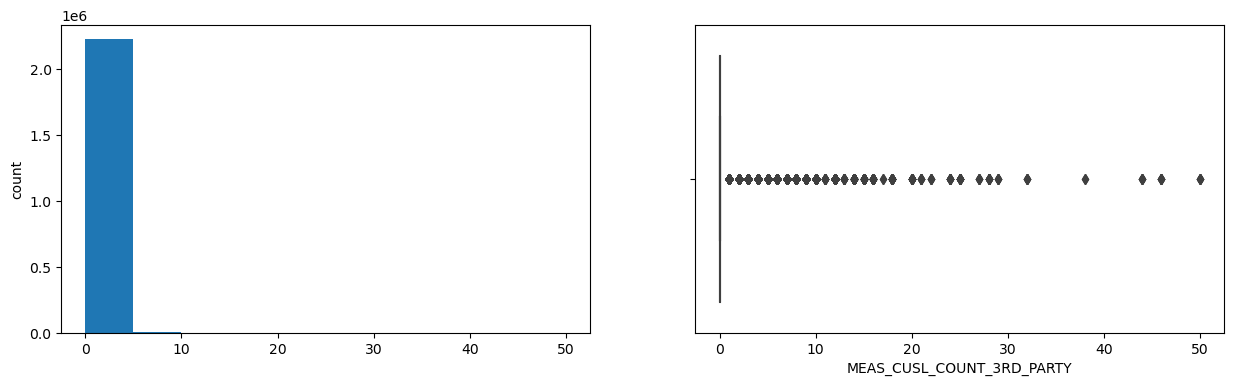

MEAS_CUSL_DIALLER_ATTEMPTS_COUNT
Skew : 0


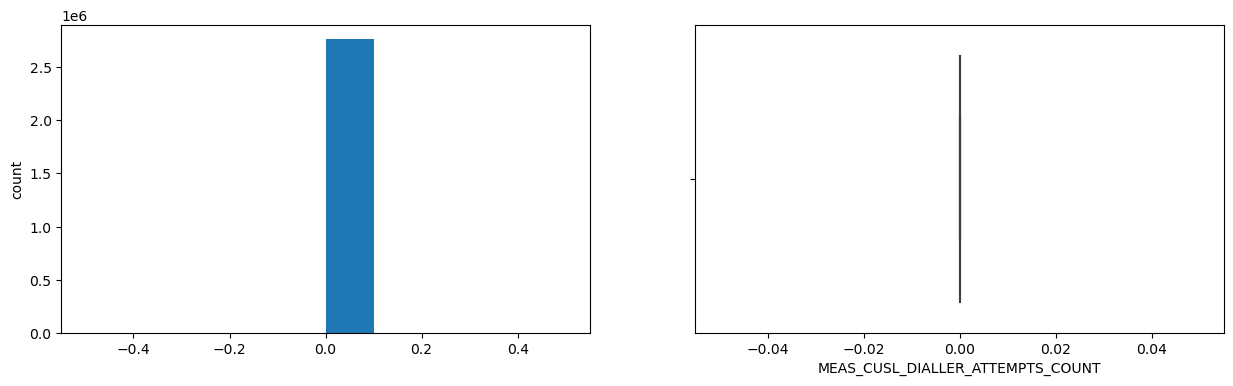

MEAS_CUSL_HAS_ACTIVE_ARRANGEMENT
Skew : 19.18


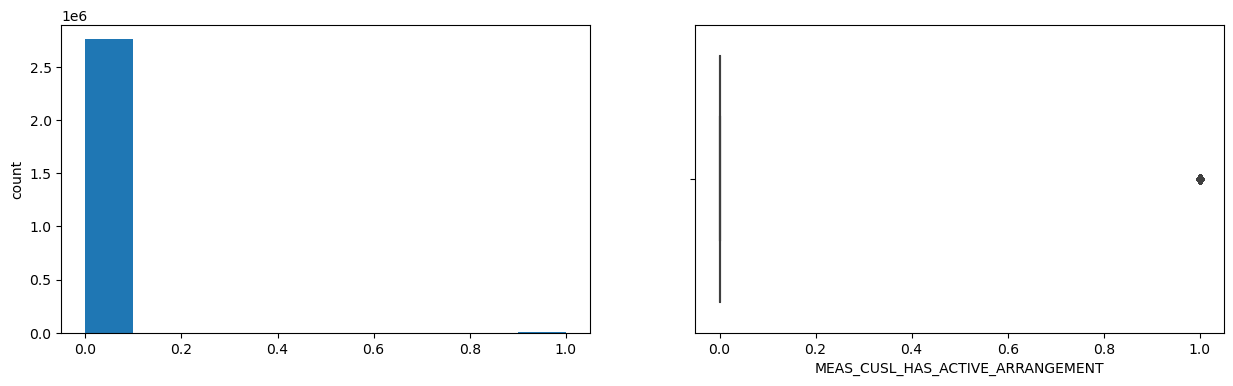

MEAS_CUSL_HAS_PAYMENT
Skew : -2.12


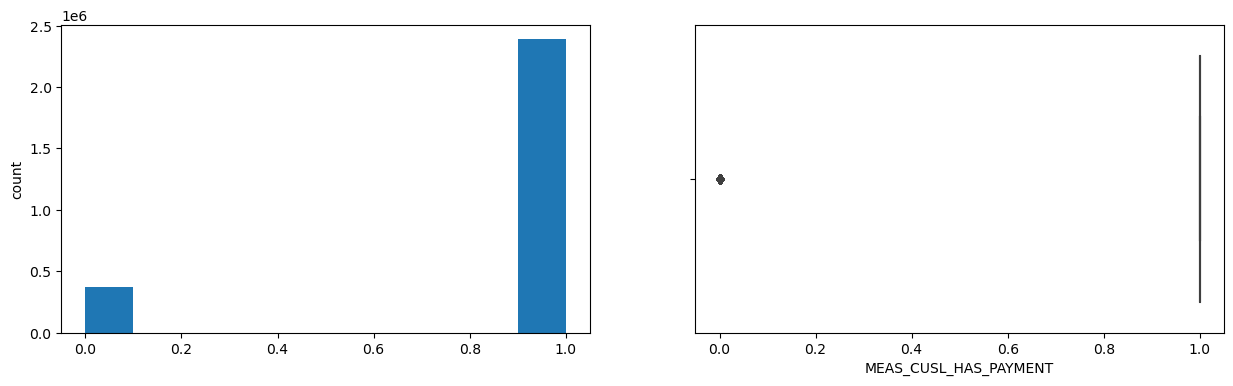

MEAS_CUSH_COUNT_PHONES
Skew : 4.52


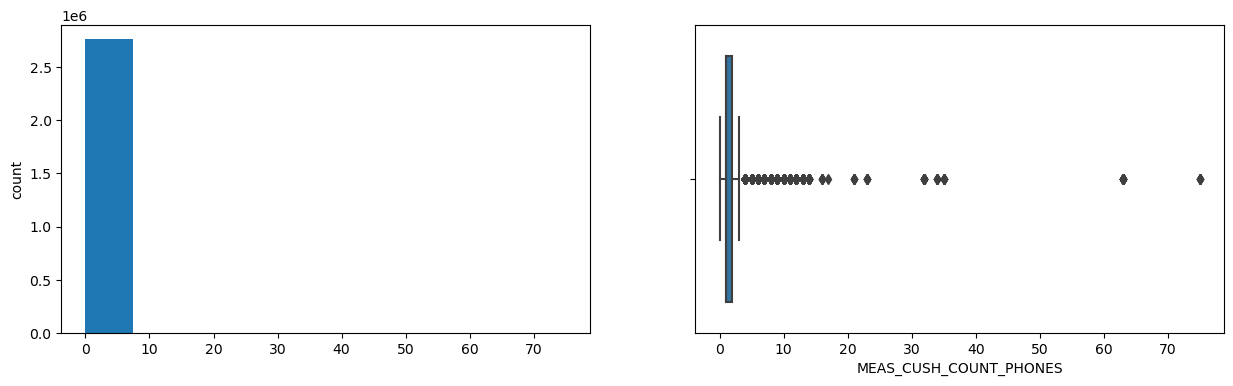

MEAS_CUSL_COLLECTION_CASES_NUM
Skew : 1.93


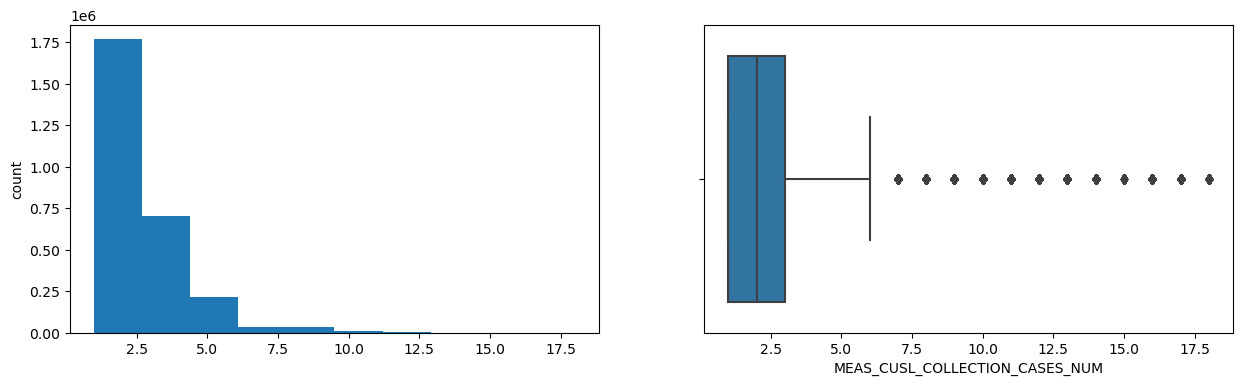

MEAS_CUSL_HAS_RESTRUCTURING_APPLICATION
Skew : 0


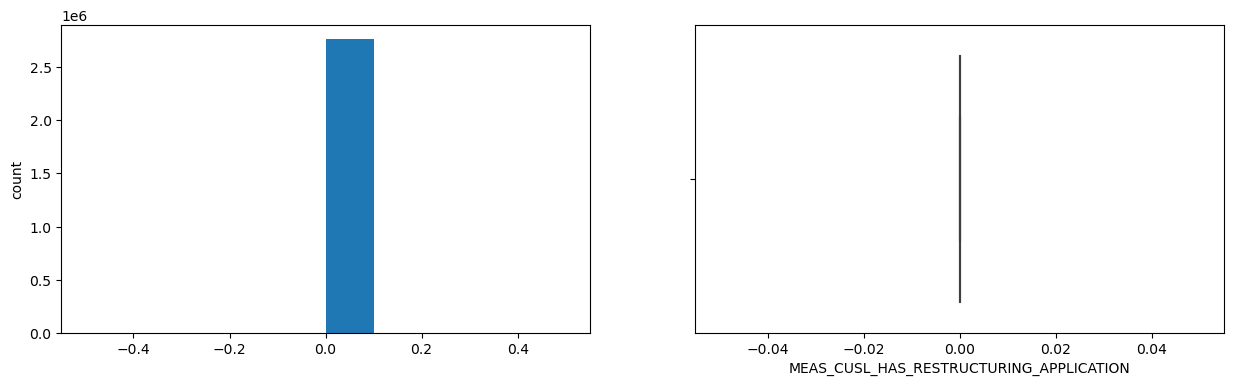

MEAS_CUSH_OWNER_HOME
Skew : 0


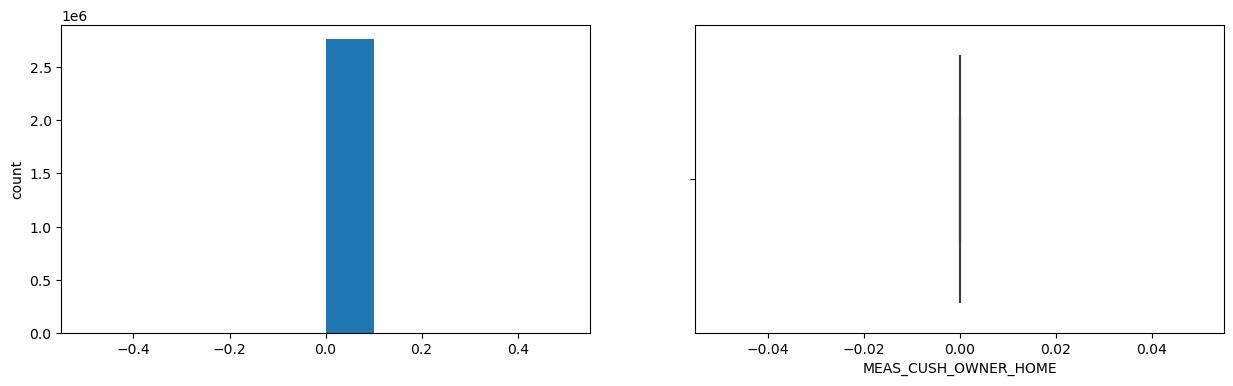

MEAS_CUSL_IS_CO_OWNER
Skew : 23.27


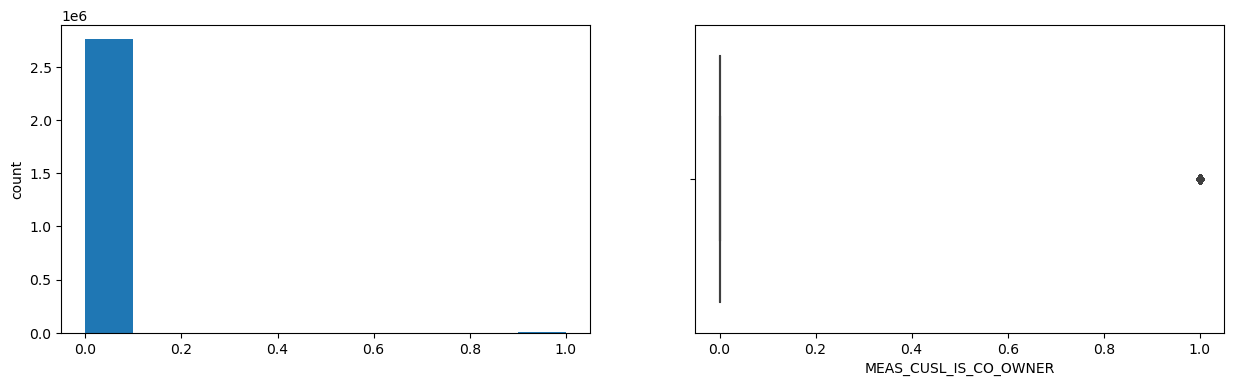

MEAS_CUSL_IS_GUARANTOR
Skew : 7.93


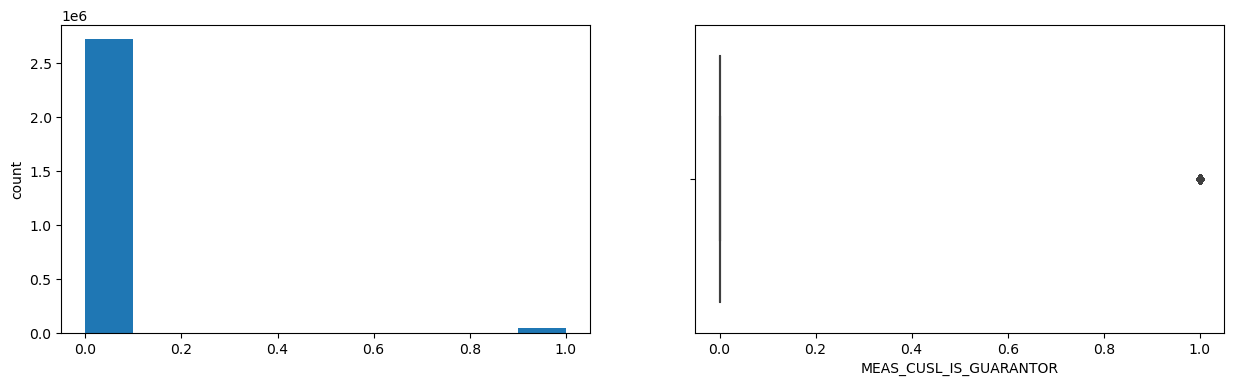

MEAS_CUSL_IS_PRIMARY_OWNER
Skew : 0


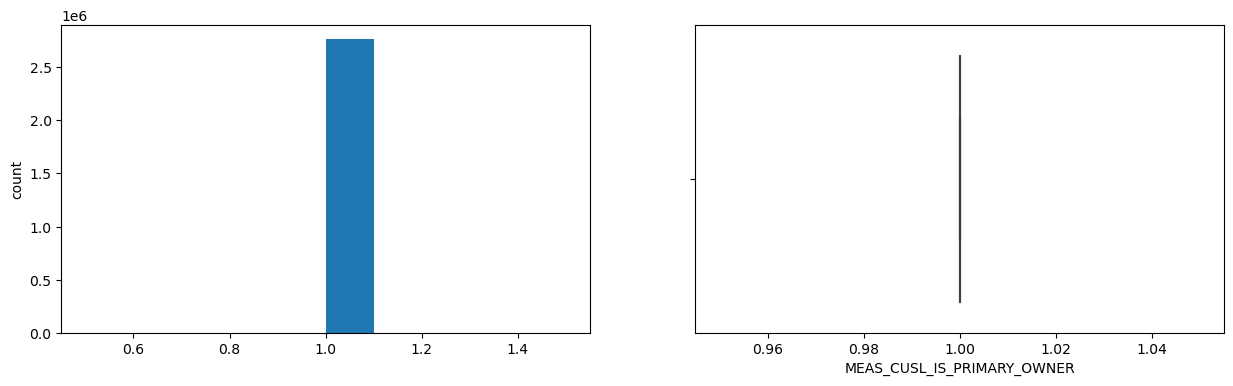

MEAS_CUSL_COLLECTION_CASES_NUM_PRIMARY_OWNER
Skew : 1.93


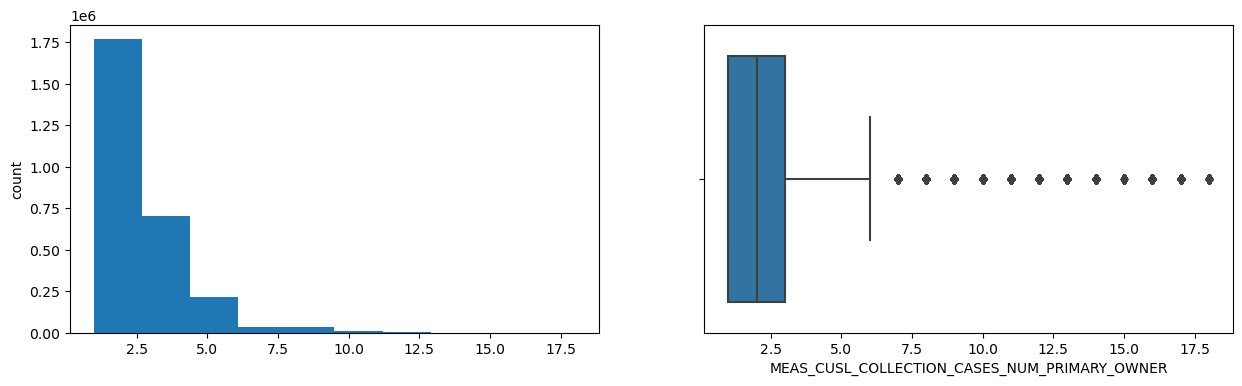

MEAS_CUSL_TOTAL_ACCOUNTS
Skew : 1.93


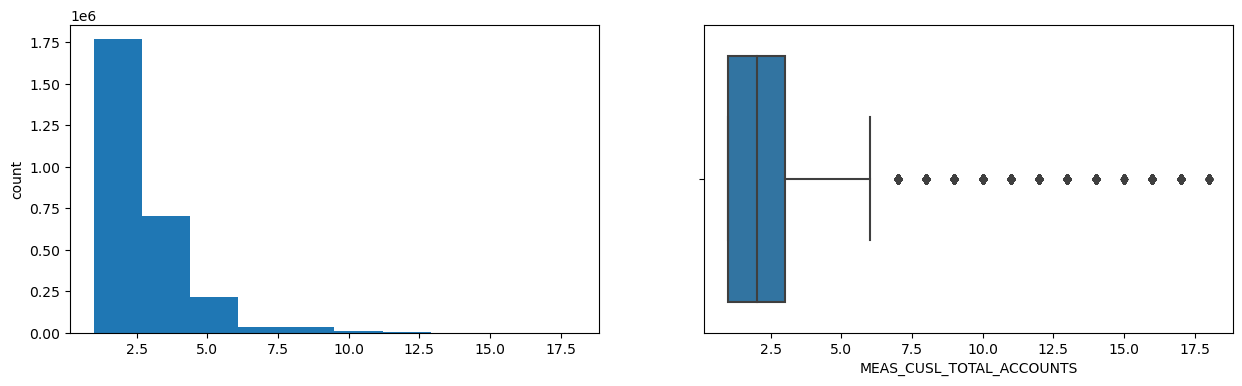

MEAS_CUSL_LAST_PAYMENT_AMOUNT
Skew : 134.63


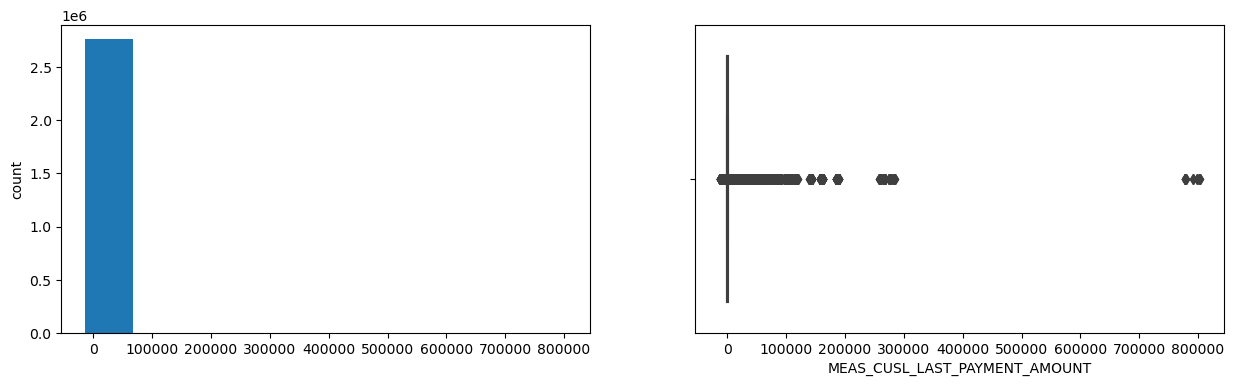

MEAS_CUSL_DEBT_AMOUNT_PRIMARY_OWNER
Skew : 6.02


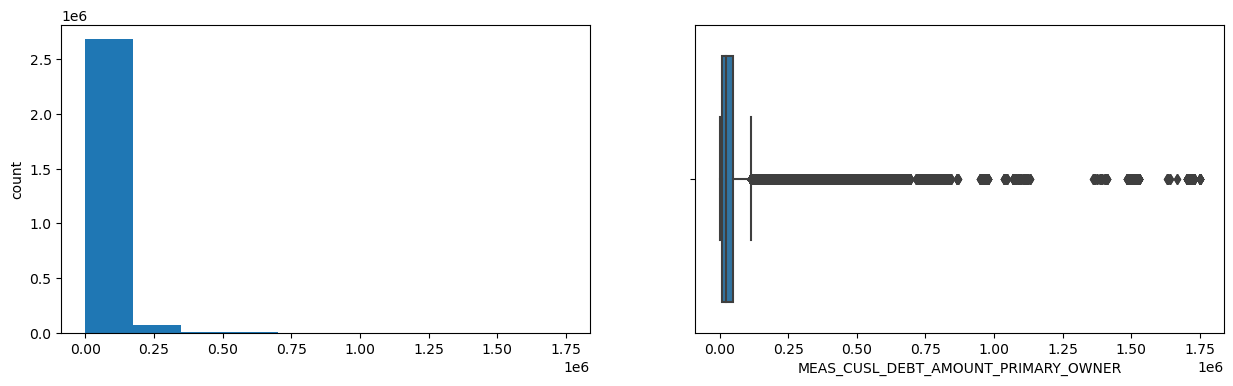

MEAS_CUSL_TOTAL_OUTSTANDING_AMOUNT
Skew : 6.04


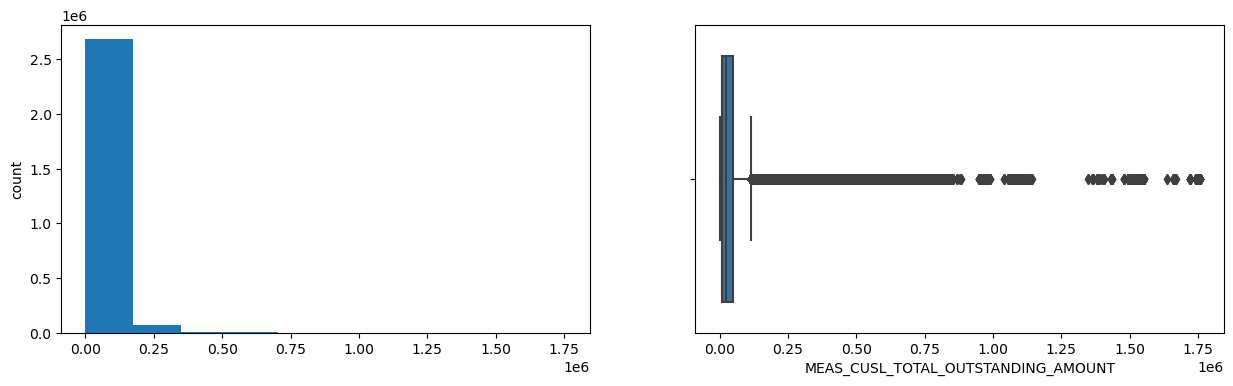

MEAS_CUSL_DEBT_AMOUNT
Skew : 6.02


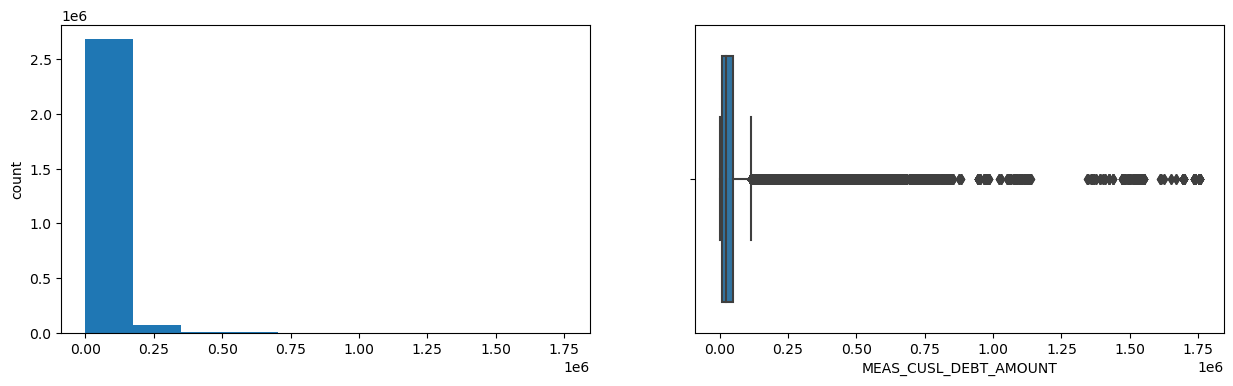

MEAS_CUSL_ACCOUNTING_BALANCE
Skew : 5.39


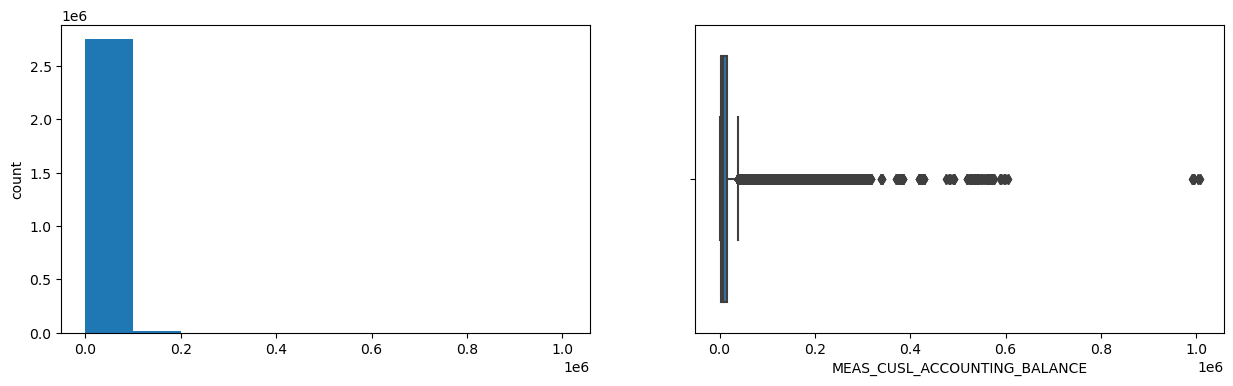

MEAS_CUSL_BALANCE
Skew : 6.03


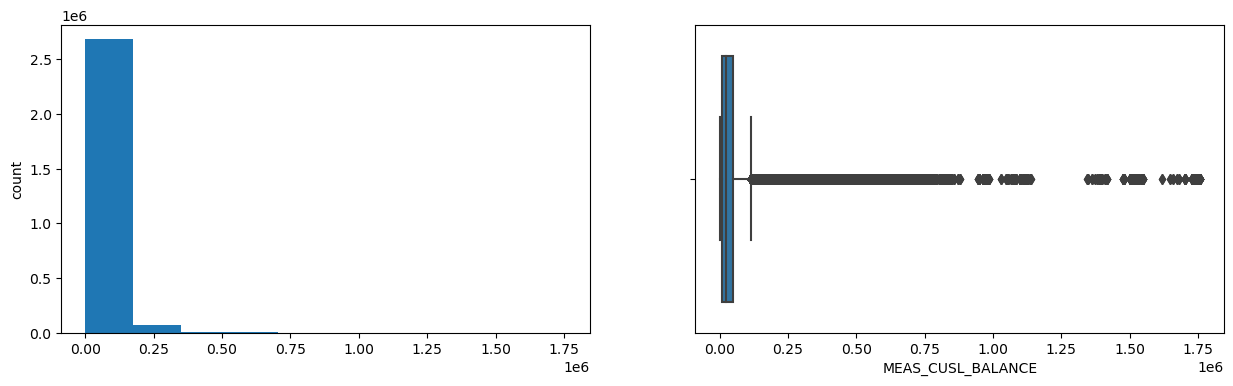

MEAS_CUSL_BALANCE_PRIMARY_OWNER
Skew : 6.03


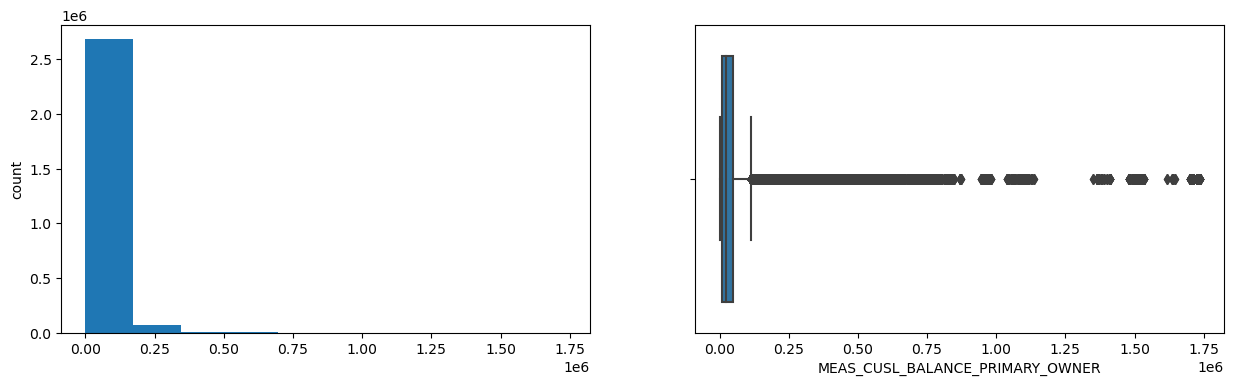

In [27]:
for col in numer:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()    

In [28]:
df.isnull().sum()

IDacc                                                 0
SNAPNUMacc                                            0
MEAS_ACCH_ORIGINATOR                            2324092
MEAS_ACCL_STRAY_PAYMENT_AMT                     2079554
MEAS_ACCL_APLL_IS_NEW                                 0
MEAS_ACCL_APLL_FORBORNE                         2324092
MEAS_ACCL_APPL_TYPE                                   0
MEAS_ACCL_PAID_IN_FULL_CM                             0
MEAS_ACCL_APPLICATION_SUCCESSFUL                      0
MEAS_ACCL_UNDERWRITING_SEGMENT                        0
MEAS_ACCL_PROMISE_ACCOUNTS                       559585
MEAS_ACCL_PROMISE_ACCOUNT                             0
MEAS_ACCL_KEPT_ACCOUNT                           559585
MEAS_ACCL_KEPT_PROMISE                           559585
MEAS_ACCL_NUM_OF_PROMISES                        559585
MEAS_ACCL_HAS_ARRANGEMENT_FLAG                        0
MEAS_ACCL_BROKEN_SETTLEMENT_INDICATOR_CP              0
MEAS_ACAG_DATE_CONTACT_LAST                     

In [29]:
df[:15]

,IDacc,SNAPNUMacc,MEAS_ACCH_ORIGINATOR,MEAS_ACCL_STRAY_PAYMENT_AMT,MEAS_ACCL_APLL_IS_NEW,MEAS_ACCL_APLL_FORBORNE,MEAS_ACCL_APPL_TYPE,MEAS_ACCL_PAID_IN_FULL_CM,MEAS_ACCL_APPLICATION_SUCCESSFUL,MEAS_ACCL_UNDERWRITING_SEGMENT,...,MEAS_CUSH_DATE_NOMINAL,MEAS_CUSH_STATUS,MEAS_CUSL_HAS_CONTACT_ATTEMPT,MEAS_CUSL_LAST_PAYMENT_AMOUNT,MEAS_CUSL_DEBT_AMOUNT_PRIMARY_OWNER,MEAS_CUSL_TOTAL_OUTSTANDING_AMOUNT,MEAS_CUSL_DEBT_AMOUNT,MEAS_CUSL_ACCOUNTING_BALANCE,MEAS_CUSL_BALANCE,MEAS_CUSL_BALANCE_PRIMARY_OWNER
0,346950,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS3,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,22.41,21151.22,21488.03,21293.88,8160.41,21232.34,21110.67
1,346951,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS2,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,4.35,5348.14,5433.30,5384.21,2120.94,5368.65,5337.89
2,345151,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS1,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,20.37,877.00,890.97,882.92,489.62,880.36,875.32
3,346953,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS4,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,203.70,51949.32,52776.54,52299.70,29560.93,52148.55,51849.72
4,535607,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS4,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,203.70,51949.32,52776.54,52299.70,29560.93,52148.55,51849.72
5,346889,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS2,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,0.07,7885.11,8010.67,7938.29,2771.22,7915.35,7869.99
6,345656,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS3,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,0.01,88481.30,89890.25,89078.08,30114.34,88820.64,88311.67
7,349325,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS1,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,0.01,88481.30,89890.25,89078.08,30114.34,88820.64,88311.67
8,529954,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS4,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,0.01,88481.30,89890.25,89078.08,30114.34,88820.64,88311.67
9,660699,37,NaN,NaN,Yes,NaN,Yes,No,Yes,S2-IN-SS4,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,Yes,0.01,88481.30,89890.25,89078.08,30114.34,88820.64,88311.67


In [30]:
df.to_pickle("FinTech2.pkl")

In [1]:
import pandas as pd
import pickle
import numpy as np 
import warnings                    
warnings.filterwarnings("ignore")

In [2]:
fint=pd.read_pickle("FinTech2.pkl")

In [3]:
fint.shape

(2763315, 250)

In [4]:
# stratified sampling
sam = fint.groupby('Target', group_keys=False).apply(lambda x: x.sample(frac=0.15))

In [5]:
df_dates = sam.filter(regex='DATE', axis=1)

# Define the fixed date
fixed_date = pd.to_datetime('1960-01-01')

# Iterate through the columns in df_dates
for column in df_dates.columns:
    # Convert the column to Timestamp data type
    df_dates[column] = pd.to_datetime(df_dates[column])
    
    # Calculate the difference in months from the fixed date and store it as a new column
    df_dates[f'months_since_1960_{column}'] = (df_dates[column].dt.year - fixed_date.year) * 12 + df_dates[column].dt.month - fixed_date.month
 

In [6]:
df_dates[:10]

,MEAS_ACAG_DATE_CONTACT_LAST,MEAS_ACCL_LAST_CONTACT_STEP_DATE,MEAS_ACCL_LAST_CONTACT_STR_DATE,MEAS_ACCL_LAST_KEPT_BROKEN_DATE,MEAS_ACCH_STATUS_DELINQ_DATE,MEAS_ACCL_PREVIOUS_RETURN_DATE,MEAS_ACCL_DATE_CAPITALISED,MEAS_ACCL_DATE_WRITEOFF_TOBE,MEAS_ACCH_DATE_LITIGATION_LATEST,MEAS_ACCL_SPECIAL_TREAT_DATE,...,months_since_1960_MEAS_ACCL_PHONE_RPC_DATE_FIRST,months_since_1960_MEAS_ACCL_PHONE_RPC_DATE_LATEST,months_since_1960_MEAS_CUSL_MIN_COMMUNICATION_DATE_3M,months_since_1960_MEAS_CUSL_ADMINISTRATION_STATUS_DATE,months_since_1960_MEAS_CUSL_PRIORITY_CUSTOMER_STATUS_DATE,months_since_1960_MEAS_CUSL_LAST_PAYMENT_DATE,months_since_1960_MEAS_CUSL_LAST_DEFAULT_DATE,months_since_1960_MEAS_CUSL_FIRST_DEFAULT_DATE,months_since_1960_MEAS_CUSH_BIRTHDATE,months_since_1960_MEAS_CUSH_DATE_NOMINAL
295950,2019-02-19,2019-02-23,2019-02-19,NaT,2018-07-01,2018-07-02,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,NaN,NaN,707,702,NaN,NaN,NaN,NaN,-389.0,709
2383364,2018-09-04,2019-04-09,2019-04-09,NaT,2018-07-01,2019-08-30,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,NaN,NaN,716,702,NaN,596.0,613.0,592.0,-226.0,718
1329600,2018-09-11,2019-04-09,2019-04-09,NaT,2018-07-01,2019-04-08,1900-01-01,1900-01-01,2013-08-06,2018-10-02,...,NaN,NaN,711,702,705.0,NaN,648.0,641.0,67.0,713
1142637,2019-06-27,2019-04-17,2019-04-17,2009-05-04,2018-07-01,2019-02-05,1900-01-01,1900-01-01,2010-05-18,2018-07-01,...,NaN,NaN,711,702,705.0,589.0,592.0,590.0,281.0,713
1185188,2018-08-29,2019-04-09,2019-04-09,2010-08-09,2018-07-01,2019-04-08,1900-01-01,1900-01-01,2012-08-01,2018-10-02,...,NaN,NaN,711,702,705.0,610.0,607.0,607.0,-83.0,713
2762635,2018-08-22,2019-04-17,2019-04-17,2014-07-28,2018-07-01,2018-11-14,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,NaN,NaN,717,702,NaN,610.0,614.0,614.0,204.0,719
488112,2019-03-13,2019-04-01,2019-03-18,2015-10-29,2019-03-13,2019-02-05,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,710.0,710.0,709,710,NaN,671.0,650.0,650.0,318.0,710
416429,2018-07-31,2019-02-23,2018-07-31,2011-01-11,2018-07-01,2018-07-02,1900-01-01,1900-01-01,1900-01-01,2018-07-01,...,NaN,NaN,707,702,NaN,664.0,649.0,648.0,137.0,709
2337996,2018-08-07,2019-04-09,2019-04-09,NaT,2018-07-01,2019-08-30,1900-01-01,1900-01-01,1900-01-01,2018-10-02,...,NaN,NaN,716,702,705.0,620.0,645.0,623.0,-120.0,718
951455,2019-05-09,2019-04-09,2019-04-09,NaT,2018-07-01,2019-04-08,1900-01-01,1900-01-01,1900-01-01,2018-10-02,...,NaN,NaN,711,702,NaN,628.0,634.0,634.0,263.0,712


In [7]:
# Select and keep only the columns that start with 'months_since_1960' from df_dates
df_dates = df_dates.filter(like='months_since_1960', axis=1)

columns_to_drop = df_dates.columns.str.replace('months_since_1960_', '').tolist()
sam.drop(columns=columns_to_drop, inplace=True, errors='ignore')


# Concatenate the df_dates DataFrame with the modified sam DataFrame
sam = pd.concat([sam, df_dates], axis=1)

In [8]:
# Print the updated DataFrame
df_dates[:10]

,months_since_1960_MEAS_ACAG_DATE_CONTACT_LAST,months_since_1960_MEAS_ACCL_LAST_CONTACT_STEP_DATE,months_since_1960_MEAS_ACCL_LAST_CONTACT_STR_DATE,months_since_1960_MEAS_ACCL_LAST_KEPT_BROKEN_DATE,months_since_1960_MEAS_ACCH_STATUS_DELINQ_DATE,months_since_1960_MEAS_ACCL_PREVIOUS_RETURN_DATE,months_since_1960_MEAS_ACCL_DATE_CAPITALISED,months_since_1960_MEAS_ACCL_DATE_WRITEOFF_TOBE,months_since_1960_MEAS_ACCH_DATE_LITIGATION_LATEST,months_since_1960_MEAS_ACCL_SPECIAL_TREAT_DATE,...,months_since_1960_MEAS_ACCL_PHONE_RPC_DATE_FIRST,months_since_1960_MEAS_ACCL_PHONE_RPC_DATE_LATEST,months_since_1960_MEAS_CUSL_MIN_COMMUNICATION_DATE_3M,months_since_1960_MEAS_CUSL_ADMINISTRATION_STATUS_DATE,months_since_1960_MEAS_CUSL_PRIORITY_CUSTOMER_STATUS_DATE,months_since_1960_MEAS_CUSL_LAST_PAYMENT_DATE,months_since_1960_MEAS_CUSL_LAST_DEFAULT_DATE,months_since_1960_MEAS_CUSL_FIRST_DEFAULT_DATE,months_since_1960_MEAS_CUSH_BIRTHDATE,months_since_1960_MEAS_CUSH_DATE_NOMINAL
295950,709,709,709,NaN,702,702.0,-720,-720,-720,702,...,NaN,NaN,707,702,NaN,NaN,NaN,NaN,-389.0,709
2383364,704,711,711,NaN,702,715.0,-720,-720,-720,702,...,NaN,NaN,716,702,NaN,596.0,613.0,592.0,-226.0,718
1329600,704,711,711,NaN,702,711.0,-720,-720,643,705,...,NaN,NaN,711,702,705.0,NaN,648.0,641.0,67.0,713
1142637,713,711,711,592.0,702,709.0,-720,-720,604,702,...,NaN,NaN,711,702,705.0,589.0,592.0,590.0,281.0,713
1185188,703,711,711,607.0,702,711.0,-720,-720,631,705,...,NaN,NaN,711,702,705.0,610.0,607.0,607.0,-83.0,713
2762635,703,711,711,654.0,702,706.0,-720,-720,-720,702,...,NaN,NaN,717,702,NaN,610.0,614.0,614.0,204.0,719
488112,710,711,710,669.0,710,709.0,-720,-720,-720,702,...,710.0,710.0,709,710,NaN,671.0,650.0,650.0,318.0,710
416429,702,709,702,612.0,702,702.0,-720,-720,-720,702,...,NaN,NaN,707,702,NaN,664.0,649.0,648.0,137.0,709
2337996,703,711,711,NaN,702,715.0,-720,-720,-720,705,...,NaN,NaN,716,702,705.0,620.0,645.0,623.0,-120.0,718
951455,712,711,711,NaN,702,711.0,-720,-720,-720,705,...,NaN,NaN,711,702,NaN,628.0,634.0,634.0,263.0,712


In [9]:
sam['months_since_1960_MEAS_ACCH_DELINQ_STEP_ENTRYDATE'].isnull().sum()

280257

In [10]:
# replace the special characters of categorical columns
categ = sam.select_dtypes(include=['object']).columns
for col in categ:
    sam[col] = sam[col].str.replace('[%/_\-,.:&€=+\'">]', ' ', regex=True)

In [11]:
sam['MEAS_ACCL_APPL_TYPE'].unique()

array(['Yes', 'Out of Mandate', 'Λογαριασμός εξόδων',
       'Διακανονισμός Αποπληρωμής Συνολικής Οφειλής', 'Settlement',
       'NBG Counter offer', 'Χρονικές Συμβιβαστικές Ρυθμίσεις', 'No',
       '70  30  with Counter Offer', 'EARTH Settlement Small Tickets',
       'O Λογ εξόδων', 'Διακανονισμός με Επαναδιαπραγμάτευση',
       'Εφάπαξ Συμβιβαστικές Ρυθμίσεις', 'O Out of Mandate',
       'Had settlement', 'O 70  30  with Counter Offer', 'O Settlement',
       'Preapproved', 'Resch to Sett', 'EARTH Settlement 65 ',
       '70  30  without Counter Offer', 'O N 3869 Προσωρινή Διαταγή',
       'Ν 3869 Προσωρινή Διαταγή', 'O Preapproved',
       'O Απαλλαγή ενεχόμενου'], dtype=object)

In [12]:
numer = sam.select_dtypes(include=[np.number])

In [13]:
sam[numer.columns] = sam[numer.columns].fillna(sam[numer.columns].median())


In [14]:
# calculate percentage of each class of target variable
class_counts = sam['Target'].value_counts(normalize=True) * 100
print(class_counts)

Target
0    99.80796
1     0.19204
Name: proportion, dtype: float64


In [15]:
sam.dtypes

IDacc                                               int64
SNAPNUMacc                                          int64
MEAS_ACCH_ORIGINATOR                              float64
MEAS_ACCL_STRAY_PAYMENT_AMT                       float64
MEAS_ACCL_APLL_IS_NEW                              object
                                                   ...   
months_since_1960_MEAS_CUSL_LAST_PAYMENT_DATE     float64
months_since_1960_MEAS_CUSL_LAST_DEFAULT_DATE     float64
months_since_1960_MEAS_CUSL_FIRST_DEFAULT_DATE    float64
months_since_1960_MEAS_CUSH_BIRTHDATE             float64
months_since_1960_MEAS_CUSH_DATE_NOMINAL            int32
Length: 250, dtype: object

In [16]:
total = sam.isnull().sum().sort_values(ascending=False)
percent = (sam.isnull().sum()/sam.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MEAS_ACCL_NBR_OF_KEPT_PROMISES,134240,0.323862
IDacc,0,0.000000
MEAS_CUSL_PROFESSION_GROUPING,0,0.000000
MEAS_CUSL_COUNT_RPC,0,0.000000
MEAS_CUSL_COUNT_NO_CONTACT,0,0.000000
MEAS_CUSL_REFUSE,0,0.000000
MEAS_CUSL_PROMISE,0,0.000000
MEAS_CUSL_COMPLAIN,0,0.000000
MEAS_CUSL_COMMUNICATION_ATTEMPT,0,0.000000
MEAS_CUSL_RESPONDED,0,0.000000


In [17]:
mean_many_nan = ['MEAS_ACCL_NBR_OF_KEPT_PROMISES'] 
for col in mean_many_nan:
    sam[col].fillna(0, inplace=True)

In [18]:
total = sam.isnull().sum().sort_values(ascending=False)
percent = (sam.isnull().sum()/sam.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)


,Total,Percent
IDacc,0,0.0
MEAS_CUSL_MAX_PERSON_CONTACT_TYPE,0,0.0
MEAS_CUSL_PHONE_RPC_COUNT,0,0.0
MEAS_CUSL_COUNT_RPC,0,0.0
MEAS_CUSL_COUNT_NO_CONTACT,0,0.0


In [19]:
sam.to_pickle("FinTech3_1960.pkl")  

In [1]:
import pandas as pd
import numpy as np
import pickle
pd.set_option('display.max_columns', 350)
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import shap
 
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statistics import mean, stdev
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, chi2, RFE
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import TimeSeriesSplit
 
import imblearn
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler  
  
from sklearn.compose import ColumnTransformer  
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb 
import functools 
from sklearn.model_selection import LeaveOneOut, cross_validate, KFold, GridSearchCV, RandomizedSearchCV,cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
  
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, classification_report, roc_auc_score, make_scorer, precision_score, recall_score, roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer, recall_score, log_loss, confusion_matrix, precision_recall_curve, auc,accuracy_score, precision_score,  roc_curve
from sklearn.metrics import average_precision_score,precision_recall_curve, auc,  accuracy_score    
from sklearn.model_selection import train_test_split       
from sklearn.metrics import make_scorer 
from tabulate import tabulate
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from prettytable import PrettyTable
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
from imblearn.pipeline import Pipeline as ImbalancedPipeline

In [3]:
q = pd.read_pickle("FinTech3_1960.pkl")
 

In [4]:
# Sorting by timestamp
qual = q.sort_values(by='months_since_1960_MEAS_ACCH_DATE_OPENED')

In [5]:
# Separate the features and target variable
X = qual.drop(['Target'], axis=1)  
y = qual['Target']

In [6]:
print(X.columns)

Index(['IDacc', 'SNAPNUMacc', 'MEAS_ACCH_ORIGINATOR',
       'MEAS_ACCL_STRAY_PAYMENT_AMT', 'MEAS_ACCL_APLL_IS_NEW',
       'MEAS_ACCL_APLL_FORBORNE', 'MEAS_ACCL_APPL_TYPE',
       'MEAS_ACCL_PAID_IN_FULL_CM', 'MEAS_ACCL_APPLICATION_SUCCESSFUL',
       'MEAS_ACCL_UNDERWRITING_SEGMENT',
       ...
       'months_since_1960_MEAS_ACCL_PHONE_RPC_DATE_FIRST',
       'months_since_1960_MEAS_ACCL_PHONE_RPC_DATE_LATEST',
       'months_since_1960_MEAS_CUSL_MIN_COMMUNICATION_DATE_3M',
       'months_since_1960_MEAS_CUSL_ADMINISTRATION_STATUS_DATE',
       'months_since_1960_MEAS_CUSL_PRIORITY_CUSTOMER_STATUS_DATE',
       'months_since_1960_MEAS_CUSL_LAST_PAYMENT_DATE',
       'months_since_1960_MEAS_CUSL_LAST_DEFAULT_DATE',
       'months_since_1960_MEAS_CUSL_FIRST_DEFAULT_DATE',
       'months_since_1960_MEAS_CUSH_BIRTHDATE',
       'months_since_1960_MEAS_CUSH_DATE_NOMINAL'],
      dtype='object', length=249)


In [7]:
duplicate_columns = X.columns[X.columns.duplicated()]
print("Duplicate Columns:", duplicate_columns)


Duplicate Columns: Index([], dtype='object')


In [8]:
print("DataFrame Info:")
print(X.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 414497 entries, 638066 to 548494
Columns: 249 entries, IDacc to months_since_1960_MEAS_CUSH_DATE_NOMINAL
dtypes: float64(106), int32(24), int64(41), object(78)
memory usage: 752.6+ MB
None


In [9]:
# calculate percentage of each class of target variable
class_ratio = y.value_counts(normalize=True) * 100
class_ratio

Target
0    99.80796
1     0.19204
Name: proportion, dtype: float64

In [10]:
#Count classes 
"Class distribution:", Counter(y)

('Class distribution:', Counter({0: 413701, 1: 796}))

In [11]:
# Encoding 
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# One-hot encode categorical features using get_dummies
X_encoded = pd.get_dummies(X[categorical_columns], drop_first=True, prefix_sep='_')

# Concatenate numerical and one-hot encoded categorical columns
X_combined = pd.concat([X[numerical_columns], X_encoded], axis=1)

# Sort the combined dataframe by index
X_combined.sort_index(inplace=True)

In [12]:
# Splitting the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [14]:
# Feature Selection with SelectKBest  
k_best = 250  
select_k_best = SelectKBest(mutual_info_classif, k=k_best)
X_train_selected = select_k_best.fit_transform(X_train, y_train) 
X_test_selected = select_k_best.transform(X_test)
X_val_selected = select_k_best.transform(X_val)

In [18]:
# Resampling strategies
resampling_strategy = {
    'minority': 0.05,  # Oversample the minority class to 5% of the dataset
    'majority': 0.8    # Undersample the majority class to 80% of the dataset
}

# Pipeline with SMOTE and RandomUnderSampler
pipeline = ImbalancedPipeline([
    ('oversample', SMOTE(sampling_strategy=resampling_strategy['minority'], n_jobs=-1)),
    ('undersample', RandomUnderSampler(sampling_strategy=resampling_strategy['majority']))
])

# Fit and resample the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_selected, y_train)

# Check the class distribution after resampling
class_distribution_after = pd.Series(y_train_resampled).value_counts(normalize=True)
print("Class distribution after resampling:", class_distribution_after)



  File "C:\Users\Katerina\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Katerina\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Katerina\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Katerina\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Class distribution after resampling: Target
0    0.555556
1    0.444444
Name: proportion, dtype: float64


In [19]:
# Apply RobustScaler after selecting the best features
#This ensures your feature space is reduced to the most important features, the class imbalance is handled correctly, 
#and everything is scaled consistently.
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_selected)
X_val_scaled = scaler.transform(X_val_selected)
y_train = y_train_resampled

In [21]:
# Create a table for results
table = PrettyTable()
table.field_names = ["Model", "ROC-AUC", "Precision-Recall AUC"]

Random Forest

In [22]:
# fit Random Forest
rf = RandomForestClassifier(random_state=42,class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]


# Evaluate ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc_rf:.4f}')

#Precision-Recall AUC
pr_auc_rf = average_precision_score(y_test, y_pred_proba)
print(f'Precision-Recall AUC: {pr_auc_rf:.4f}')
table.add_row(["RandomForest", f"{roc_auc_rf:.4f}", f"{pr_auc_rf:.4f}"])

# Classification Report
y_pred = rf.predict(X_test_scaled)
class_report = classification_report(y_test, y_pred)
print(class_report)

ROC-AUC: 0.5550
Precision-Recall AUC: 0.0035
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41370
           1       0.00      0.00      0.00        80

    accuracy                           1.00     41450
   macro avg       0.50      0.50      0.50     41450
weighted avg       1.00      1.00      1.00     41450



Logistic Regression

In [23]:
# Fit Logistic Regression
lr = LogisticRegression(random_state=42,class_weight='balanced')
lr.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluate ROC-AUC
roc_auc_lr = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC (Logistic Regression): {roc_auc_lr:.4f}')

# Precision-Recall AUC
pr_auc_lr = average_precision_score(y_test, y_pred_proba)
print(f'Precision-Recall AUC (Logistic Regression): {pr_auc_lr:.4f}')

table.add_row(["LogisticRegression", f"{roc_auc_lr:.4f}", f"{pr_auc_lr:.4f}"])

# Classification Report
y_pred_lr = lr.predict(X_test_scaled)
class_report_lr = classification_report(y_test, y_pred_lr)
print(class_report_lr)


ROC-AUC (Logistic Regression): 0.5550
Precision-Recall AUC (Logistic Regression): 0.0035
              precision    recall  f1-score   support

           0       1.00      0.61      0.75     41370
           1       0.00      0.33      0.00        80

    accuracy                           0.61     41450
   macro avg       0.50      0.47      0.38     41450
weighted avg       1.00      0.61      0.75     41450



XGBoost

In [24]:
# XGBoost
xgb = XGBClassifier(random_state=42,scale_pos_weight=9)
xgb.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_pred_proba = xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluate ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc_xgb:.4f}') 

#Precision-Recall AUC
pr_auc_xgb = average_precision_score(y_test, y_pred_proba)
print(f'Precision-Recall AUC: {pr_auc_xgb:.4f}')
table.add_row(["XGBoost", f"{roc_auc_xgb:.4f}", f"{pr_auc_xgb:.4f}"])

# Classification Report
y_pred = xgb.predict(X_test_scaled)
class_report = classification_report(y_test, y_pred) 
print(class_report)

ROC-AUC: 0.4875
Precision-Recall AUC: 0.0023
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     41370
           1       0.00      0.01      0.00        80

    accuracy                           0.99     41450
   macro avg       0.50      0.50      0.50     41450
weighted avg       1.00      0.99      0.99     41450



In [25]:
print (table)

+--------------------+---------+----------------------+
|       Model        | ROC-AUC | Precision-Recall AUC |
+--------------------+---------+----------------------+
|    RandomForest    |  0.5550 |        0.0035        |
| LogisticRegression |  0.5550 |        0.0035        |
|      XGBoost       |  0.4875 |        0.0023        |
+--------------------+---------+----------------------+


In [33]:
# Predict probabilities for the validation set
y_pred_proba_val = rf.predict_proba(X_val_scaled)[:, 1]

# Determine the optimal threshold based on the validation set
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba_val)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_idx]

# Print the optimal threshold
print(f'Optimal Threshold (Validation Set): {optimal_threshold:.4f}')

# Predict probabilities for the test set
y_pred_proba_test = rf.predict_proba(X_test_scaled)[:, 1]

# Make predictions on the test set based on the optimal threshold
y_pred_optimal_test = (y_pred_proba_test >= optimal_threshold).astype(int)

# Evaluate ROC-AUC on the test set
roc_auc = roc_auc_score(y_test, y_pred_proba_test)
print(f'ROC-AUC (XGBoost): {roc_auc:.4f}')

# Evaluate Precision-Recall AUC on the test set
pr_auc = average_precision_score(y_test, y_pred_proba_test)
print(f'Precision-Recall AUC (RandomForest): {pr_auc:.4f}')

# Add results to the table
table = PrettyTable(["Model", "ROC-AUC", "Precision-Recall AUC", "Optimal Threshold"])
table.add_row(["RandomForest", f"{roc_auc:.4f}", f"{pr_auc:.4f}", f"{optimal_threshold:.4f}"])

# Print the table
print(table)



Optimal Threshold (Validation Set): 0.1400
ROC-AUC (XGBoost): 0.5550
Precision-Recall AUC (RandomForest): 0.0035
+--------------+---------+----------------------+-------------------+
|    Model     | ROC-AUC | Precision-Recall AUC | Optimal Threshold |
+--------------+---------+----------------------+-------------------+
| RandomForest |  0.5550 |        0.0035        |       0.1400      |
+--------------+---------+----------------------+-------------------+


In [28]:
# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_optimal_test))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     41370
           1       0.00      0.04      0.01        80

    accuracy                           0.98     41450
   macro avg       0.50      0.51      0.50     41450
weighted avg       1.00      0.98      0.99     41450



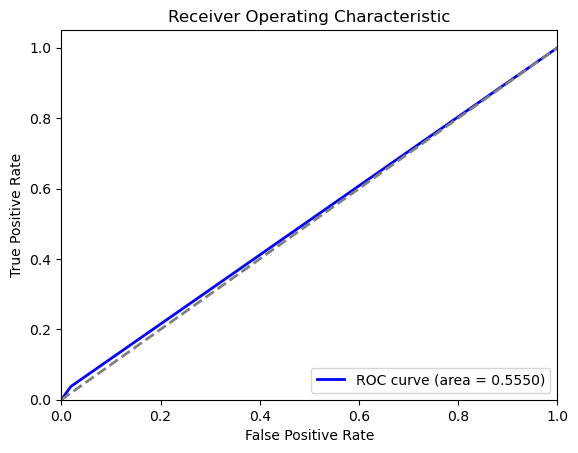

In [32]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_optimal_test)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

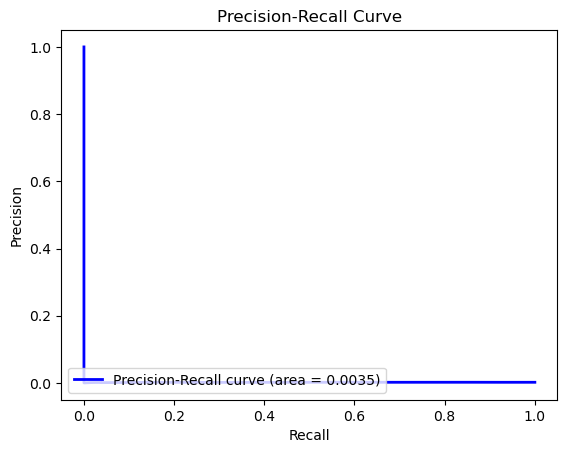

In [30]:
# Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

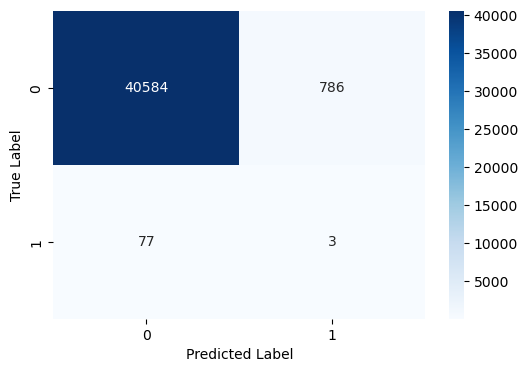

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()